In [1]:
import json
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
df = np.load('../qm9_filtered.npy', allow_pickle = True)

In [4]:
df_X = []
df_y = []

for line in df:
    num = len(line['chiral_centers'])
    if num != 1:
        continue
    
    deg = line['rotation'][1]
    if deg > 0:
        sign = 1
    elif deg < 0:
        sign = 0
    else:
        continue
    
    df_X.append(line['xyz'].flatten())
    df_y.append(sign)
    
df_X = np.array(df_X)
df_y = np.array(df_y)

In [5]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df_X, df_y, test_size = 0.2)

X_train = torch.from_numpy(X_train_raw).type('torch.FloatTensor')
X_train = X_train.to(device)

y_train = torch.from_numpy(y_train_raw).type('torch.LongTensor')
y_train = y_train.to(device)

X_test = torch.from_numpy(X_test_raw).type('torch.FloatTensor')
X_test = X_test.to(device)

y_test = torch.from_numpy(y_test_raw).type('torch.LongTensor')
y_test = y_test.to(device)

In [6]:
import torch.nn as nn

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.hidden1 = nn.Linear(27*8,500)
        self.hidden2 = nn.Linear(500, 200)
        self.output = nn.Linear(200, 2)
        self.dropout = nn.Dropout(0.05)
        self.Tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.hidden2(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.output(x)
        x = self.softmax(x)
        return x
    
    def predict(self,x):
        y_pred = self.forward(x).cpu().detach().numpy()
        y_pred = [np.argmax(sample) for sample in y_pred]
        
        
        return y_pred
    

net = Net()
net.to(device)

Net(
  (hidden1): Linear(in_features=216, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=2, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (Tanh): Tanh()
  (softmax): Softmax(dim=1)
)

In [8]:
net = Net()
net.load_state_dict(torch.load('torch_PN_1_dict.dict'))

<All keys matched successfully>

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0005)
epochs = 200
losses = []
train_accuracies = []
test_accuracies = []
f1s = []

epoch: 0
train_acc: 0.4918202639328171
test_acc: 0.4996728462377317
f1: 0.4879240577127114

epoch: 1
train_acc: 0.5116697567891809
test_acc: 0.5044711014176663
f1: 0.42249773152431486

epoch: 2
train_acc: 0.5290107972516087
test_acc: 0.5308615049073064
f1: 0.47940252935966665

epoch: 3
train_acc: 0.524375613480205
test_acc: 0.5367502726281352
f1: 0.5350780634224818

epoch: 4
train_acc: 0.5247028029228924
test_acc: 0.5404580152671755
f1: 0.5402831148901264

epoch: 5
train_acc: 0.5341367651870433
test_acc: 0.541330425299891
f1: 0.5383918547164186

epoch: 6
train_acc: 0.5451521430908496
test_acc: 0.5443838604143948
f1: 0.5317965862308979

epoch: 7
train_acc: 0.5437888537463191
test_acc: 0.5437295528898582
f1: 0.5198307555471424

epoch: 8
train_acc: 0.5460246482713491
test_acc: 0.5476553980370774
f1: 0.5224613699276872

epoch: 9
train_acc: 0.5506598320427527
test_acc: 0.5494002181025082
f1: 0.5323392472506042

epoch: 10
train_acc: 0.5507688951903152
test_acc: 0.5465648854961832
f1: 0.53979

epoch: 90
train_acc: 0.6520885592758207
test_acc: 0.5965103598691385
f1: 0.5926570443629176

epoch: 91
train_acc: 0.6589050059984731
test_acc: 0.601526717557252
f1: 0.6012342562692037

epoch: 92
train_acc: 0.6598865743265351
test_acc: 0.5995637949836423
f1: 0.5988601238309139

epoch: 93
train_acc: 0.6588504744246919
test_acc: 0.5960741548527808
f1: 0.5929232159648107

epoch: 94
train_acc: 0.6666484894754062
test_acc: 0.6058887677208288
f1: 0.6059596832057313

epoch: 95
train_acc: 0.6614679899661904
test_acc: 0.6008724100327154
f1: 0.5991377410279813

epoch: 96
train_acc: 0.6617951794088778
test_acc: 0.6013086150490731
f1: 0.5990455539123882

epoch: 97
train_acc: 0.6635401897698767
test_acc: 0.6006543075245365
f1: 0.6007073096298751

epoch: 98
train_acc: 0.6650670738357509
test_acc: 0.6045801526717557
f1: 0.6028025919793215

epoch: 99
train_acc: 0.6660486421638129
test_acc: 0.5943293347873501
f1: 0.5930354741250383

epoch: 100
train_acc: 0.6647398843930635
test_acc: 0.604143947655398
f1

epoch: 178
train_acc: 0.7092921801723198
test_acc: 0.6229007633587786
f1: 0.6228769055430377

epoch: 179
train_acc: 0.7127276693205365
test_acc: 0.6191930207197383
f1: 0.6184791347821373

epoch: 180
train_acc: 0.7133820482059112
test_acc: 0.613958560523446
f1: 0.6118956559206746

epoch: 181
train_acc: 0.7121278220089432
test_acc: 0.6235550708833152
f1: 0.6230896817702152

epoch: 182
train_acc: 0.7136001745010361
test_acc: 0.6143947655398037
f1: 0.6137896302476874

epoch: 183
train_acc: 0.7126186061729741
test_acc: 0.6213740458015267
f1: 0.6201664425167024

epoch: 184
train_acc: 0.7140364270912859
test_acc: 0.6218102508178844
f1: 0.6218770026234277

epoch: 185
train_acc: 0.7118551641400371
test_acc: 0.6106870229007634
f1: 0.6089369148831159

epoch: 186
train_acc: 0.7148544006980041
test_acc: 0.6189749182115595
f1: 0.6190343152198794

epoch: 187
train_acc: 0.7137637692223797
test_acc: 0.6213740458015267
f1: 0.6208604371902953

epoch: 188
train_acc: 0.7189442687315956
test_acc: 0.60959651

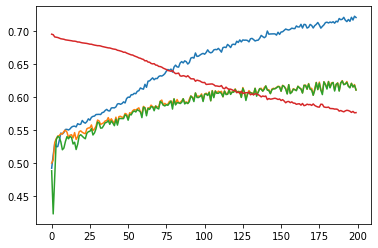

epoch: 0
train_acc: 0.7186716108626895
test_acc: 0.6222464558342421
f1: 0.622182995100337

epoch: 1
train_acc: 0.7205802159450322
test_acc: 0.6157033805888767
f1: 0.6140331692302202

epoch: 2
train_acc: 0.718071763551096
test_acc: 0.6095965103598692
f1: 0.6093644615569922

epoch: 3
train_acc: 0.722761478896281
test_acc: 0.6187568157033806
f1: 0.6186598961295319

epoch: 4
train_acc: 0.7211800632566255
test_acc: 0.622464558342421
f1: 0.6221357600099158

epoch: 5
train_acc: 0.7244519576834988
test_acc: 0.6087241003271537
f1: 0.6077757769698704

epoch: 6
train_acc: 0.7215617842730941
test_acc: 0.6244274809160305
f1: 0.6239684026517645

epoch: 7
train_acc: 0.7218889737157814
test_acc: 0.6259541984732825
f1: 0.6260060138464406

epoch: 8
train_acc: 0.7218889737157814
test_acc: 0.6141766630316249
f1: 0.6119996437579286

epoch: 9
train_acc: 0.7218889737157814
test_acc: 0.6220283533260632
f1: 0.6220591348127598

epoch: 10
train_acc: 0.7264696259134039
test_acc: 0.6178844056706652
f1: 0.615140378

epoch: 90
train_acc: 0.7467008397862362
test_acc: 0.6157033805888767
f1: 0.615762446878703

epoch: 91
train_acc: 0.7461009924746428
test_acc: 0.6244274809160305
f1: 0.6229045075659115

epoch: 92
train_acc: 0.7450103609990184
test_acc: 0.6261723009814613
f1: 0.6262376063984753

epoch: 93
train_acc: 0.742665503326426
test_acc: 0.629443838604144
f1: 0.6271225992866238

epoch: 94
train_acc: 0.7495910131966409
test_acc: 0.6231188658669574
f1: 0.6230555516936388

epoch: 95
train_acc: 0.751608681426546
test_acc: 0.6300981461286804
f1: 0.6301634350918877

epoch: 96
train_acc: 0.7489911658850474
test_acc: 0.6178844056706652
f1: 0.6170903408212244

epoch: 97
train_acc: 0.7454466135892682
test_acc: 0.6233369683751363
f1: 0.623404637557651

epoch: 98
train_acc: 0.7456647398843931
test_acc: 0.6231188658669574
f1: 0.6216756863480287

epoch: 99
train_acc: 0.7470280292289235
test_acc: 0.6244274809160305
f1: 0.6242960308492017

epoch: 100
train_acc: 0.747627876540517
test_acc: 0.627917121046892
f1: 0.6

epoch: 178
train_acc: 0.7658959537572254
test_acc: 0.629443838604144
f1: 0.6294999470647724

epoch: 179
train_acc: 0.7609881121169157
test_acc: 0.6213740458015267
f1: 0.6196833544294712

epoch: 180
train_acc: 0.7694405060530047
test_acc: 0.6252998909487459
f1: 0.6252954316346605

epoch: 181
train_acc: 0.7650779801505071
test_acc: 0.6233369683751363
f1: 0.6231857479531544

epoch: 182
train_acc: 0.7642600065437889
test_acc: 0.6259541984732825
f1: 0.6253183717070969

epoch: 183
train_acc: 0.7673683062493184
test_acc: 0.6266085059978189
f1: 0.6264925528434667

epoch: 184
train_acc: 0.772985058348784
test_acc: 0.6233369683751363
f1: 0.6231612925276387

epoch: 185
train_acc: 0.7666593957901625
test_acc: 0.6287895310796074
f1: 0.6286286088408465

epoch: 186
train_acc: 0.7691133166103173
test_acc: 0.6202835332606325
f1: 0.6200048386232532

epoch: 187
train_acc: 0.761315301559603
test_acc: 0.6244274809160305
f1: 0.6240733226195259

epoch: 188
train_acc: 0.7678045588395681
test_acc: 0.6274809160

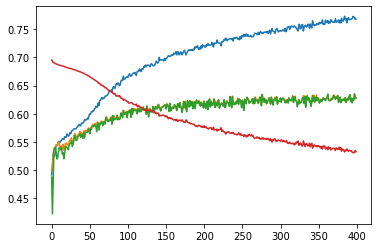

epoch: 0
train_acc: 0.7656778274621006
test_acc: 0.6257360959651036
f1: 0.6257019188197834

epoch: 1
train_acc: 0.7693314429054422
test_acc: 0.6270447110141767
f1: 0.6270942287762306

epoch: 2
train_acc: 0.7666593957901625
test_acc: 0.6244274809160305
f1: 0.6232676135597331

epoch: 3
train_acc: 0.7704220743810667
test_acc: 0.6259541984732825
f1: 0.6256284392934752

epoch: 4
train_acc: 0.768022685134693
test_acc: 0.6353326063249727
f1: 0.6353504041645228

epoch: 5
train_acc: 0.7726033373323155
test_acc: 0.625081788440567
f1: 0.6242790943291484

epoch: 6
train_acc: 0.7725488057585342
test_acc: 0.6231188658669574
f1: 0.6228667041870637

epoch: 7
train_acc: 0.7712400479877849
test_acc: 0.6329334787350055
f1: 0.6329787571824242

epoch: 8
train_acc: 0.7693314429054422
test_acc: 0.634896401308615
f1: 0.6344620141820567

epoch: 9
train_acc: 0.7680772167084742
test_acc: 0.6259541984732825
f1: 0.6254908394646748

epoch: 10
train_acc: 0.7727669320536591
test_acc: 0.6333696837513632
f1: 0.63342969

epoch: 90
train_acc: 0.7837823099574653
test_acc: 0.6266085059978189
f1: 0.6262229262088302

epoch: 91
train_acc: 0.788417493728869
test_acc: 0.6324972737186477
f1: 0.6325347379079579

epoch: 92
train_acc: 0.7869451412367761
test_acc: 0.6283533260632497
f1: 0.6278744019472203

epoch: 93
train_acc: 0.7805649471043734
test_acc: 0.6272628135223555
f1: 0.6257831733883559

epoch: 94
train_acc: 0.7858545097611517
test_acc: 0.629443838604144
f1: 0.6291105421367315

epoch: 95
train_acc: 0.7855273203184644
test_acc: 0.6353326063249727
f1: 0.6352653339502794

epoch: 96
train_acc: 0.7857999781873705
test_acc: 0.623773173391494
f1: 0.6234347764484179

epoch: 97
train_acc: 0.7823644890391537
test_acc: 0.6194111232279171
f1: 0.6192740720813351

epoch: 98
train_acc: 0.7835096520885593
test_acc: 0.615485278080698
f1: 0.6148747942316692

epoch: 99
train_acc: 0.7848729414330897
test_acc: 0.6239912758996728
f1: 0.6239868010117317

epoch: 100
train_acc: 0.7800196313665613
test_acc: 0.6311886586695747
f1: 

epoch: 178
train_acc: 0.7919620460246483
test_acc: 0.629443838604144
f1: 0.6274999294867883

epoch: 179
train_acc: 0.7955065983204276
test_acc: 0.6259541984732825
f1: 0.6260125074997671

epoch: 180
train_acc: 0.7954520667466463
test_acc: 0.6407851690294438
f1: 0.6408497704037521

epoch: 181
train_acc: 0.7977969244192388
test_acc: 0.6355507088331516
f1: 0.6325765734806865

epoch: 182
train_acc: 0.7979605191405824
test_acc: 0.629443838604144
f1: 0.6294786872416113

epoch: 183
train_acc: 0.8011778819936743
test_acc: 0.6290076335877862
f1: 0.6290508900334106

epoch: 184
train_acc: 0.8009597556985495
test_acc: 0.6407851690294438
f1: 0.6402410268289467

epoch: 185
train_acc: 0.7979605191405824
test_acc: 0.620937840785169
f1: 0.6206938028710446

epoch: 186
train_acc: 0.7984513033046133
test_acc: 0.6366412213740458
f1: 0.6366970695232231

epoch: 187
train_acc: 0.7999781873704875
test_acc: 0.6276990185387132
f1: 0.6270375932886199

epoch: 188
train_acc: 0.8003053768131748
test_acc: 0.6252998909

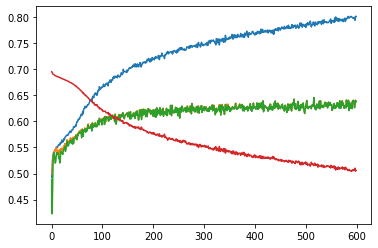

epoch: 0
train_acc: 0.7984513033046133
test_acc: 0.634896401308615
f1: 0.63479687001497

epoch: 1
train_acc: 0.8017231977314865
test_acc: 0.636423118865867
f1: 0.6363404598527659

epoch: 2
train_acc: 0.7962155087795834
test_acc: 0.627917121046892
f1: 0.6269302548212031

epoch: 3
train_acc: 0.8011233504198931
test_acc: 0.6320610687022901
f1: 0.6317301263005687

epoch: 4
train_acc: 0.8022685134692987
test_acc: 0.63773173391494
f1: 0.6377764204872292

epoch: 5
train_acc: 0.7995419347802377
test_acc: 0.6320610687022901
f1: 0.6313192903749864

epoch: 6
train_acc: 0.8034682080924855
test_acc: 0.6414394765539804
f1: 0.6414514578499383

epoch: 7
train_acc: 0.8027592976333296
test_acc: 0.6329334787350055
f1: 0.6328012970274423

epoch: 8
train_acc: 0.8022685134692987
test_acc: 0.6338058887677208
f1: 0.6327739242680829

epoch: 9
train_acc: 0.8029774239284546
test_acc: 0.6266085059978189
f1: 0.6264301904415629

epoch: 10
train_acc: 0.8043952448467663
test_acc: 0.6342420937840785
f1: 0.634152421831

epoch: 90
train_acc: 0.8088668338968262
test_acc: 0.634896401308615
f1: 0.6337319267125345

epoch: 91
train_acc: 0.8084851128803577
test_acc: 0.6431842966194111
f1: 0.6431884070111734

epoch: 92
train_acc: 0.8113207547169812
test_acc: 0.6296619411123228
f1: 0.6296482951381106

epoch: 93
train_acc: 0.8109390337005126
test_acc: 0.6324972737186477
f1: 0.6317259045992378

epoch: 94
train_acc: 0.8100119969462318
test_acc: 0.639258451472192
f1: 0.639094191322419

epoch: 95
train_acc: 0.807558076126077
test_acc: 0.6283533260632497
f1: 0.6284068421271333

epoch: 96
train_acc: 0.8078852655687643
test_acc: 0.6429661941112322
f1: 0.6419079483571889

epoch: 97
train_acc: 0.8105573126840441
test_acc: 0.6335877862595419
f1: 0.6335378886255848

epoch: 98
train_acc: 0.8118660704547933
test_acc: 0.6396946564885496
f1: 0.6397558843528395

epoch: 99
train_acc: 0.8060857236339841
test_acc: 0.6281352235550709
f1: 0.6263957552882562

epoch: 100
train_acc: 0.8101210600937943
test_acc: 0.6386041439476554
f1: 

epoch: 178
train_acc: 0.8224997273421311
test_acc: 0.6314067611777535
f1: 0.6309682222029127

epoch: 179
train_acc: 0.8202094012433199
test_acc: 0.6246455834242094
f1: 0.6246477632926097

epoch: 180
train_acc: 0.8234267640964118
test_acc: 0.6386041439476554
f1: 0.6384355887193385

epoch: 181
train_acc: 0.8211364379976006
test_acc: 0.6300981461286804
f1: 0.6295576548718578

epoch: 182
train_acc: 0.8227723852110372
test_acc: 0.6368593238822247
f1: 0.6365221930232631

epoch: 183
train_acc: 0.8221725378994438
test_acc: 0.6416575790621593
f1: 0.6414824183240958

epoch: 184
train_acc: 0.8260988112116916
test_acc: 0.6346782988004362
f1: 0.6341249058521468

epoch: 185
train_acc: 0.8236448903915367
test_acc: 0.6370774263904035
f1: 0.6368875678940066

epoch: 186
train_acc: 0.8278438215726905
test_acc: 0.6298800436205017
f1: 0.6297155713228737

epoch: 187
train_acc: 0.817264696259134
test_acc: 0.6386041439476554
f1: 0.6385022483588249

epoch: 188
train_acc: 0.8210819064238194
test_acc: 0.63533260

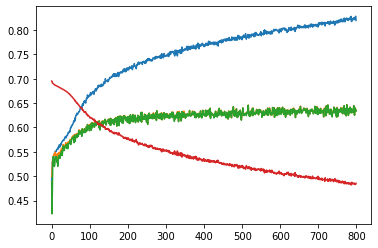

epoch: 0
train_acc: 0.8270258479659723
test_acc: 0.6357688113413305
f1: 0.6358277728142496

epoch: 1
train_acc: 0.8183007961609772
test_acc: 0.6298800436205017
f1: 0.6296906906752944

epoch: 2
train_acc: 0.8239175482604428
test_acc: 0.6355507088331516
f1: 0.6345060773407638

epoch: 3
train_acc: 0.8246809902933798
test_acc: 0.6335877862595419
f1: 0.6331518421898777

epoch: 4
train_acc: 0.8239175482604428
test_acc: 0.6331515812431843
f1: 0.6331472153722346

epoch: 5
train_acc: 0.8235358272439742
test_acc: 0.63773173391494
f1: 0.6374162318754882

epoch: 6
train_acc: 0.8239175482604428
test_acc: 0.639258451472192
f1: 0.6389594638356768

epoch: 7
train_acc: 0.8214636274402879
test_acc: 0.636423118865867
f1: 0.6364754560539666

epoch: 8
train_acc: 0.8258261533427854
test_acc: 0.6372955288985823
f1: 0.6369481720561774

epoch: 9
train_acc: 0.8263714690805977
test_acc: 0.6353326063249727
f1: 0.6344970936044068

epoch: 10
train_acc: 0.8278983531464718
test_acc: 0.6305343511450382
f1: 0.630433630

epoch: 90
train_acc: 0.8297524266550332
test_acc: 0.6372955288985823
f1: 0.6368581054314704

epoch: 91
train_acc: 0.8307339949830952
test_acc: 0.6431842966194111
f1: 0.643171148908097

epoch: 92
train_acc: 0.8353146471807177
test_acc: 0.634896401308615
f1: 0.6344011358620705

epoch: 93
train_acc: 0.8409313992801832
test_acc: 0.6372955288985823
f1: 0.636926492091357

epoch: 94
train_acc: 0.8330243210819064
test_acc: 0.636423118865867
f1: 0.6364543009077881

epoch: 95
train_acc: 0.8365143418039045
test_acc: 0.6388222464558343
f1: 0.6383446293622458

epoch: 96
train_acc: 0.8360235576398735
test_acc: 0.6300981461286804
f1: 0.6298411608396438

epoch: 97
train_acc: 0.8319882211800632
test_acc: 0.6316248636859324
f1: 0.6312500572112459

epoch: 98
train_acc: 0.8362962155087795
test_acc: 0.6335877862595419
f1: 0.6334045231033296

epoch: 99
train_acc: 0.8336786999672811
test_acc: 0.6359869138495092
f1: 0.6358773769491711

epoch: 100
train_acc: 0.8338968262624059
test_acc: 0.6300981461286804
f1: 

epoch: 178
train_acc: 0.8444759515759624
test_acc: 0.6379498364231189
f1: 0.637639639030958

epoch: 179
train_acc: 0.8398407678045589
test_acc: 0.634896401308615
f1: 0.6334983211496529

epoch: 180
train_acc: 0.8426218780674011
test_acc: 0.6410032715376227
f1: 0.641050936003319

epoch: 181
train_acc: 0.8419129676082452
test_acc: 0.6416575790621593
f1: 0.6417134401295146

epoch: 182
train_acc: 0.8418039044606828
test_acc: 0.6453653217011995
f1: 0.6445372694639042

epoch: 183
train_acc: 0.8438215726905879
test_acc: 0.6342420937840785
f1: 0.6339736440960342

epoch: 184
train_acc: 0.8454029883302432
test_acc: 0.639258451472192
f1: 0.6392404530912845

epoch: 185
train_acc: 0.8425128149198385
test_acc: 0.6335877862595419
f1: 0.6330127708235944

epoch: 186
train_acc: 0.8470389355436798
test_acc: 0.6333696837513632
f1: 0.633214696835837

epoch: 187
train_acc: 0.8446395462973061
test_acc: 0.6303162486368593
f1: 0.6303305371087876

epoch: 188
train_acc: 0.84660268295343
test_acc: 0.64165757906215

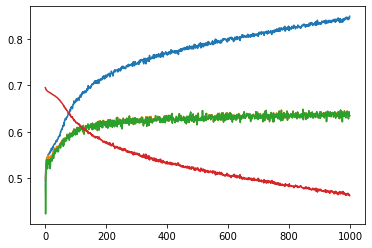

epoch: 0
train_acc: 0.8449667357399935
test_acc: 0.6372955288985823
f1: 0.6370098685213988

epoch: 1
train_acc: 0.8476387828552732
test_acc: 0.632279171210469
f1: 0.632240233208218

epoch: 2
train_acc: 0.846820809248555
test_acc: 0.6309705561613959
f1: 0.6306439170443031

epoch: 3
train_acc: 0.8432217253789944
test_acc: 0.6311886586695747
f1: 0.6309276453284187

epoch: 4
train_acc: 0.8469298723961174
test_acc: 0.6407851690294438
f1: 0.6406770759947783

epoch: 5
train_acc: 0.8469844039698986
test_acc: 0.6401308615049073
f1: 0.6397592454699591

epoch: 6
train_acc: 0.8474206565601483
test_acc: 0.6431842966194111
f1: 0.6427938199560862

epoch: 7
train_acc: 0.8444214200021812
test_acc: 0.6477644492911668
f1: 0.6473396513961664

epoch: 8
train_acc: 0.8467117461009924
test_acc: 0.6407851690294438
f1: 0.6408498053347202

epoch: 9
train_acc: 0.8479114407241793
test_acc: 0.6479825517993457
f1: 0.6479602621755184

epoch: 10
train_acc: 0.8443123568546188
test_acc: 0.6431842966194111
f1: 0.64233539

epoch: 90
train_acc: 0.8533645981023013
test_acc: 0.6314067611777535
f1: 0.6300762369039522

epoch: 91
train_acc: 0.85331006652852
test_acc: 0.6368593238822247
f1: 0.6368070353323708

epoch: 92
train_acc: 0.85331006652852
test_acc: 0.6368593238822247
f1: 0.6369223819606643

epoch: 93
train_acc: 0.8548369505943941
test_acc: 0.6416575790621593
f1: 0.6413249027851178

epoch: 94
train_acc: 0.8575635292834551
test_acc: 0.63773173391494
f1: 0.6373954129799638

epoch: 95
train_acc: 0.8563093030864871
test_acc: 0.6458015267175573
f1: 0.645865227065912

epoch: 96
train_acc: 0.8576180608572364
test_acc: 0.6399127589967285
f1: 0.6396854369235551

epoch: 97
train_acc: 0.855055076889519
test_acc: 0.6390403489640131
f1: 0.6382522265896117

epoch: 98
train_acc: 0.858763223906642
test_acc: 0.636423118865867
f1: 0.6363404598527659

epoch: 99
train_acc: 0.8556549242011124
test_acc: 0.6372955288985823
f1: 0.6372544275295285

epoch: 100
train_acc: 0.8556549242011124
test_acc: 0.6346782988004362
f1: 0.6342

epoch: 178
train_acc: 0.8632893445304831
test_acc: 0.6407851690294438
f1: 0.6402792483114684

epoch: 179
train_acc: 0.8621987130548587
test_acc: 0.6431842966194111
f1: 0.6427826072751276

epoch: 180
train_acc: 0.8620351183335151
test_acc: 0.6514721919302072
f1: 0.6515163110538754

epoch: 181
train_acc: 0.8618169920383902
test_acc: 0.6449291166848419
f1: 0.6444352093228338

epoch: 182
train_acc: 0.8659068600719817
test_acc: 0.6449291166848419
f1: 0.644447460683065

epoch: 183
train_acc: 0.8643254444323263
test_acc: 0.641875681570338
f1: 0.6418714195250949

epoch: 184
train_acc: 0.8610535500054531
test_acc: 0.6538713195201745
f1: 0.6539010051233712

epoch: 185
train_acc: 0.8636165339731705
test_acc: 0.6381679389312978
f1: 0.6374532622134945

epoch: 186
train_acc: 0.8669974915476061
test_acc: 0.6425299890948746
f1: 0.642321845563053

epoch: 187
train_acc: 0.8663976442360126
test_acc: 0.6442748091603053
f1: 0.6442921812421557

epoch: 188
train_acc: 0.8623077762024212
test_acc: 0.6379498364

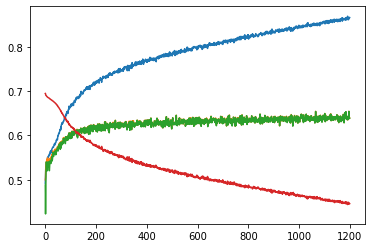

epoch: 0
train_acc: 0.8635620023993893
test_acc: 0.6425299890948746
f1: 0.6424728304120473

epoch: 1
train_acc: 0.8681426545970117
test_acc: 0.6359869138495092
f1: 0.635783674820293

epoch: 2
train_acc: 0.864979823317701
test_acc: 0.6379498364231189
f1: 0.637530737892077

epoch: 3
train_acc: 0.8691242229250736
test_acc: 0.6333696837513632
f1: 0.633237659122478

epoch: 4
train_acc: 0.8634529392518268
test_acc: 0.6342420937840785
f1: 0.6343042587692767

epoch: 5
train_acc: 0.8653615443341695
test_acc: 0.6410032715376227
f1: 0.640772151625857

epoch: 6
train_acc: 0.8659068600719817
test_acc: 0.6438386041439477
f1: 0.6431351279051456

epoch: 7
train_acc: 0.8651979496128258
test_acc: 0.6420937840785169
f1: 0.6421274430626746

epoch: 8
train_acc: 0.8629621550877958
test_acc: 0.6401308615049073
f1: 0.6400704052630232

epoch: 9
train_acc: 0.8666157705311375
test_acc: 0.6412213740458015
f1: 0.640122357781049

epoch: 10
train_acc: 0.8647071654487949
test_acc: 0.6410032715376227
f1: 0.64082371727

epoch: 89
train_acc: 0.874959101319664
test_acc: 0.6386041439476554
f1: 0.6384740042629066

epoch: 90
train_acc: 0.874959101319664
test_acc: 0.6451472191930208
f1: 0.6451645486701333

epoch: 91
train_acc: 0.8693968807939797
test_acc: 0.6383860414394765
f1: 0.6381061402808756

epoch: 92
train_acc: 0.8735412804013524
test_acc: 0.6359869138495092
f1: 0.6355942277528351

epoch: 93
train_acc: 0.8778492747300687
test_acc: 0.6466739367502726
f1: 0.6466312395375936

epoch: 94
train_acc: 0.8739230014178209
test_acc: 0.6383860414394765
f1: 0.6384185693475294

epoch: 95
train_acc: 0.8747409750245392
test_acc: 0.6412213740458015
f1: 0.64077692764979

epoch: 96
train_acc: 0.8753408223361326
test_acc: 0.632279171210469
f1: 0.6317021021479643

epoch: 97
train_acc: 0.8749045697458828
test_acc: 0.634896401308615
f1: 0.6348732830742365

epoch: 98
train_acc: 0.8767586432544443
test_acc: 0.6416575790621593
f1: 0.6417082248535108

epoch: 99
train_acc: 0.8720689279092595
test_acc: 0.6497273718647765
f1: 0.6

epoch: 177
train_acc: 0.8824844585014724
test_acc: 0.6340239912758997
f1: 0.6335275423993753

epoch: 178
train_acc: 0.882648053222816
test_acc: 0.6508178844056707
f1: 0.6504731089729263

epoch: 179
train_acc: 0.8825389900752536
test_acc: 0.6381679389312978
f1: 0.6381958376598909

epoch: 180
train_acc: 0.8801941324026611
test_acc: 0.6431842966194111
f1: 0.6427597701325238

epoch: 181
train_acc: 0.8845566583051587
test_acc: 0.6362050163576881
f1: 0.6354790450632418

epoch: 182
train_acc: 0.8836841531246592
test_acc: 0.644711014176663
f1: 0.6446424932606708

epoch: 183
train_acc: 0.8802486639764424
test_acc: 0.6449291166848419
f1: 0.6449114012289064

epoch: 184
train_acc: 0.8792670956483805
test_acc: 0.6386041439476554
f1: 0.6382473089120168

epoch: 185
train_acc: 0.8819936743374414
test_acc: 0.6396946564885496
f1: 0.6392181930594384

epoch: 186
train_acc: 0.8811211691569418
test_acc: 0.6342420937840785
f1: 0.6342895423918374

epoch: 187
train_acc: 0.8822663322063474
test_acc: 0.644056706

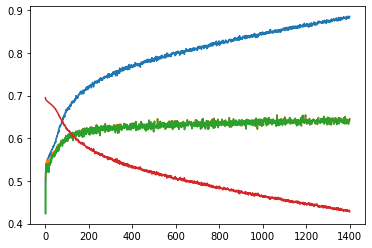

epoch: 0
train_acc: 0.8845021267313775
test_acc: 0.6399127589967285
f1: 0.6399636513896204

epoch: 1
train_acc: 0.8847202530265024
test_acc: 0.6431842966194111
f1: 0.6430218240649803

epoch: 2
train_acc: 0.8843385320100338
test_acc: 0.6501635768811341
f1: 0.649575528516115

epoch: 3
train_acc: 0.8871741738466572
test_acc: 0.6438386041439477
f1: 0.6437699149752458

epoch: 4
train_acc: 0.8838477478460028
test_acc: 0.6399127589967285
f1: 0.6399228717360781

epoch: 5
train_acc: 0.8853201003380957
test_acc: 0.6381679389312978
f1: 0.6376583320878725

epoch: 6
train_acc: 0.8869560475515323
test_acc: 0.6449291166848419
f1: 0.6442059724947754

epoch: 7
train_acc: 0.8849929108954084
test_acc: 0.6403489640130862
f1: 0.6404133381509868

epoch: 8
train_acc: 0.8851565056167521
test_acc: 0.640567066521265
f1: 0.6403872940918375

epoch: 9
train_acc: 0.8835205584033156
test_acc: 0.6383860414394765
f1: 0.6375732160885512

epoch: 10
train_acc: 0.8817755480423165
test_acc: 0.6335877862595419
f1: 0.6333788

epoch: 90
train_acc: 0.8926273312247791
test_acc: 0.6399127589967285
f1: 0.6398719542100132

epoch: 91
train_acc: 0.8930635838150289
test_acc: 0.6427480916030535
f1: 0.6427049199769002

epoch: 92
train_acc: 0.895572036208965
test_acc: 0.6475463467829881
f1: 0.6469671476528849

epoch: 93
train_acc: 0.8925182680772167
test_acc: 0.6329334787350055
f1: 0.632390603222316

epoch: 94
train_acc: 0.8923001417820918
test_acc: 0.648854961832061
f1: 0.6489055257187115

epoch: 95
train_acc: 0.8933907732577162
test_acc: 0.6466739367502726
f1: 0.6465709829706473

epoch: 96
train_acc: 0.8919184207656233
test_acc: 0.6412213740458015
f1: 0.6403437681694338

epoch: 97
train_acc: 0.8934998364052786
test_acc: 0.6414394765539804
f1: 0.6412263546367012

epoch: 98
train_acc: 0.8917002944704984
test_acc: 0.6436205016357688
f1: 0.6435299029036928

epoch: 99
train_acc: 0.8939906205693097
test_acc: 0.6362050163576881
f1: 0.6360147014706747

epoch: 100
train_acc: 0.8934453048314974
test_acc: 0.6327153762268266
f1:

epoch: 179
train_acc: 0.9023339513578362
test_acc: 0.6440567066521266
f1: 0.643853729696264

epoch: 180
train_acc: 0.8962264150943396
test_acc: 0.6438386041439477
f1: 0.6436563923822957

epoch: 181
train_acc: 0.8973715781437452
test_acc: 0.6412213740458015
f1: 0.6406778926130039

epoch: 182
train_acc: 0.8979168938815574
test_acc: 0.6549618320610687
f1: 0.6548196570387333

epoch: 183
train_acc: 0.8999890936852437
test_acc: 0.6475463467829881
f1: 0.6474158324192205

epoch: 184
train_acc: 0.8988984622096193
test_acc: 0.6455834242093784
f1: 0.6455028477868893

epoch: 185
train_acc: 0.8999345621114625
test_acc: 0.6460196292257361
f1: 0.6457503996651256

epoch: 186
train_acc: 0.8997709673901189
test_acc: 0.6479825517993457
f1: 0.6477195179681169

epoch: 187
train_acc: 0.8989529937834005
test_acc: 0.6372955288985823
f1: 0.6372000042620505

epoch: 188
train_acc: 0.9009161304395245
test_acc: 0.6431842966194111
f1: 0.6431124557539716

epoch: 189
train_acc: 0.9010251935870869
test_acc: 0.64711014

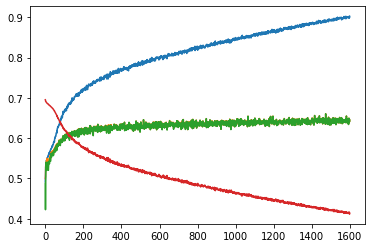

epoch: 0
train_acc: 0.9011887883084306
test_acc: 0.6479825517993457
f1: 0.6469130299206367

epoch: 1
train_acc: 0.9015159777511179
test_acc: 0.6449291166848419
f1: 0.6446542800827899

epoch: 2
train_acc: 0.9005889409968372
test_acc: 0.6455834242093784
f1: 0.6456471971274561

epoch: 3
train_acc: 0.9022248882102738
test_acc: 0.6453653217011995
f1: 0.6452619866112793

epoch: 4
train_acc: 0.8997164358163376
test_acc: 0.6353326063249727
f1: 0.6342427421555098

epoch: 5
train_acc: 0.9038063038499291
test_acc: 0.6458015267175573
f1: 0.6456243723332187

epoch: 6
train_acc: 0.9006980041443996
test_acc: 0.6464558342420937
f1: 0.646465763224823

epoch: 7
train_acc: 0.9010797251608681
test_acc: 0.6492911668484188
f1: 0.6488851967050963

epoch: 8
train_acc: 0.9001526884065875
test_acc: 0.6388222464558343
f1: 0.6383198443726122

epoch: 9
train_acc: 0.9028247355218671
test_acc: 0.6381679389312978
f1: 0.6380226727587047

epoch: 10
train_acc: 0.9008615988657432
test_acc: 0.6372955288985823
f1: 0.637323

epoch: 90
train_acc: 0.9076235140146145
test_acc: 0.6431842966194111
f1: 0.6432246438973469

epoch: 91
train_acc: 0.9095321190969572
test_acc: 0.6471101417666303
f1: 0.6470267853981397

epoch: 92
train_acc: 0.9091503980804886
test_acc: 0.6436205016357688
f1: 0.6430214548599327

epoch: 93
train_acc: 0.9081142981786454
test_acc: 0.6444929116684842
f1: 0.644298626062273

epoch: 94
train_acc: 0.9095321190969572
test_acc: 0.644711014176663
f1: 0.6446108404203534

epoch: 95
train_acc: 0.9073508561457083
test_acc: 0.6458015267175573
f1: 0.6455995447467726

epoch: 96
train_acc: 0.9056603773584906
test_acc: 0.6468920392584515
f1: 0.6467273495091181

epoch: 97
train_acc: 0.9111680663103937
test_acc: 0.6477644492911668
f1: 0.6476001664343582

epoch: 98
train_acc: 0.9078961718835206
test_acc: 0.6527808069792803
f1: 0.6526592805528043

epoch: 99
train_acc: 0.9104591558512378
test_acc: 0.6416575790621593
f1: 0.6414742514905767

epoch: 100
train_acc: 0.9095321190969572
test_acc: 0.6475463467829881
f1

epoch: 178
train_acc: 0.9147671501799542
test_acc: 0.6440567066521266
f1: 0.6436098889156399

epoch: 179
train_acc: 0.9160759079507035
test_acc: 0.6416575790621593
f1: 0.6415285389281566

epoch: 180
train_acc: 0.9167848184098593
test_acc: 0.6455834242093784
f1: 0.6455378945862865

epoch: 181
train_acc: 0.9164030973933908
test_acc: 0.6466739367502726
f1: 0.6465283466515475

epoch: 182
train_acc: 0.912476824081143
test_acc: 0.6379498364231189
f1: 0.637707597772295

epoch: 183
train_acc: 0.9137310502781111
test_acc: 0.6351145038167939
f1: 0.6345617716362038

epoch: 184
train_acc: 0.9130766713927364
test_acc: 0.6423118865866958
f1: 0.6420054265125128

epoch: 185
train_acc: 0.912476824081143
test_acc: 0.6510359869138496
f1: 0.6508693368612736

epoch: 186
train_acc: 0.9150943396226415
test_acc: 0.6442748091603053
f1: 0.6440230570849502

epoch: 187
train_acc: 0.9171665394263279
test_acc: 0.640567066521265
f1: 0.6404554480642718

epoch: 188
train_acc: 0.9153124659177664
test_acc: 0.64274809160

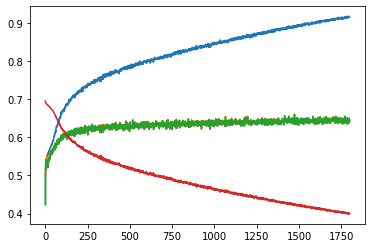

epoch: 0
train_acc: 0.9177663867379212
test_acc: 0.640567066521265
f1: 0.6405342437150366

epoch: 1
train_acc: 0.9144399607372669
test_acc: 0.6464558342420937
f1: 0.6462830189308334

epoch: 2
train_acc: 0.91547606063911
test_acc: 0.6412213740458015
f1: 0.6409484950395141

epoch: 3
train_acc: 0.9149307449012979
test_acc: 0.6479825517993457
f1: 0.6478521989632561

epoch: 4
train_acc: 0.9173846657214527
test_acc: 0.6529989094874591
f1: 0.6528877783243034

epoch: 5
train_acc: 0.9153669974915476
test_acc: 0.6455834242093784
f1: 0.6453325982606033

epoch: 6
train_acc: 0.9174937288690151
test_acc: 0.6455834242093784
f1: 0.6450076092238852

epoch: 7
train_acc: 0.9166757552622968
test_acc: 0.6412213740458015
f1: 0.6411640061182535

epoch: 8
train_acc: 0.9174391972952339
test_acc: 0.6416575790621593
f1: 0.6416115451109345

epoch: 9
train_acc: 0.916948413131203
test_acc: 0.6453653217011995
f1: 0.6450908227362508

epoch: 10
train_acc: 0.9174391972952339
test_acc: 0.6501635768811341
f1: 0.649947064

epoch: 89
train_acc: 0.9231104809684807
test_acc: 0.6464558342420937
f1: 0.6463993032934279

epoch: 90
train_acc: 0.9213654706074818
test_acc: 0.6436205016357688
f1: 0.6433251293273857

epoch: 91
train_acc: 0.91994764968917
test_acc: 0.648854961832061
f1: 0.6483906118799613

epoch: 92
train_acc: 0.9200567128367325
test_acc: 0.6458015267175573
f1: 0.6457532923380653

epoch: 93
train_acc: 0.9237103282800742
test_acc: 0.6460196292257361
f1: 0.6457311441327974

epoch: 94
train_acc: 0.9219653179190751
test_acc: 0.6449291166848419
f1: 0.6445293915916306

epoch: 95
train_acc: 0.9250190860508234
test_acc: 0.6460196292257361
f1: 0.6458623289670148

epoch: 96
train_acc: 0.9222925073617625
test_acc: 0.6473282442748092
f1: 0.6470210999052767

epoch: 97
train_acc: 0.9234376704111681
test_acc: 0.6399127589967285
f1: 0.6399547439418934

epoch: 98
train_acc: 0.9220743810666376
test_acc: 0.6471101417666303
f1: 0.6470727742176137

epoch: 99
train_acc: 0.9221834442142001
test_acc: 0.6427480916030535
f1: 

epoch: 177
train_acc: 0.9291089540844149
test_acc: 0.6375136314067612
f1: 0.6375136314067612

epoch: 178
train_acc: 0.9285091067728215
test_acc: 0.6490730643402399
f1: 0.6488337816344443

epoch: 179
train_acc: 0.9260551859526666
test_acc: 0.6451472191930208
f1: 0.6447192649049925

epoch: 180
train_acc: 0.9275275384447595
test_acc: 0.6346782988004362
f1: 0.6343284354745022

epoch: 181
train_acc: 0.9261097175264478
test_acc: 0.6423118865866958
f1: 0.6421866960468587

epoch: 182
train_acc: 0.92889082778929
test_acc: 0.644711014176663
f1: 0.6444502482006199

epoch: 183
train_acc: 0.9282909804776965
test_acc: 0.6455834242093784
f1: 0.6453042912491118

epoch: 184
train_acc: 0.9267640964118224
test_acc: 0.6466739367502726
f1: 0.6464639261018589

epoch: 185
train_acc: 0.92889082778929
test_acc: 0.6477644492911668
f1: 0.6476780925809733

epoch: 186
train_acc: 0.9288362962155088
test_acc: 0.644711014176663
f1: 0.6445683748788006

epoch: 187
train_acc: 0.9310175591667575
test_acc: 0.6449291166848

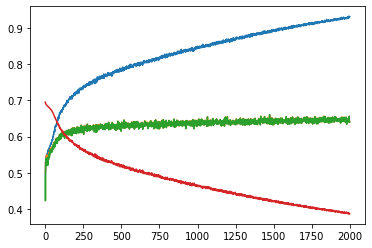

epoch: 0
train_acc: 0.930635838150289
test_acc: 0.6523446019629225
f1: 0.6523225885426123

epoch: 1
train_acc: 0.9305267750027266
test_acc: 0.6455834242093784
f1: 0.6453232985426688

epoch: 2
train_acc: 0.9305267750027266
test_acc: 0.6464558342420937
f1: 0.646017872170401

epoch: 3
train_acc: 0.9278547278874468
test_acc: 0.6438386041439477
f1: 0.6437381844115636

epoch: 4
train_acc: 0.9331988221180063
test_acc: 0.6556161395856053
f1: 0.6556329578058638

epoch: 5
train_acc: 0.9302541171338204
test_acc: 0.6508178844056707
f1: 0.6503737484850961

epoch: 6
train_acc: 0.9277456647398844
test_acc: 0.6468920392584515
f1: 0.6464661892324418

epoch: 7
train_acc: 0.9310720907405388
test_acc: 0.6512540894220283
f1: 0.6511868304013583

epoch: 8
train_acc: 0.9295997382484459
test_acc: 0.6396946564885496
f1: 0.6396030597288254

epoch: 9
train_acc: 0.9285091067728215
test_acc: 0.651690294438386
f1: 0.6514704074905618

epoch: 10
train_acc: 0.9304177118551641
test_acc: 0.6427480916030535
f1: 0.64231140

epoch: 90
train_acc: 0.9307994328716327
test_acc: 0.6442748091603053
f1: 0.6440042525285395

epoch: 91
train_acc: 0.9337986694295998
test_acc: 0.646237731733915
f1: 0.6459919592464046

epoch: 92
train_acc: 0.9318355327734759
test_acc: 0.6562704471101418
f1: 0.656306796158026

epoch: 93
train_acc: 0.9347257061838805
test_acc: 0.6442748091603053
f1: 0.644288558126509

epoch: 94
train_acc: 0.9341803904460683
test_acc: 0.6495092693565976
f1: 0.6491838823954256

epoch: 95
train_acc: 0.9342894535936307
test_acc: 0.6425299890948746
f1: 0.642267622345498

epoch: 96
train_acc: 0.9342894535936307
test_acc: 0.6440567066521266
f1: 0.643946171869473

epoch: 97
train_acc: 0.9365797796924419
test_acc: 0.6580152671755726
f1: 0.6578202501003322

epoch: 98
train_acc: 0.936088995528411
test_acc: 0.6482006543075245
f1: 0.6476549963387119

epoch: 99
train_acc: 0.9331988221180063
test_acc: 0.6521264994547438
f1: 0.651772552547032

epoch: 100
train_acc: 0.9348893009052242
test_acc: 0.6484187568157034
f1: 0.6

epoch: 179
train_acc: 0.9383247900534409
test_acc: 0.63773173391494
f1: 0.6377012397919947

epoch: 180
train_acc: 0.9381066637583161
test_acc: 0.6468920392584515
f1: 0.6467351266775089

epoch: 181
train_acc: 0.9402879267095648
test_acc: 0.6521264994547438
f1: 0.6518525197183591

epoch: 182
train_acc: 0.9412149634638456
test_acc: 0.6508178844056707
f1: 0.650622925936063

epoch: 183
train_acc: 0.9390337005125968
test_acc: 0.64340239912759
f1: 0.6431947635726611

epoch: 184
train_acc: 0.9353800850692551
test_acc: 0.6490730643402399
f1: 0.6485909923446505

epoch: 185
train_acc: 0.9388701057912532
test_acc: 0.6484187568157034
f1: 0.6481175289866893

epoch: 186
train_acc: 0.938597447922347
test_acc: 0.6549618320610687
f1: 0.6548196570387333

epoch: 187
train_acc: 0.93783400588941
test_acc: 0.6464558342420937
f1: 0.6462830189308334

epoch: 188
train_acc: 0.9401788635620024
test_acc: 0.650381679389313
f1: 0.6500870388726355

epoch: 189
train_acc: 0.9401243319882212
test_acc: 0.6490730643402399

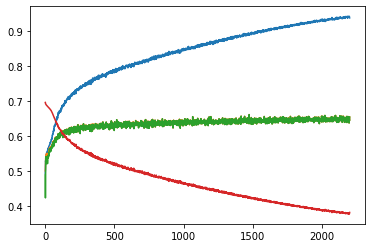

epoch: 0
train_acc: 0.9408877740211582
test_acc: 0.6497273718647765
f1: 0.6497232032626689

epoch: 1
train_acc: 0.9418148107754389
test_acc: 0.6497273718647765
f1: 0.649028385114848

epoch: 2
train_acc: 0.9401243319882212
test_acc: 0.6429661941112322
f1: 0.6426946421761001

epoch: 3
train_acc: 0.9394699531028465
test_acc: 0.6460196292257361
f1: 0.64589927906034

epoch: 4
train_acc: 0.94006980041444
test_acc: 0.6567066521264995
f1: 0.6566130665493207

epoch: 5
train_acc: 0.939851674119315
test_acc: 0.6449291166848419
f1: 0.6445066661220957

epoch: 6
train_acc: 0.9400152688406588
test_acc: 0.6394765539803707
f1: 0.6390417608407822

epoch: 7
train_acc: 0.9372886901515978
test_acc: 0.6529989094874591
f1: 0.6530192575043333

epoch: 8
train_acc: 0.9377794743156288
test_acc: 0.6453653217011995
f1: 0.6453277693929789

epoch: 9
train_acc: 0.9412694950376268
test_acc: 0.6449291166848419
f1: 0.6445624555303596

epoch: 10
train_acc: 0.9389791689388156
test_acc: 0.651690294438386
f1: 0.651550457140

epoch: 89
train_acc: 0.9429054422510633
test_acc: 0.6512540894220283
f1: 0.6510510256591346

epoch: 90
train_acc: 0.9449231104809684
test_acc: 0.6453653217011995
f1: 0.6451879491464367

epoch: 91
train_acc: 0.9428509106772821
test_acc: 0.646237731733915
f1: 0.6460687902431163

epoch: 92
train_acc: 0.9450321736285309
test_acc: 0.6486368593238823
f1: 0.6483881943371274

epoch: 93
train_acc: 0.9431235685461883
test_acc: 0.6510359869138496
f1: 0.6506431366993914

epoch: 94
train_acc: 0.9447595157596248
test_acc: 0.6475463467829881
f1: 0.6474436472102261

epoch: 95
train_acc: 0.9466135892681863
test_acc: 0.6477644492911668
f1: 0.6476716818299527

epoch: 96
train_acc: 0.9427963791035009
test_acc: 0.6473282442748092
f1: 0.6470504855075779

epoch: 97
train_acc: 0.9464499945468426
test_acc: 0.6403489640130862
f1: 0.6403082086567605

epoch: 98
train_acc: 0.9444868578907187
test_acc: 0.6556161395856053
f1: 0.6555125094084729

epoch: 99
train_acc: 0.9449776420547497
test_acc: 0.6449291166848419
f1

epoch: 178
train_acc: 0.9490675100883411
test_acc: 0.6438386041439477
f1: 0.6436956145961211

epoch: 179
train_acc: 0.9485767259243102
test_acc: 0.6508178844056707
f1: 0.6507884918163657

epoch: 180
train_acc: 0.9493946995310285
test_acc: 0.6453653217011995
f1: 0.64508117717721

epoch: 181
train_acc: 0.9475951575962482
test_acc: 0.6486368593238823
f1: 0.648224492836547

epoch: 182
train_acc: 0.9480859417602792
test_acc: 0.6538713195201745
f1: 0.6535599943325443

epoch: 183
train_acc: 0.946068273530374
test_acc: 0.6482006543075245
f1: 0.6480739703536924

epoch: 184
train_acc: 0.947049841858436
test_acc: 0.6444929116684842
f1: 0.6441982624257275

epoch: 185
train_acc: 0.9483585996291853
test_acc: 0.6464558342420937
f1: 0.6459701669301917

epoch: 186
train_acc: 0.9503762678590905
test_acc: 0.6490730643402399
f1: 0.6488427206526997

epoch: 187
train_acc: 0.9495582942523721
test_acc: 0.6412213740458015
f1: 0.6411398059134973

epoch: 188
train_acc: 0.9491220416621223
test_acc: 0.647328244274

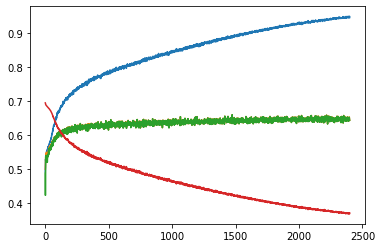

epoch: 0
train_acc: 0.9497218889737158
test_acc: 0.6471101417666303
f1: 0.6466902861090608

epoch: 1
train_acc: 0.9479223470389355
test_acc: 0.6451472191930208
f1: 0.6448677426844954

epoch: 2
train_acc: 0.9495582942523721
test_acc: 0.6477644492911668
f1: 0.6476843687235855

epoch: 3
train_acc: 0.9486312574980914
test_acc: 0.648854961832061
f1: 0.6486110076366902

epoch: 4
train_acc: 0.9488493837932163
test_acc: 0.6529989094874591
f1: 0.6526352795145676

epoch: 5
train_acc: 0.9492856363834661
test_acc: 0.6396946564885496
f1: 0.6395537815057678

epoch: 6
train_acc: 0.9486857890718726
test_acc: 0.6449291166848419
f1: 0.6447976331550068

epoch: 7
train_acc: 0.9501036099901843
test_acc: 0.6412213740458015
f1: 0.6410037420671301

epoch: 8
train_acc: 0.9490675100883411
test_acc: 0.6438386041439477
f1: 0.6436880427917442

epoch: 9
train_acc: 0.9498854836950594
test_acc: 0.6379498364231189
f1: 0.637639639030958

epoch: 10
train_acc: 0.948031410186498
test_acc: 0.6342420937840785
f1: 0.63393385

epoch: 90
train_acc: 0.952502999236558
test_acc: 0.6464558342420937
f1: 0.6462326427941144

epoch: 91
train_acc: 0.9514123677609336
test_acc: 0.650381679389313
f1: 0.6504021808796018

epoch: 92
train_acc: 0.9513033046133711
test_acc: 0.6510359869138496
f1: 0.6508995462525594

epoch: 93
train_acc: 0.9514668993347148
test_acc: 0.6429661941112322
f1: 0.6428303080565434

epoch: 94
train_acc: 0.9547933253353692
test_acc: 0.6492911668484188
f1: 0.6490995035019234

epoch: 95
train_acc: 0.9523394045152143
test_acc: 0.6564885496183206
f1: 0.6564644432865143

epoch: 96
train_acc: 0.9529392518268077
test_acc: 0.6442748091603053
f1: 0.6440590293686864

epoch: 97
train_acc: 0.9498309521212782
test_acc: 0.6440567066521266
f1: 0.6434981202286345

epoch: 98
train_acc: 0.9519031519249646
test_acc: 0.6477644492911668
f1: 0.6476651364511176

epoch: 99
train_acc: 0.9514668993347148
test_acc: 0.6427480916030535
f1: 0.6426439938925433

epoch: 100
train_acc: 0.9531573781219326
test_acc: 0.644711014176663
f1:

epoch: 179
train_acc: 0.9544116043189006
test_acc: 0.6429661941112322
f1: 0.6429507265684373

epoch: 180
train_acc: 0.9561020831061184
test_acc: 0.6455834242093784
f1: 0.6454767750403853

epoch: 181
train_acc: 0.9558294252372124
test_acc: 0.6464558342420937
f1: 0.6460744416940359

epoch: 182
train_acc: 0.9554477042207438
test_acc: 0.6534351145038167
f1: 0.653233320683155

epoch: 183
train_acc: 0.9546297306140256
test_acc: 0.6431842966194111
f1: 0.6432163929146912

epoch: 184
train_acc: 0.9540298833024321
test_acc: 0.6490730643402399
f1: 0.6489537523155189

epoch: 185
train_acc: 0.9552295779256189
test_acc: 0.6538713195201745
f1: 0.6535086037646881

epoch: 186
train_acc: 0.9543570727451194
test_acc: 0.6490730643402399
f1: 0.6486835350298389

epoch: 187
train_acc: 0.9561020831061184
test_acc: 0.6499454743729552
f1: 0.6499109742242375

epoch: 188
train_acc: 0.9524484676627768
test_acc: 0.6429661941112322
f1: 0.6429762210974924

epoch: 189
train_acc: 0.9551750463518377
test_acc: 0.65038167

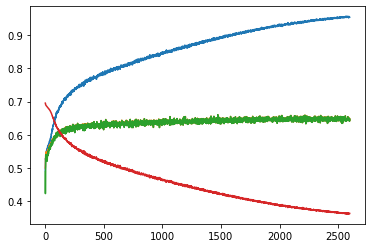

epoch: 0
train_acc: 0.9563747409750245
test_acc: 0.6553980370774264
f1: 0.6552334701505077

epoch: 1
train_acc: 0.9557748936634312
test_acc: 0.6510359869138496
f1: 0.6509343041685406

epoch: 2
train_acc: 0.9551205147780565
test_acc: 0.6479825517993457
f1: 0.6477901732911096

epoch: 3
train_acc: 0.9545751990402443
test_acc: 0.6486368593238823
f1: 0.6483407483617066

epoch: 4
train_acc: 0.9556112989420875
test_acc: 0.6425299890948746
f1: 0.6424224211022717

epoch: 5
train_acc: 0.9564292725488057
test_acc: 0.6510359869138496
f1: 0.6508534306673139

epoch: 6
train_acc: 0.9562656778274621
test_acc: 0.6540894220283533
f1: 0.6537632344219326

epoch: 7
train_acc: 0.955502235794525
test_acc: 0.6473282442748092
f1: 0.6472774631426088

epoch: 8
train_acc: 0.9549023884829316
test_acc: 0.6486368593238823
f1: 0.6483601312014272

epoch: 9
train_acc: 0.9550114516304941
test_acc: 0.6475463467829881
f1: 0.6473368546793852

epoch: 10
train_acc: 0.9563202094012433
test_acc: 0.6540894220283533
f1: 0.653931

epoch: 90
train_acc: 0.9583378776311484
test_acc: 0.6495092693565976
f1: 0.6493051896399182

epoch: 91
train_acc: 0.9578470934671175
test_acc: 0.6556161395856053
f1: 0.6555058466210403

epoch: 92
train_acc: 0.9595921038281164
test_acc: 0.650381679389313
f1: 0.6503200809124964

epoch: 93
train_acc: 0.9583378776311484
test_acc: 0.646237731733915
f1: 0.646205426763222

epoch: 94
train_acc: 0.9579016250408987
test_acc: 0.6510359869138496
f1: 0.6508200143659159

epoch: 95
train_acc: 0.9568655251390555
test_acc: 0.6492911668484188
f1: 0.6490653826332794

epoch: 96
train_acc: 0.9574108408768677
test_acc: 0.646237731733915
f1: 0.645944528622411

epoch: 97
train_acc: 0.9596466354018977
test_acc: 0.6482006543075245
f1: 0.648138671560734

epoch: 98
train_acc: 0.9596466354018977
test_acc: 0.6512540894220283
f1: 0.6512247335505114

epoch: 99
train_acc: 0.9581197513360236
test_acc: 0.6453653217011995
f1: 0.6450908227362508

epoch: 100
train_acc: 0.9589377249427419
test_acc: 0.640567066521265
f1: 0.6

epoch: 178
train_acc: 0.960464609008616
test_acc: 0.6495092693565976
f1: 0.6493685564335375

epoch: 179
train_acc: 0.9597556985494602
test_acc: 0.6497273718647765
f1: 0.6497495786840307

epoch: 180
train_acc: 0.9617733667793652
test_acc: 0.6416575790621593
f1: 0.6413850318236606

epoch: 181
train_acc: 0.9601919511397099
test_acc: 0.6438386041439477
f1: 0.6436048246276311

epoch: 182
train_acc: 0.9608463300250846
test_acc: 0.6442748091603053
f1: 0.6440590293686864

epoch: 183
train_acc: 0.9594285091067728
test_acc: 0.6466739367502726
f1: 0.6465357905807165

epoch: 184
train_acc: 0.9609008615988658
test_acc: 0.650381679389313
f1: 0.6501781076495264

epoch: 185
train_acc: 0.9600283564183663
test_acc: 0.6492911668484188
f1: 0.6489906864830003

epoch: 186
train_acc: 0.9605736721561784
test_acc: 0.6458015267175573
f1: 0.6455368631847719

epoch: 187
train_acc: 0.9620460246482714
test_acc: 0.6436205016357688
f1: 0.6436246070026023

epoch: 188
train_acc: 0.9614461773366779
test_acc: 0.647110141

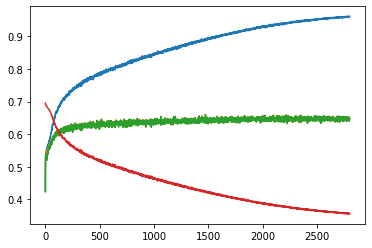

epoch: 0
train_acc: 0.9616643036318028
test_acc: 0.6549618320610687
f1: 0.654986892490554

epoch: 1
train_acc: 0.9598647616970226
test_acc: 0.646237731733915
f1: 0.6462601597917171

epoch: 2
train_acc: 0.9612280510415531
test_acc: 0.6468920392584515
f1: 0.6467032068746029

epoch: 3
train_acc: 0.9613916457628967
test_acc: 0.6375136314067612
f1: 0.6371502854789468

epoch: 4
train_acc: 0.9600828879921475
test_acc: 0.6477644492911668
f1: 0.6475332466464324

epoch: 5
train_acc: 0.9604100774348348
test_acc: 0.6521264994547438
f1: 0.6521020870107875

epoch: 6
train_acc: 0.9603555458610535
test_acc: 0.6466739367502726
f1: 0.6466027984849841

epoch: 7
train_acc: 0.961718835205584
test_acc: 0.6521264994547438
f1: 0.6519794416735041

epoch: 8
train_acc: 0.9607917984513034
test_acc: 0.6508178844056707
f1: 0.6504731089729263

epoch: 9
train_acc: 0.960955393172647
test_acc: 0.6482006543075245
f1: 0.6479958126255061

epoch: 10
train_acc: 0.9594285091067728
test_acc: 0.6431842966194111
f1: 0.643029614

epoch: 90
train_acc: 0.9625368088123023
test_acc: 0.6436205016357688
f1: 0.6435547581786821

epoch: 91
train_acc: 0.9618278983531465
test_acc: 0.6388222464558343
f1: 0.6385228972865059

epoch: 92
train_acc: 0.9615007089104591
test_acc: 0.648854961832061
f1: 0.6478399423841618

epoch: 93
train_acc: 0.9633547824190206
test_acc: 0.6482006543075245
f1: 0.6479872558992588

epoch: 94
train_acc: 0.963191187697677
test_acc: 0.6527808069792803
f1: 0.6527335230309113

epoch: 95
train_acc: 0.9616643036318028
test_acc: 0.6440567066521266
f1: 0.6439392173916882

epoch: 96
train_acc: 0.961936961500709
test_acc: 0.6403489640130862
f1: 0.6400458684347946

epoch: 97
train_acc: 0.9647180717635511
test_acc: 0.6521264994547438
f1: 0.6515869306635124

epoch: 98
train_acc: 0.9620460246482714
test_acc: 0.6451472191930208
f1: 0.6451173492724716

epoch: 99
train_acc: 0.9636274402879267
test_acc: 0.639258451472192
f1: 0.6391795992308207

epoch: 100
train_acc: 0.9641182244519577
test_acc: 0.6468920392584515
f1: 

epoch: 179
train_acc: 0.9633547824190206
test_acc: 0.6499454743729552
f1: 0.6493370683103217

epoch: 180
train_acc: 0.9640636928781765
test_acc: 0.6490730643402399
f1: 0.6487574233655098

epoch: 181
train_acc: 0.9641182244519577
test_acc: 0.6455834242093784
f1: 0.6454181241212582

epoch: 182
train_acc: 0.9645544770422074
test_acc: 0.6453653217011995
f1: 0.6451630909841453

epoch: 183
train_acc: 0.9629730614025521
test_acc: 0.6479825517993457
f1: 0.6477646894916177

epoch: 184
train_acc: 0.9640091613043953
test_acc: 0.6468920392584515
f1: 0.6466948888760062

epoch: 185
train_acc: 0.9648816664848947
test_acc: 0.6512540894220283
f1: 0.6509404101687073

epoch: 186
train_acc: 0.9637365034354891
test_acc: 0.6468920392584515
f1: 0.6465538728556531

epoch: 187
train_acc: 0.9656451085178318
test_acc: 0.651690294438386
f1: 0.651377007529347

epoch: 188
train_acc: 0.9654815137964882
test_acc: 0.651690294438386
f1: 0.651578744175935

epoch: 189
train_acc: 0.9648816664848947
test_acc: 0.64929116684

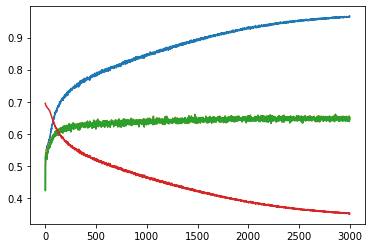

epoch: 0
train_acc: 0.9651543243538009
test_acc: 0.6519083969465649
f1: 0.651684297688255

epoch: 1
train_acc: 0.9646090086159886
test_acc: 0.6510359869138496
f1: 0.6509657268987495

epoch: 2
train_acc: 0.9641182244519577
test_acc: 0.6394765539803707
f1: 0.6393680671641582

epoch: 3
train_acc: 0.9649361980586759
test_acc: 0.6473282442748092
f1: 0.6470504855075779

epoch: 4
train_acc: 0.9655360453702694
test_acc: 0.6608505997818975
f1: 0.6605357418325369

epoch: 5
train_acc: 0.9646090086159886
test_acc: 0.6514721919302072
f1: 0.6513706362883299

epoch: 6
train_acc: 0.9670629294361436
test_acc: 0.6505997818974918
f1: 0.6504483145493749

epoch: 7
train_acc: 0.9647180717635511
test_acc: 0.6475463467829881
f1: 0.6470802663341723

epoch: 8
train_acc: 0.9658087032391754
test_acc: 0.6440567066521266
f1: 0.643655999433379

epoch: 9
train_acc: 0.9649361980586759
test_acc: 0.6486368593238823
f1: 0.6484489600216092

epoch: 10
train_acc: 0.9644999454684262
test_acc: 0.6551799345692475
f1: 0.6551075

epoch: 89
train_acc: 0.9678809030428618
test_acc: 0.6512540894220283
f1: 0.6507506784757993

epoch: 90
train_acc: 0.9650997927800197
test_acc: 0.6501635768811341
f1: 0.6498832768709994

epoch: 91
train_acc: 0.9658632348129567
test_acc: 0.6501635768811341
f1: 0.649873627564949

epoch: 92
train_acc: 0.9649907296324572
test_acc: 0.6479825517993457
f1: 0.6478865879355806

epoch: 93
train_acc: 0.9659722979605191
test_acc: 0.6536532170119956
f1: 0.6534388642581714

epoch: 94
train_acc: 0.9663540189769877
test_acc: 0.6560523446019629
f1: 0.6556262704581877

epoch: 95
train_acc: 0.9672265241574872
test_acc: 0.641875681570338
f1: 0.64140210230242

epoch: 96
train_acc: 0.9677718398952994
test_acc: 0.6436205016357688
f1: 0.6434811616104263

epoch: 97
train_acc: 0.9667902715672374
test_acc: 0.6412213740458015
f1: 0.6408343347234355

epoch: 98
train_acc: 0.9645544770422074
test_acc: 0.6529989094874591
f1: 0.6527798486646735

epoch: 99
train_acc: 0.9664630821245501
test_acc: 0.6525627044711014
f1: 0

epoch: 177
train_acc: 0.969680444977642
test_acc: 0.6436205016357688
f1: 0.6436361077635471

epoch: 178
train_acc: 0.9684807503544552
test_acc: 0.6482006543075245
f1: 0.6478842286442308

epoch: 179
train_acc: 0.9658087032391754
test_acc: 0.6473282442748092
f1: 0.6465582177615724

epoch: 180
train_acc: 0.968153560911768
test_acc: 0.6420937840785169
f1: 0.6417718655952775

epoch: 181
train_acc: 0.9665176136983313
test_acc: 0.6420937840785169
f1: 0.6421181440425233

epoch: 182
train_acc: 0.966190424255644
test_acc: 0.6466739367502726
f1: 0.646702726463717

epoch: 183
train_acc: 0.9671174610099248
test_acc: 0.6499454743729552
f1: 0.6495786446391459

epoch: 184
train_acc: 0.967171992583706
test_acc: 0.6490730643402399
f1: 0.6484765364878827

epoch: 185
train_acc: 0.9673901188788309
test_acc: 0.646237731733915
f1: 0.6458937033210317

epoch: 186
train_acc: 0.9678263714690806
test_acc: 0.653217011995638
f1: 0.6531802911038355

epoch: 187
train_acc: 0.9682080924855492
test_acc: 0.65059978189749

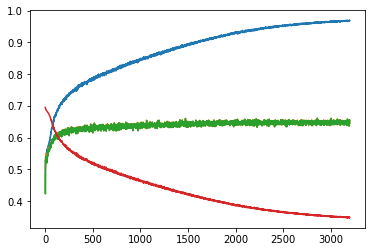

epoch: 0
train_acc: 0.9686443450757989
test_acc: 0.6414394765539804
f1: 0.6412086374683529

epoch: 1
train_acc: 0.969680444977642
test_acc: 0.6486368593238823
f1: 0.6485507165002774

epoch: 2
train_acc: 0.9678809030428618
test_acc: 0.6525627044711014
f1: 0.652477524137146

epoch: 3
train_acc: 0.9693532555349548
test_acc: 0.6449291166848419
f1: 0.6447266372215182

epoch: 4
train_acc: 0.9680990293379867
test_acc: 0.6442748091603053
f1: 0.6439548523984752

epoch: 5
train_acc: 0.968153560911768
test_acc: 0.6442748091603053
f1: 0.6439548523984752

epoch: 6
train_acc: 0.9683171556331116
test_acc: 0.6490730643402399
f1: 0.6489247157696978

epoch: 7
train_acc: 0.9678809030428618
test_acc: 0.6444929116684842
f1: 0.6441883202532902

epoch: 8
train_acc: 0.9691896608136111
test_acc: 0.6510359869138496
f1: 0.6506541026465391

epoch: 9
train_acc: 0.9692441923873923
test_acc: 0.6477644492911668
f1: 0.6474060641777157

epoch: 10
train_acc: 0.967935434616643
test_acc: 0.6499454743729552
f1: 0.649679230

epoch: 90
train_acc: 0.9678263714690806
test_acc: 0.6477644492911668
f1: 0.6476651364511176

epoch: 91
train_acc: 0.9693532555349548
test_acc: 0.6473282442748092
f1: 0.6469694153407842

epoch: 92
train_acc: 0.9686443450757989
test_acc: 0.6584514721919302
f1: 0.6581393431827937

epoch: 93
train_acc: 0.9693532555349548
test_acc: 0.6545256270447111
f1: 0.6543683186546019

epoch: 94
train_acc: 0.9689715345184862
test_acc: 0.6479825517993457
f1: 0.6478663583763388

epoch: 95
train_acc: 0.9690260660922674
test_acc: 0.640567066521265
f1: 0.6402790774834208

epoch: 96
train_acc: 0.9695713818300796
test_acc: 0.6451472191930208
f1: 0.6447968446589325

epoch: 97
train_acc: 0.9685352819282365
test_acc: 0.6451472191930208
f1: 0.6449052596141956

epoch: 98
train_acc: 0.9691351292398298
test_acc: 0.6484187568157034
f1: 0.6480872218714726

epoch: 99
train_acc: 0.9693532555349548
test_acc: 0.6471101417666303
f1: 0.6469936603797497

epoch: 100
train_acc: 0.9693532555349548
test_acc: 0.6484187568157034
f

epoch: 178
train_acc: 0.9700076344203293
test_acc: 0.6499454743729552
f1: 0.6495893083623739

epoch: 179
train_acc: 0.9700621659941105
test_acc: 0.6407851690294438
f1: 0.6406770759947783

epoch: 180
train_acc: 0.9721888973715781
test_acc: 0.6501635768811341
f1: 0.6499805642439823

epoch: 181
train_acc: 0.9700076344203293
test_acc: 0.6427480916030535
f1: 0.6424216118348761

epoch: 182
train_acc: 0.9708256080270476
test_acc: 0.6438386041439477
f1: 0.6435580969906459

epoch: 183
train_acc: 0.9695168502562984
test_acc: 0.6538713195201745
f1: 0.6535599943325443

epoch: 184
train_acc: 0.9705529501581416
test_acc: 0.6353326063249727
f1: 0.635079257620215

epoch: 185
train_acc: 0.9706074817319228
test_acc: 0.6423118865866958
f1: 0.6421247664339967

epoch: 186
train_acc: 0.9705529501581416
test_acc: 0.6540894220283533
f1: 0.6539394674627395

epoch: 187
train_acc: 0.9698985712727669
test_acc: 0.6440567066521266
f1: 0.6438621826586683

epoch: 188
train_acc: 0.9712073290435161
test_acc: 0.64362050

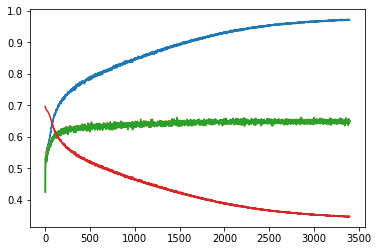

epoch: 0
train_acc: 0.9708256080270476
test_acc: 0.6420937840785169
f1: 0.6418588592859416

epoch: 1
train_acc: 0.9714254553386411
test_acc: 0.6562704471101418
f1: 0.6559463161721096

epoch: 2
train_acc: 0.9710982658959537
test_acc: 0.644711014176663
f1: 0.6444687571675013

epoch: 3
train_acc: 0.9721888973715781
test_acc: 0.6403489640130862
f1: 0.6400458684347946

epoch: 4
train_acc: 0.969407787108736
test_acc: 0.6353326063249727
f1: 0.635226347856125

epoch: 5
train_acc: 0.9714799869124223
test_acc: 0.6547437295528898
f1: 0.6547375168183386

epoch: 6
train_acc: 0.9714799869124223
test_acc: 0.6514721919302072
f1: 0.6512478118457591

epoch: 7
train_acc: 0.9718071763551096
test_acc: 0.6549618320610687
f1: 0.654704013274821

epoch: 8
train_acc: 0.9726251499618279
test_acc: 0.650381679389313
f1: 0.6500153067642062

epoch: 9
train_acc: 0.9713709237648599
test_acc: 0.6455834242093784
f1: 0.645274760263497

epoch: 10
train_acc: 0.9716981132075472
test_acc: 0.6410032715376227
f1: 0.64085534480

epoch: 90
train_acc: 0.9723524920929218
test_acc: 0.651690294438386
f1: 0.6515920884906719

epoch: 91
train_acc: 0.9725160868142655
test_acc: 0.6429661941112322
f1: 0.64289124787818

epoch: 92
train_acc: 0.9731159341258588
test_acc: 0.6510359869138496
f1: 0.6509938168272529

epoch: 93
train_acc: 0.9717526447813284
test_acc: 0.6505997818974918
f1: 0.6503660070067568

epoch: 94
train_acc: 0.9718617079288908
test_acc: 0.6510359869138496
f1: 0.6507563859062339

epoch: 95
train_acc: 0.9710437343221725
test_acc: 0.6449291166848419
f1: 0.6447180689468064

epoch: 96
train_acc: 0.9718617079288908
test_acc: 0.6501635768811341
f1: 0.6500042822739782

epoch: 97
train_acc: 0.9718071763551096
test_acc: 0.648854961832061
f1: 0.6487390563729278

epoch: 98
train_acc: 0.9709346711746101
test_acc: 0.6431842966194111
f1: 0.6430296146084752

epoch: 99
train_acc: 0.9727342131093903
test_acc: 0.6477644492911668
f1: 0.6469650792760414

epoch: 100
train_acc: 0.9730068709782964
test_acc: 0.6466739367502726
f1: 

epoch: 178
train_acc: 0.9736067182898899
test_acc: 0.6505997818974918
f1: 0.6504558094665301

epoch: 179
train_acc: 0.9709892027483913
test_acc: 0.6416575790621593
f1: 0.6415428157051104

epoch: 180
train_acc: 0.972897807830734
test_acc: 0.648854961832061
f1: 0.6486872702166567

epoch: 181
train_acc: 0.97317046569964
test_acc: 0.6414394765539804
f1: 0.6413139806713632

epoch: 182
train_acc: 0.9714254553386411
test_acc: 0.651690294438386
f1: 0.6514064307948721

epoch: 183
train_acc: 0.9725160868142655
test_acc: 0.6427480916030535
f1: 0.6427154679643386

epoch: 184
train_acc: 0.9717526447813284
test_acc: 0.6460196292257361
f1: 0.6458466006938572

epoch: 185
train_acc: 0.973388591994765
test_acc: 0.6449291166848419
f1: 0.6447180689468064

epoch: 186
train_acc: 0.9735521867161087
test_acc: 0.6455834242093784
f1: 0.6454101824568812

epoch: 187
train_acc: 0.9735521867161087
test_acc: 0.6508178844056707
f1: 0.650631151455367

epoch: 188
train_acc: 0.9729523394045152
test_acc: 0.64645583424209

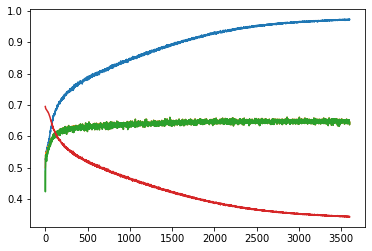

epoch: 0
train_acc: 0.9739339077325772
test_acc: 0.6425299890948746
f1: 0.6421662781345364

epoch: 1
train_acc: 0.9734976551423274
test_acc: 0.6490730643402399
f1: 0.6485414767260324

epoch: 2
train_acc: 0.9732249972734213
test_acc: 0.6591057797164668
f1: 0.6588820213674143

epoch: 3
train_acc: 0.9726796815356091
test_acc: 0.6394765539803707
f1: 0.6393467284529781

epoch: 4
train_acc: 0.9744792234703894
test_acc: 0.6536532170119956
f1: 0.6535249640357191

epoch: 5
train_acc: 0.9722434289453593
test_acc: 0.6468920392584515
f1: 0.6468117603489071

epoch: 6
train_acc: 0.9733340604209838
test_acc: 0.6466739367502726
f1: 0.6463197728495148

epoch: 7
train_acc: 0.9731159341258588
test_acc: 0.64340239912759
f1: 0.6431215484260296

epoch: 8
train_acc: 0.9740429708801396
test_acc: 0.641875681570338
f1: 0.6417846392704184

epoch: 9
train_acc: 0.9726796815356091
test_acc: 0.6529989094874591
f1: 0.6528739533990855

epoch: 10
train_acc: 0.9734976551423274
test_acc: 0.6412213740458015
f1: 0.64109217

epoch: 90
train_acc: 0.9737157814374523
test_acc: 0.6451472191930208
f1: 0.6450194356884424

epoch: 91
train_acc: 0.9737157814374523
test_acc: 0.6486368593238823
f1: 0.648268658263965

epoch: 92
train_acc: 0.9739339077325772
test_acc: 0.6479825517993457
f1: 0.6475862641455109

epoch: 93
train_acc: 0.9734976551423274
test_acc: 0.651690294438386
f1: 0.6515430522586746

epoch: 94
train_acc: 0.9737157814374523
test_acc: 0.6479825517993457
f1: 0.6479602621755184

epoch: 95
train_acc: 0.9732795288472025
test_acc: 0.6529989094874591
f1: 0.6529926653556392

epoch: 96
train_acc: 0.9742610971752644
test_acc: 0.6468920392584515
f1: 0.6467990420326276

epoch: 97
train_acc: 0.9736067182898899
test_acc: 0.6490730643402399
f1: 0.6486498446417535

epoch: 98
train_acc: 0.9739884393063584
test_acc: 0.6471101417666303
f1: 0.6466671570254321

epoch: 99
train_acc: 0.9752971970771076
test_acc: 0.6466739367502726
f1: 0.6464639261018589

epoch: 100
train_acc: 0.9731159341258588
test_acc: 0.6451472191930208
f1

epoch: 178
train_acc: 0.9749700076344203
test_acc: 0.6453653217011995
f1: 0.6448842574144125

epoch: 179
train_acc: 0.9755698549460138
test_acc: 0.6564885496183206
f1: 0.6561072515052804

epoch: 180
train_acc: 0.9749154760606391
test_acc: 0.6505997818974918
f1: 0.6504703982274698

epoch: 181
train_acc: 0.9746973497655143
test_acc: 0.6436205016357688
f1: 0.6435606316362303

epoch: 182
train_acc: 0.9746973497655143
test_acc: 0.6466739367502726
f1: 0.6465052035720397

epoch: 183
train_acc: 0.974642818191733
test_acc: 0.6466739367502726
f1: 0.6463510446718553

epoch: 184
train_acc: 0.9743701603228269
test_acc: 0.64340239912759
f1: 0.6430065753721481

epoch: 185
train_acc: 0.9761697022576071
test_acc: 0.644711014176663
f1: 0.6445453071960182

epoch: 186
train_acc: 0.974642818191733
test_acc: 0.64340239912759
f1: 0.6434085099523096

epoch: 187
train_acc: 0.9739884393063584
test_acc: 0.6442748091603053
f1: 0.644229111427836

epoch: 188
train_acc: 0.9743156287490456
test_acc: 0.636859323882224

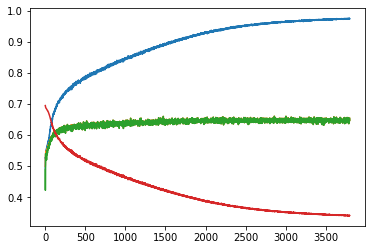

epoch: 0
train_acc: 0.9744246918966082
test_acc: 0.6372955288985823
f1: 0.6369999338834517

epoch: 1
train_acc: 0.974152034027702
test_acc: 0.6477644492911668
f1: 0.6474676031062423

epoch: 2
train_acc: 0.9748609444868579
test_acc: 0.6466739367502726
f1: 0.6465841142619232

epoch: 3
train_acc: 0.9749154760606391
test_acc: 0.6505997818974918
f1: 0.6504844523661057

epoch: 4
train_acc: 0.9748609444868579
test_acc: 0.6495092693565976
f1: 0.6492040244575014

epoch: 5
train_acc: 0.9745882866179518
test_acc: 0.6423118865866958
f1: 0.641862878567187

epoch: 6
train_acc: 0.9743156287490456
test_acc: 0.6396946564885496
f1: 0.6391553387862517

epoch: 7
train_acc: 0.9749700076344203
test_acc: 0.6508178844056707
f1: 0.6507128103628658

epoch: 8
train_acc: 0.9742065656014832
test_acc: 0.6510359869138496
f1: 0.650999035073042

epoch: 9
train_acc: 0.9748609444868579
test_acc: 0.6458015267175573
f1: 0.645711482445286

epoch: 10
train_acc: 0.9750790707819827
test_acc: 0.6492911668484188
f1: 0.648701652

epoch: 90
train_acc: 0.973388591994765
test_acc: 0.6458015267175573
f1: 0.6454980564977565

epoch: 91
train_acc: 0.9758970443887011
test_acc: 0.646237731733915
f1: 0.6461278742477238

epoch: 92
train_acc: 0.97540626022467
test_acc: 0.6486368593238823
f1: 0.6485243311630753

epoch: 93
train_acc: 0.9754607917984514
test_acc: 0.651690294438386
f1: 0.6516231195440708

epoch: 94
train_acc: 0.9763332969789508
test_acc: 0.6394765539803707
f1: 0.6392307278071698

epoch: 95
train_acc: 0.9764968917002945
test_acc: 0.646237731733915
f1: 0.6461067327871136

epoch: 96
train_acc: 0.97540626022467
test_acc: 0.6519083969465649
f1: 0.6516574970874921

epoch: 97
train_acc: 0.9751881339295452
test_acc: 0.648854961832061
f1: 0.6484815902337953

epoch: 98
train_acc: 0.9761151706838259
test_acc: 0.6466739367502726
f1: 0.6464890985506554

epoch: 99
train_acc: 0.97540626022467
test_acc: 0.6468920392584515
f1: 0.6466139369429613

epoch: 100
train_acc: 0.9753517286508888
test_acc: 0.6543075245365322
f1: 0.65412

epoch: 178
train_acc: 0.9753517286508888
test_acc: 0.6423118865866958
f1: 0.6422076617727541

epoch: 179
train_acc: 0.9764968917002945
test_acc: 0.6460196292257361
f1: 0.6457782645075842

epoch: 180
train_acc: 0.9764968917002945
test_acc: 0.6501635768811341
f1: 0.6494510932933785

epoch: 181
train_acc: 0.9769331442905442
test_acc: 0.6545256270447111
f1: 0.6542944788381417

epoch: 182
train_acc: 0.9762242338313883
test_acc: 0.640567066521265
f1: 0.6404189600504631

epoch: 183
train_acc: 0.9745882866179518
test_acc: 0.6436205016357688
f1: 0.643495769110102

epoch: 184
train_acc: 0.976387828552732
test_acc: 0.646237731733915
f1: 0.6461724710929146

epoch: 185
train_acc: 0.9758425128149198
test_acc: 0.6468920392584515
f1: 0.6463443515637783

epoch: 186
train_acc: 0.9755698549460138
test_acc: 0.6460196292257361
f1: 0.6453489880038338

epoch: 187
train_acc: 0.9764968917002945
test_acc: 0.6482006543075245
f1: 0.647933083585858

epoch: 188
train_acc: 0.9767150179954194
test_acc: 0.644492911668

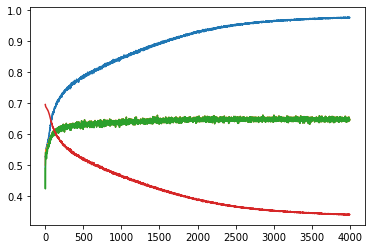

epoch: 0
train_acc: 0.9765514232740757
test_acc: 0.6440567066521266
f1: 0.6440190157745028

epoch: 1
train_acc: 0.9761697022576071
test_acc: 0.6451472191930208
f1: 0.6450047550201402

epoch: 2
train_acc: 0.9758970443887011
test_acc: 0.6401308615049073
f1: 0.6398123304510045

epoch: 3
train_acc: 0.9766604864216382
test_acc: 0.6427480916030535
f1: 0.6422511504120405

epoch: 4
train_acc: 0.9752426655033264
test_acc: 0.6410032715376227
f1: 0.640610408097627

epoch: 5
train_acc: 0.9756789180935762
test_acc: 0.64340239912759
f1: 0.643081657677196

epoch: 6
train_acc: 0.9761151706838259
test_acc: 0.6442748091603053
f1: 0.6442546898777318

epoch: 7
train_acc: 0.9761697022576071
test_acc: 0.6479825517993457
f1: 0.6479176130357363

epoch: 8
train_acc: 0.9765514232740757
test_acc: 0.6412213740458015
f1: 0.6408671232107831

epoch: 9
train_acc: 0.9757334496673574
test_acc: 0.6458015267175573
f1: 0.6451233874820574

epoch: 10
train_acc: 0.976387828552732
test_acc: 0.6505997818974918
f1: 0.6501495257

epoch: 90
train_acc: 0.9767695495692006
test_acc: 0.6464558342420937
f1: 0.646321276334549

epoch: 91
train_acc: 0.976878612716763
test_acc: 0.6523446019629225
f1: 0.6519855983509787

epoch: 92
train_acc: 0.9769876758643254
test_acc: 0.648854961832061
f1: 0.6486630600983186

epoch: 93
train_acc: 0.9768240811429818
test_acc: 0.6547437295528898
f1: 0.6545083134414698

epoch: 94
train_acc: 0.9764968917002945
test_acc: 0.6449291166848419
f1: 0.6446348289748983

epoch: 95
train_acc: 0.9775329916021377
test_acc: 0.6388222464558343
f1: 0.6385426829343368

epoch: 96
train_acc: 0.9770422074381067
test_acc: 0.6464558342420937
f1: 0.646349447594132

epoch: 97
train_acc: 0.9771512705856691
test_acc: 0.641875681570338
f1: 0.6417204322659634

epoch: 98
train_acc: 0.9775875231759189
test_acc: 0.6497273718647765
f1: 0.6495976651393985

epoch: 99
train_acc: 0.9770967390118879
test_acc: 0.6497273718647765
f1: 0.6496318836583286

epoch: 100
train_acc: 0.9769331442905442
test_acc: 0.6458015267175573
f1: 0

epoch: 178
train_acc: 0.977860181044825
test_acc: 0.648854961832061
f1: 0.6486793346406908

epoch: 179
train_acc: 0.9782419020612935
test_acc: 0.6510359869138496
f1: 0.6509343041685406

epoch: 180
train_acc: 0.9772603337332315
test_acc: 0.6444929116684842
f1: 0.6441038670711616

epoch: 181
train_acc: 0.9784600283564183
test_acc: 0.6508178844056707
f1: 0.6504080776109944

epoch: 182
train_acc: 0.9776420547497001
test_acc: 0.6431842966194111
f1: 0.6430870246980234

epoch: 183
train_acc: 0.9779147126186062
test_acc: 0.6477644492911668
f1: 0.6475842459873897

epoch: 184
train_acc: 0.9783509652088559
test_acc: 0.6440567066521266
f1: 0.643853729696264

epoch: 185
train_acc: 0.9783509652088559
test_acc: 0.6468920392584515
f1: 0.6466421394362566

epoch: 186
train_acc: 0.9773148653070127
test_acc: 0.650381679389313
f1: 0.6498394042969345

epoch: 187
train_acc: 0.9777511178972625
test_acc: 0.6495092693565976
f1: 0.6490398223850221

epoch: 188
train_acc: 0.9774239284545752
test_acc: 0.64711014176

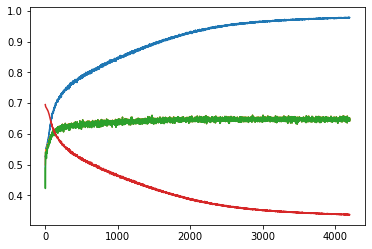

epoch: 0
train_acc: 0.9773693968807939
test_acc: 0.6455834242093784
f1: 0.6454557977834782

epoch: 1
train_acc: 0.9768240811429818
test_acc: 0.64340239912759
f1: 0.6432881945696016

epoch: 2
train_acc: 0.9782419020612935
test_acc: 0.6449291166848419
f1: 0.644759550256346

epoch: 3
train_acc: 0.9781873704875123
test_acc: 0.6534351145038167
f1: 0.6531133722005795

epoch: 4
train_acc: 0.9775329916021377
test_acc: 0.6451472191930208
f1: 0.6447644149513857

epoch: 5
train_acc: 0.9786236230777621
test_acc: 0.6468920392584515
f1: 0.6464889249318133

epoch: 6
train_acc: 0.977860181044825
test_acc: 0.6486368593238823
f1: 0.6483696203700045

epoch: 7
train_acc: 0.9796597229796052
test_acc: 0.6540894220283533
f1: 0.6538838190108321

epoch: 8
train_acc: 0.9770422074381067
test_acc: 0.6475463467829881
f1: 0.6471823882905781

epoch: 9
train_acc: 0.9776965863234813
test_acc: 0.6468920392584515
f1: 0.6466948888760062

epoch: 10
train_acc: 0.977860181044825
test_acc: 0.648854961832061
f1: 0.64867126460

epoch: 89
train_acc: 0.9786781546515433
test_acc: 0.6386041439476554
f1: 0.6380303653101962

epoch: 90
train_acc: 0.9790598756680118
test_acc: 0.6458015267175573
f1: 0.645477837374749

epoch: 91
train_acc: 0.9783509652088559
test_acc: 0.6468920392584515
f1: 0.6468117603489071

epoch: 92
train_acc: 0.979114407241793
test_acc: 0.6569247546346783
f1: 0.6567332058072622

epoch: 93
train_acc: 0.9785145599301995
test_acc: 0.6499454743729552
f1: 0.6497582748818639

epoch: 94
train_acc: 0.9775875231759189
test_acc: 0.6495092693565976
f1: 0.6490634689666142

epoch: 95
train_acc: 0.9781873704875123
test_acc: 0.6495092693565976
f1: 0.6490398223850221

epoch: 96
train_acc: 0.9779692441923874
test_acc: 0.6484187568157034
f1: 0.6480974592660685

epoch: 97
train_acc: 0.9792780019631366
test_acc: 0.6482006543075245
f1: 0.6481899357849363

epoch: 98
train_acc: 0.9782419020612935
test_acc: 0.6390403489640131
f1: 0.6389518533879325

epoch: 99
train_acc: 0.9792234703893554
test_acc: 0.6551799345692475
f1:

epoch: 178
train_acc: 0.9798233177009489
test_acc: 0.6492911668484188
f1: 0.6491540439838223

epoch: 179
train_acc: 0.9786781546515433
test_acc: 0.648854961832061
f1: 0.6481966821301495

epoch: 180
train_acc: 0.9790053440942306
test_acc: 0.6508178844056707
f1: 0.6504626060362372

epoch: 181
train_acc: 0.9790598756680118
test_acc: 0.6490730643402399
f1: 0.6488935305224212

epoch: 182
train_acc: 0.9789508125204494
test_acc: 0.6543075245365322
f1: 0.6541226577493797

epoch: 183
train_acc: 0.978132838913731
test_acc: 0.6501635768811341
f1: 0.6499383543182712

epoch: 184
train_acc: 0.979114407241793
test_acc: 0.6471101417666303
f1: 0.6468077927422229

epoch: 185
train_acc: 0.9781873704875123
test_acc: 0.6453653217011995
f1: 0.6447825384180637

epoch: 186
train_acc: 0.9794961282582615
test_acc: 0.6475463467829881
f1: 0.6471495680663852

epoch: 187
train_acc: 0.9787326862253245
test_acc: 0.6458015267175573
f1: 0.6457178612401602

epoch: 188
train_acc: 0.9791689388155742
test_acc: 0.6444929116

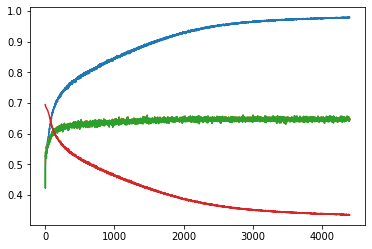

epoch: 0
train_acc: 0.9799323808485113
test_acc: 0.6458015267175573
f1: 0.6453801141168819

epoch: 1
train_acc: 0.9784054967826371
test_acc: 0.6466739367502726
f1: 0.6463407564713309

epoch: 2
train_acc: 0.980095975569855
test_acc: 0.6477644492911668
f1: 0.6476446923490137

epoch: 3
train_acc: 0.9790053440942306
test_acc: 0.6468920392584515
f1: 0.6467194371678096

epoch: 4
train_acc: 0.9796597229796052
test_acc: 0.6444929116684842
f1: 0.6442459269862142

epoch: 5
train_acc: 0.9790053440942306
test_acc: 0.6540894220283533
f1: 0.6537930527127105

epoch: 6
train_acc: 0.9797142545533865
test_acc: 0.655834242093784
f1: 0.6555096998220743

epoch: 7
train_acc: 0.979114407241793
test_acc: 0.6427480916030535
f1: 0.6423114074004588

epoch: 8
train_acc: 0.979114407241793
test_acc: 0.6473282442748092
f1: 0.6472152970147068

epoch: 9
train_acc: 0.9792234703893554
test_acc: 0.6455834242093784
f1: 0.6455933776929902

epoch: 10
train_acc: 0.9793870651106991
test_acc: 0.6569247546346783
f1: 0.656934389

epoch: 90
train_acc: 0.9801505071436362
test_acc: 0.6499454743729552
f1: 0.6497067865278329

epoch: 91
train_acc: 0.9794961282582615
test_acc: 0.6512540894220283
f1: 0.6511748022222992

epoch: 92
train_acc: 0.9795506598320427
test_acc: 0.6495092693565976
f1: 0.6494588022697417

epoch: 93
train_acc: 0.9790053440942306
test_acc: 0.6455834242093784
f1: 0.6454629257381715

epoch: 94
train_acc: 0.980095975569855
test_acc: 0.6497273718647765
f1: 0.6493970709215787

epoch: 95
train_acc: 0.9788962809466681
test_acc: 0.6540894220283533
f1: 0.6538027265074869

epoch: 96
train_acc: 0.9782964336350747
test_acc: 0.648854961832061
f1: 0.6485441527431015

epoch: 97
train_acc: 0.9798233177009489
test_acc: 0.6429661941112322
f1: 0.6428376252132638

epoch: 98
train_acc: 0.9800414439960737
test_acc: 0.6455834242093784
f1: 0.6455813321461947

epoch: 99
train_acc: 0.9790053440942306
test_acc: 0.6521264994547438
f1: 0.6521159005436908

epoch: 100
train_acc: 0.9790053440942306
test_acc: 0.6468920392584515
f1

epoch: 178
train_acc: 0.9794415966844803
test_acc: 0.6521264994547438
f1: 0.6517182284756627

epoch: 179
train_acc: 0.9794961282582615
test_acc: 0.6508178844056707
f1: 0.650570762963216

epoch: 180
train_acc: 0.9800414439960737
test_acc: 0.648854961832061
f1: 0.6483293555967707

epoch: 181
train_acc: 0.9804776965863234
test_acc: 0.6468920392584515
f1: 0.646750275585499

epoch: 182
train_acc: 0.9798233177009489
test_acc: 0.6458015267175573
f1: 0.6457302128022309

epoch: 183
train_acc: 0.980095975569855
test_acc: 0.6486368593238823
f1: 0.648563103440286

epoch: 184
train_acc: 0.9793325335369178
test_acc: 0.6495092693565976
f1: 0.6493611051845272

epoch: 185
train_acc: 0.9795506598320427
test_acc: 0.6501635768811341
f1: 0.6500119204352042

epoch: 186
train_acc: 0.9802050387174174
test_acc: 0.651690294438386
f1: 0.6511500490718679

epoch: 187
train_acc: 0.9792780019631366
test_acc: 0.6486368593238823
f1: 0.6482131135598912

epoch: 188
train_acc: 0.9792234703893554
test_acc: 0.6479825517993

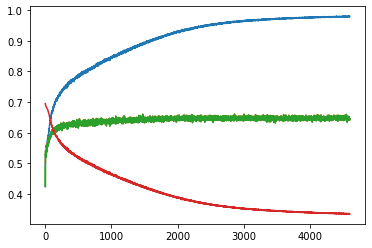

epoch: 0
train_acc: 0.9794415966844803
test_acc: 0.6486368593238823
f1: 0.6481781642292743

epoch: 1
train_acc: 0.9798778492747301
test_acc: 0.6440567066521266
f1: 0.6436999193150669

epoch: 2
train_acc: 0.9804231650125422
test_acc: 0.6468920392584515
f1: 0.6467576473692997

epoch: 3
train_acc: 0.9797142545533865
test_acc: 0.6508178844056707
f1: 0.650719432481882

epoch: 4
train_acc: 0.979605191405824
test_acc: 0.6412213740458015
f1: 0.6411460615513782

epoch: 5
train_acc: 0.9796597229796052
test_acc: 0.6471101417666303
f1: 0.6469794658751848

epoch: 6
train_acc: 0.9797142545533865
test_acc: 0.6468920392584515
f1: 0.6465538728556531

epoch: 7
train_acc: 0.9799869124222925
test_acc: 0.6497273718647765
f1: 0.6490139998934947

epoch: 8
train_acc: 0.980095975569855
test_acc: 0.6501635768811341
f1: 0.6498638439793113

epoch: 9
train_acc: 0.9794961282582615
test_acc: 0.6429661941112322
f1: 0.6426752205455264

epoch: 10
train_acc: 0.9801505071436362
test_acc: 0.6475463467829881
f1: 0.64742298

epoch: 90
train_acc: 0.9797142545533865
test_acc: 0.6471101417666303
f1: 0.6469794658751848

epoch: 91
train_acc: 0.9799323808485113
test_acc: 0.6512540894220283
f1: 0.6511926446532014

epoch: 92
train_acc: 0.9802050387174174
test_acc: 0.6466739367502726
f1: 0.6464464675783038

epoch: 93
train_acc: 0.9799323808485113
test_acc: 0.6442748091603053
f1: 0.6439750220843846

epoch: 94
train_acc: 0.9809684807503545
test_acc: 0.6519083969465649
f1: 0.651559479918411

epoch: 95
train_acc: 0.9805322281601047
test_acc: 0.6540894220283533
f1: 0.6537832461183597

epoch: 96
train_acc: 0.9803141018649798
test_acc: 0.6492911668484188
f1: 0.6491955597276416

epoch: 97
train_acc: 0.9808048860290108
test_acc: 0.6436205016357688
f1: 0.6435233486287104

epoch: 98
train_acc: 0.9797687861271677
test_acc: 0.651690294438386
f1: 0.6515985609179161

epoch: 99
train_acc: 0.980095975569855
test_acc: 0.6523446019629225
f1: 0.6520368816599403

epoch: 100
train_acc: 0.9798778492747301
test_acc: 0.6499454743729552
f1:

epoch: 179
train_acc: 0.980368633438761
test_acc: 0.651690294438386
f1: 0.6515854829166124

epoch: 180
train_acc: 0.9811320754716981
test_acc: 0.6458015267175573
f1: 0.6456079562730866

epoch: 181
train_acc: 0.9812411386192605
test_acc: 0.6512540894220283
f1: 0.6511685882581897

epoch: 182
train_acc: 0.9808048860290108
test_acc: 0.6529989094874591
f1: 0.6525804243785144

epoch: 183
train_acc: 0.9806958228814484
test_acc: 0.6473282442748092
f1: 0.6471396451613545

epoch: 184
train_acc: 0.9799323808485113
test_acc: 0.6460196292257361
f1: 0.6458385332740146

epoch: 185
train_acc: 0.9804231650125422
test_acc: 0.6508178844056707
f1: 0.6506627163747325

epoch: 186
train_acc: 0.9809139491765733
test_acc: 0.6475463467829881
f1: 0.6474011161659879

epoch: 187
train_acc: 0.980368633438761
test_acc: 0.6521264994547438
f1: 0.6518333293835642

epoch: 188
train_acc: 0.9803141018649798
test_acc: 0.6453653217011995
f1: 0.6451097056793622

epoch: 189
train_acc: 0.9806412913076671
test_acc: 0.6512540894

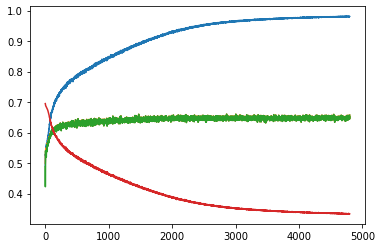

epoch: 0
train_acc: 0.9805322281601047
test_acc: 0.6547437295528898
f1: 0.6545509629961198

epoch: 1
train_acc: 0.9806412913076671
test_acc: 0.6458015267175573
f1: 0.6453331389397869

epoch: 2
train_acc: 0.9811320754716981
test_acc: 0.6440567066521266
f1: 0.6438364146532342

epoch: 3
train_acc: 0.9806412913076671
test_acc: 0.6458015267175573
f1: 0.6457241046861263

epoch: 4
train_acc: 0.9811866070454793
test_acc: 0.6449291166848419
f1: 0.6447976331550068

epoch: 5
train_acc: 0.9807503544552296
test_acc: 0.6468920392584515
f1: 0.6467924804423281

epoch: 6
train_acc: 0.9804776965863234
test_acc: 0.6471101417666303
f1: 0.6467016469333617

epoch: 7
train_acc: 0.9806412913076671
test_acc: 0.6545256270447111
f1: 0.6541688756511609

epoch: 8
train_acc: 0.9804776965863234
test_acc: 0.6482006543075245
f1: 0.6479607767410557

epoch: 9
train_acc: 0.9810775438979169
test_acc: 0.6464558342420937
f1: 0.6461773883783448

epoch: 10
train_acc: 0.9806958228814484
test_acc: 0.650381679389313
f1: 0.650269

epoch: 90
train_acc: 0.9815683280619478
test_acc: 0.6396946564885496
f1: 0.6393757393363998

epoch: 91
train_acc: 0.9815137964881666
test_acc: 0.6399127589967285
f1: 0.6396291599090976

epoch: 92
train_acc: 0.9808048860290108
test_acc: 0.639258451472192
f1: 0.6388292541559868

epoch: 93
train_acc: 0.9811866070454793
test_acc: 0.6482006543075245
f1: 0.6477877758816578

epoch: 94
train_acc: 0.981622859635729
test_acc: 0.6523446019629225
f1: 0.6522861975692479

epoch: 95
train_acc: 0.9815683280619478
test_acc: 0.6475463467829881
f1: 0.6474928104539324

epoch: 96
train_acc: 0.9806412913076671
test_acc: 0.6455834242093784
f1: 0.64544113516148

epoch: 97
train_acc: 0.9806958228814484
test_acc: 0.6514721919302072
f1: 0.6512024198847041

epoch: 98
train_acc: 0.9811320754716981
test_acc: 0.6495092693565976
f1: 0.6490398223850221

epoch: 99
train_acc: 0.9809139491765733
test_acc: 0.6423118865866958
f1: 0.6421247664339967

epoch: 100
train_acc: 0.9812411386192605
test_acc: 0.6540894220283533
f1: 

epoch: 178
train_acc: 0.9816773912095103
test_acc: 0.646237731733915
f1: 0.6460187895634473

epoch: 179
train_acc: 0.9812411386192605
test_acc: 0.6529989094874591
f1: 0.6524857098792067

epoch: 180
train_acc: 0.9815137964881666
test_acc: 0.6477644492911668
f1: 0.647230879373861

epoch: 181
train_acc: 0.9807503544552296
test_acc: 0.6381679389312978
f1: 0.6378630052961337

epoch: 182
train_acc: 0.9811320754716981
test_acc: 0.6414394765539804
f1: 0.6413139806713632

epoch: 183
train_acc: 0.9810775438979169
test_acc: 0.6381679389312978
f1: 0.638091985479475

epoch: 184
train_acc: 0.9812411386192605
test_acc: 0.6486368593238823
f1: 0.6484883263548683

epoch: 185
train_acc: 0.9814047333406042
test_acc: 0.6460196292257361
f1: 0.6457012418410333

epoch: 186
train_acc: 0.981840985930854
test_acc: 0.6464558342420937
f1: 0.6458814366473341

epoch: 187
train_acc: 0.9816773912095103
test_acc: 0.6412213740458015
f1: 0.64077692764979

epoch: 188
train_acc: 0.9812956701930418
test_acc: 0.6529989094874

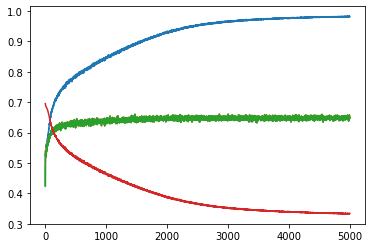

epoch: 0
train_acc: 0.9820591122259789
test_acc: 0.6556161395856053
f1: 0.655439953197578

epoch: 1
train_acc: 0.9815683280619478
test_acc: 0.6412213740458015
f1: 0.6410848239175406

epoch: 2
train_acc: 0.9817864543570728
test_acc: 0.6534351145038167
f1: 0.6532886099179924

epoch: 3
train_acc: 0.9809139491765733
test_acc: 0.6523446019629225
f1: 0.6521119944873724

epoch: 4
train_acc: 0.9811320754716981
test_acc: 0.6431842966194111
f1: 0.6427597701325238

epoch: 5
train_acc: 0.9806958228814484
test_acc: 0.6547437295528898
f1: 0.6542207319187752

epoch: 6
train_acc: 0.9809139491765733
test_acc: 0.651690294438386
f1: 0.65145279631461

epoch: 7
train_acc: 0.981622859635729
test_acc: 0.6551799345692475
f1: 0.6551356377482578

epoch: 8
train_acc: 0.9824953648162286
test_acc: 0.6486368593238823
f1: 0.6485243311630753

epoch: 9
train_acc: 0.9814047333406042
test_acc: 0.6536532170119956
f1: 0.6535249640357191

epoch: 10
train_acc: 0.9820045806521976
test_acc: 0.6492911668484188
f1: 0.6489290101

epoch: 90
train_acc: 0.980859417602792
test_acc: 0.6414394765539804
f1: 0.640738537728292

epoch: 91
train_acc: 0.9815137964881666
test_acc: 0.6477644492911668
f1: 0.6473510589267681

epoch: 92
train_acc: 0.9819500490784164
test_acc: 0.6471101417666303
f1: 0.6468649753764998

epoch: 93
train_acc: 0.9820045806521976
test_acc: 0.6475463467829881
f1: 0.647533359801641

epoch: 94
train_acc: 0.9821136437997601
test_acc: 0.6453653217011995
f1: 0.6453428663552621

epoch: 95
train_acc: 0.9824953648162286
test_acc: 0.6412213740458015
f1: 0.6408882928067674

epoch: 96
train_acc: 0.9810230123241357
test_acc: 0.6464558342420937
f1: 0.6459942918781214

epoch: 97
train_acc: 0.9802595702911986
test_acc: 0.6482006543075245
f1: 0.6479424495688153

epoch: 98
train_acc: 0.9808048860290108
test_acc: 0.6501635768811341
f1: 0.6499470644018307

epoch: 99
train_acc: 0.9811320754716981
test_acc: 0.6482006543075245
f1: 0.6481659821954486

epoch: 100
train_acc: 0.9820045806521976
test_acc: 0.6449291166848419
f1:

epoch: 178
train_acc: 0.9817864543570728
test_acc: 0.6482006543075245
f1: 0.6477990339190951

epoch: 179
train_acc: 0.9821136437997601
test_acc: 0.6438386041439477
f1: 0.6434975135103655

epoch: 180
train_acc: 0.9821681753735413
test_acc: 0.646237731733915
f1: 0.6460766495314169

epoch: 181
train_acc: 0.9819500490784164
test_acc: 0.6510359869138496
f1: 0.6508847086635453

epoch: 182
train_acc: 0.9828770858326972
test_acc: 0.6375136314067612
f1: 0.6373155316045997

epoch: 183
train_acc: 0.9817319227832916
test_acc: 0.6492911668484188
f1: 0.6489073731597719

epoch: 184
train_acc: 0.9820591122259789
test_acc: 0.6482006543075245
f1: 0.647831996138905

epoch: 185
train_acc: 0.9821136437997601
test_acc: 0.6514721919302072
f1: 0.6510687464768308

epoch: 186
train_acc: 0.981840985930854
test_acc: 0.6468920392584515
f1: 0.646669123185485

epoch: 187
train_acc: 0.9821136437997601
test_acc: 0.6464558342420937
f1: 0.6459942918781214

epoch: 188
train_acc: 0.9814592649143854
test_acc: 0.65365321701

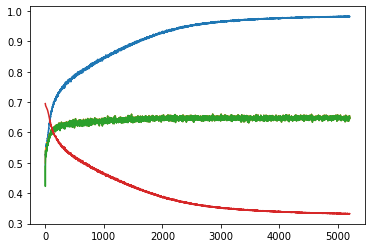

epoch: 0
train_acc: 0.9820045806521976
test_acc: 0.6490730643402399
f1: 0.6488061571541509

epoch: 1
train_acc: 0.9820045806521976
test_acc: 0.6508178844056707
f1: 0.6507445863487883

epoch: 2
train_acc: 0.9820591122259789
test_acc: 0.6536532170119956
f1: 0.6535319959282998

epoch: 3
train_acc: 0.9820591122259789
test_acc: 0.6396946564885496
f1: 0.6394254297914058

epoch: 4
train_acc: 0.9823317700948849
test_acc: 0.6468920392584515
f1: 0.6466864356110937

epoch: 5
train_acc: 0.9829316174064784
test_acc: 0.6449291166848419
f1: 0.6448256544914901

epoch: 6
train_acc: 0.9818955175046352
test_acc: 0.6444929116684842
f1: 0.6443387969509868

epoch: 7
train_acc: 0.9822227069473225
test_acc: 0.6468920392584515
f1: 0.6467924804423281

epoch: 8
train_acc: 0.9823317700948849
test_acc: 0.648854961832061
f1: 0.648790184007147

epoch: 9
train_acc: 0.9820045806521976
test_acc: 0.6497273718647765
f1: 0.6495276286104166

epoch: 10
train_acc: 0.9821681753735413
test_acc: 0.650381679389313
f1: 0.64999360

epoch: 90
train_acc: 0.9820045806521976
test_acc: 0.6458015267175573
f1: 0.6455823145814046

epoch: 91
train_acc: 0.982604427963791
test_acc: 0.6492911668484188
f1: 0.6491157578274726

epoch: 92
train_acc: 0.9824408332424474
test_acc: 0.6479825517993457
f1: 0.6478799793300153

epoch: 93
train_acc: 0.9827134911113534
test_acc: 0.6492911668484188
f1: 0.6491157578274726

epoch: 94
train_acc: 0.982604427963791
test_acc: 0.6453653217011995
f1: 0.6452266638791636

epoch: 95
train_acc: 0.9817864543570728
test_acc: 0.6449291166848419
f1: 0.6447093646173194

epoch: 96
train_acc: 0.9817864543570728
test_acc: 0.6468920392584515
f1: 0.6465538728556531

epoch: 97
train_acc: 0.9816773912095103
test_acc: 0.651690294438386
f1: 0.6514790128153233

epoch: 98
train_acc: 0.9823317700948849
test_acc: 0.6540894220283533
f1: 0.654100980626522

epoch: 99
train_acc: 0.9819500490784164
test_acc: 0.6536532170119956
f1: 0.6534720299373091

epoch: 100
train_acc: 0.9824408332424474
test_acc: 0.6486368593238823
f1: 

epoch: 179
train_acc: 0.982822554258916
test_acc: 0.6473282442748092
f1: 0.6471143166702428

epoch: 180
train_acc: 0.9827680226851347
test_acc: 0.6464558342420937
f1: 0.6461963488847177

epoch: 181
train_acc: 0.9824953648162286
test_acc: 0.6536532170119956
f1: 0.6534302410582387

epoch: 182
train_acc: 0.9824953648162286
test_acc: 0.6499454743729552
f1: 0.6493504294984783

epoch: 183
train_acc: 0.9816773912095103
test_acc: 0.6477644492911668
f1: 0.6474476312835912

epoch: 184
train_acc: 0.9823863016686661
test_acc: 0.6477644492911668
f1: 0.6475420839682262

epoch: 185
train_acc: 0.9824408332424474
test_acc: 0.6477644492911668
f1: 0.6476376082586568

epoch: 186
train_acc: 0.982604427963791
test_acc: 0.6473282442748092
f1: 0.6471715255327561

epoch: 187
train_acc: 0.9824408332424474
test_acc: 0.6508178844056707
f1: 0.6506702734290156

epoch: 188
train_acc: 0.9828770858326972
test_acc: 0.6442748091603053
f1: 0.6441394211607955

epoch: 189
train_acc: 0.9829861489802596
test_acc: 0.646455834

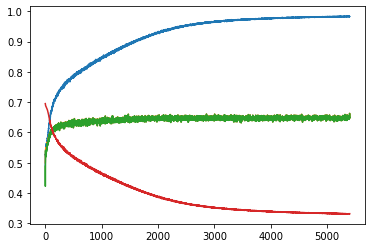

epoch: 0
train_acc: 0.9820591122259789
test_acc: 0.6442748091603053
f1: 0.6442727093725806

epoch: 1
train_acc: 0.9826589595375722
test_acc: 0.6396946564885496
f1: 0.6396511158741386

epoch: 2
train_acc: 0.9836950594394154
test_acc: 0.6431842966194111
f1: 0.6429176774447578

epoch: 3
train_acc: 0.982604427963791
test_acc: 0.6427480916030535
f1: 0.642499894726024

epoch: 4
train_acc: 0.9833133384229469
test_acc: 0.6536532170119956
f1: 0.6531347929737095

epoch: 5
train_acc: 0.982822554258916
test_acc: 0.6466739367502726
f1: 0.646419263960988

epoch: 6
train_acc: 0.9830406805540408
test_acc: 0.6431842966194111
f1: 0.6429455602141413

epoch: 7
train_acc: 0.9820591122259789
test_acc: 0.6492911668484188
f1: 0.6489290101307237

epoch: 8
train_acc: 0.9820591122259789
test_acc: 0.6475463467829881
f1: 0.6473453597972811

epoch: 9
train_acc: 0.981840985930854
test_acc: 0.6534351145038167
f1: 0.6532416173094342

epoch: 10
train_acc: 0.9829316174064784
test_acc: 0.6466739367502726
f1: 0.6464099250

epoch: 90
train_acc: 0.9834224015705093
test_acc: 0.6553980370774264
f1: 0.6551027889571769

epoch: 91
train_acc: 0.9822227069473225
test_acc: 0.651690294438386
f1: 0.6511244011880274

epoch: 92
train_acc: 0.9829861489802596
test_acc: 0.6466739367502726
f1: 0.6461194575798946

epoch: 93
train_acc: 0.9832042752753845
test_acc: 0.6455834242093784
f1: 0.6454181241212582

epoch: 94
train_acc: 0.9833133384229469
test_acc: 0.6486368593238823
f1: 0.6486305366988904

epoch: 95
train_acc: 0.9830406805540408
test_acc: 0.6464558342420937
f1: 0.6462987278222618

epoch: 96
train_acc: 0.9826589595375722
test_acc: 0.651690294438386
f1: 0.6516111064096383

epoch: 97
train_acc: 0.982604427963791
test_acc: 0.6534351145038167
f1: 0.6530929232716925

epoch: 98
train_acc: 0.9830406805540408
test_acc: 0.6547437295528898
f1: 0.6540045412001407

epoch: 99
train_acc: 0.9827680226851347
test_acc: 0.6536532170119956
f1: 0.6528445165490037

epoch: 100
train_acc: 0.9829861489802596
test_acc: 0.64340239912759
f1: 0

epoch: 178
train_acc: 0.9834224015705093
test_acc: 0.6466739367502726
f1: 0.6465904773454799

epoch: 179
train_acc: 0.9827134911113534
test_acc: 0.6490730643402399
f1: 0.6488601951282749

epoch: 180
train_acc: 0.9832588068491657
test_acc: 0.6451472191930208
f1: 0.6446719296953523

epoch: 181
train_acc: 0.9834769331442905
test_acc: 0.653217011995638
f1: 0.652722534149255

epoch: 182
train_acc: 0.9829861489802596
test_acc: 0.6471101417666303
f1: 0.6464345079716557

epoch: 183
train_acc: 0.9827680226851347
test_acc: 0.6595419847328244
f1: 0.6593185127028365

epoch: 184
train_acc: 0.9832042752753845
test_acc: 0.648854961832061
f1: 0.6488278786592447

epoch: 185
train_acc: 0.9827134911113534
test_acc: 0.6460196292257361
f1: 0.6459328447423651

epoch: 186
train_acc: 0.9824953648162286
test_acc: 0.6556161395856053
f1: 0.6554705569921397

epoch: 187
train_acc: 0.9829861489802596
test_acc: 0.6560523446019629
f1: 0.6557229508915164

epoch: 188
train_acc: 0.9836950594394154
test_acc: 0.6482006543

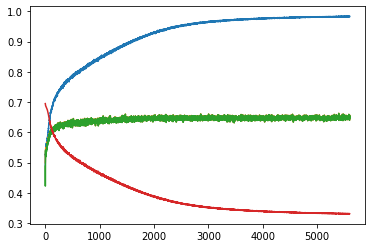

epoch: 0
train_acc: 0.9838041225869779
test_acc: 0.6425299890948746
f1: 0.6423043192717788

epoch: 1
train_acc: 0.9824408332424474
test_acc: 0.6416575790621593
f1: 0.6414904479576783

epoch: 2
train_acc: 0.983585996291853
test_acc: 0.6510359869138496
f1: 0.6509138498018133

epoch: 3
train_acc: 0.9831497437016032
test_acc: 0.6519083969465649
f1: 0.6517181639235508

epoch: 4
train_acc: 0.9834769331442905
test_acc: 0.6490730643402399
f1: 0.6487369866737158

epoch: 5
train_acc: 0.9838041225869779
test_acc: 0.6438386041439477
f1: 0.6431638308134692

epoch: 6
train_acc: 0.9831497437016032
test_acc: 0.650381679389313
f1: 0.6500571023521263

epoch: 7
train_acc: 0.9834769331442905
test_acc: 0.6514721919302072
f1: 0.6512478118457591

epoch: 8
train_acc: 0.9834769331442905
test_acc: 0.6444929116684842
f1: 0.6443231369274226

epoch: 9
train_acc: 0.9835314647180717
test_acc: 0.6512540894220283
f1: 0.6509601841281

epoch: 10
train_acc: 0.9832588068491657
test_acc: 0.6464558342420937
f1: 0.6461963488

epoch: 89
train_acc: 0.9837495910131966
test_acc: 0.6499454743729552
f1: 0.6496102322009409

epoch: 90
train_acc: 0.9835314647180717
test_acc: 0.6497273718647765
f1: 0.6492030714834869

epoch: 91
train_acc: 0.9835314647180717
test_acc: 0.6486368593238823
f1: 0.6481419969822559

epoch: 92
train_acc: 0.9834224015705093
test_acc: 0.6525627044711014
f1: 0.652316817864087

epoch: 93
train_acc: 0.9841313120296652
test_acc: 0.650381679389313
f1: 0.6502831044774872

epoch: 94
train_acc: 0.983095212127822
test_acc: 0.6453653217011995
f1: 0.6453522543548691

epoch: 95
train_acc: 0.9836950594394154
test_acc: 0.6510359869138496
f1: 0.6509938168272529

epoch: 96
train_acc: 0.9830406805540408
test_acc: 0.644711014176663
f1: 0.6445531324012737

epoch: 97
train_acc: 0.9829861489802596
test_acc: 0.6471101417666303
f1: 0.6465819238233387

epoch: 98
train_acc: 0.9835314647180717
test_acc: 0.6497273718647765
f1: 0.6492759915065939

epoch: 99
train_acc: 0.9829861489802596
test_acc: 0.641875681570338
f1: 0.

epoch: 177
train_acc: 0.9841313120296652
test_acc: 0.6510359869138496
f1: 0.6508534306673139

epoch: 178
train_acc: 0.983585996291853
test_acc: 0.6466739367502726
f1: 0.6463197728495148

epoch: 179
train_acc: 0.9839677173083216
test_acc: 0.6479825517993457
f1: 0.6477195179681169

epoch: 180
train_acc: 0.9834769331442905
test_acc: 0.650381679389313
f1: 0.6497052822017062

epoch: 181
train_acc: 0.9836950594394154
test_acc: 0.6484187568157034
f1: 0.6482348313973187

epoch: 182
train_acc: 0.9839131857345403
test_acc: 0.6514721919302072
f1: 0.6513285789809709

epoch: 183
train_acc: 0.984076780455884
test_acc: 0.6529989094874591
f1: 0.6527064746390288

epoch: 184
train_acc: 0.983585996291853
test_acc: 0.646237731733915
f1: 0.645850596557929

epoch: 185
train_acc: 0.9841313120296652
test_acc: 0.6471101417666303
f1: 0.6467016469333617

epoch: 186
train_acc: 0.9839131857345403
test_acc: 0.6499454743729552
f1: 0.6496102322009409

epoch: 187
train_acc: 0.984076780455884
test_acc: 0.65256270447110

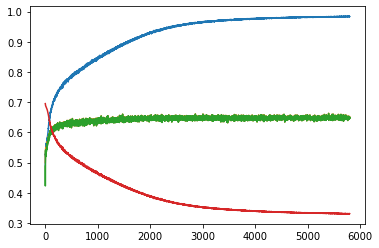

epoch: 0
train_acc: 0.9834769331442905
test_acc: 0.6536532170119956
f1: 0.6530969388491029

epoch: 1
train_acc: 0.9839131857345403
test_acc: 0.644711014176663
f1: 0.6446041024866387

epoch: 2
train_acc: 0.9833678699967281
test_acc: 0.6484187568157034
f1: 0.6483293778951976

epoch: 3
train_acc: 0.9836950594394154
test_acc: 0.6497273718647765
f1: 0.6497003559793461

epoch: 4
train_acc: 0.9841313120296652
test_acc: 0.6444929116684842
f1: 0.6442640383658242

epoch: 5
train_acc: 0.983095212127822
test_acc: 0.6482006543075245
f1: 0.6477413897590436

epoch: 6
train_acc: 0.9838041225869779
test_acc: 0.6455834242093784
f1: 0.6451326304111686

epoch: 7
train_acc: 0.9838586541607591
test_acc: 0.6492911668484188
f1: 0.6490475157017378

epoch: 8
train_acc: 0.9842403751772276
test_acc: 0.650381679389313
f1: 0.650169603971799

epoch: 9
train_acc: 0.983585996291853
test_acc: 0.6492911668484188
f1: 0.6492911668484188

epoch: 10
train_acc: 0.9839677173083216
test_acc: 0.646237731733915
f1: 0.64611391523

epoch: 90
train_acc: 0.98434943832479
test_acc: 0.6549618320610687
f1: 0.6547396985857263

epoch: 91
train_acc: 0.9836950594394154
test_acc: 0.6492911668484188
f1: 0.6490741144377454

epoch: 92
train_acc: 0.9841858436034464
test_acc: 0.6551799345692475
f1: 0.655101539908352

epoch: 93
train_acc: 0.983585996291853
test_acc: 0.6543075245365322
f1: 0.6543013039526637

epoch: 94
train_acc: 0.9845130330461337
test_acc: 0.6547437295528898
f1: 0.6546194017792282

epoch: 95
train_acc: 0.984076780455884
test_acc: 0.6490730643402399
f1: 0.6486724399106164

epoch: 96
train_acc: 0.9840222488821028
test_acc: 0.6475463467829881
f1: 0.6471930573609976

epoch: 97
train_acc: 0.9837495910131966
test_acc: 0.6482006543075245
f1: 0.647386940457221

epoch: 98
train_acc: 0.9834769331442905
test_acc: 0.6538713195201745
f1: 0.6532429128557973

epoch: 99
train_acc: 0.9840222488821028
test_acc: 0.6547437295528898
f1: 0.6543495788555038

epoch: 100
train_acc: 0.9838041225869779
test_acc: 0.6379498364231189
f1: 0.

epoch: 178
train_acc: 0.98434943832479
test_acc: 0.6505997818974918
f1: 0.6505353259499688

epoch: 179
train_acc: 0.98434943832479
test_acc: 0.6527808069792803
f1: 0.6523216485173282

epoch: 180
train_acc: 0.98434943832479
test_acc: 0.6438386041439477
f1: 0.6432599543769875

epoch: 181
train_acc: 0.9842403751772276
test_acc: 0.6425299890948746
f1: 0.641949213241814

epoch: 182
train_acc: 0.9844039698985713
test_acc: 0.6564885496183206
f1: 0.6562967572450338

epoch: 183
train_acc: 0.9838041225869779
test_acc: 0.6521264994547438
f1: 0.6519868372815757

epoch: 184
train_acc: 0.9845675646199149
test_acc: 0.6556161395856053
f1: 0.6554072393458956

epoch: 185
train_acc: 0.9844039698985713
test_acc: 0.644711014176663
f1: 0.6444502482006199

epoch: 186
train_acc: 0.9841313120296652
test_acc: 0.6490730643402399
f1: 0.6485665051079181

epoch: 187
train_acc: 0.9841858436034464
test_acc: 0.6495092693565976
f1: 0.6491526595254422

epoch: 188
train_acc: 0.9844039698985713
test_acc: 0.652126499454743

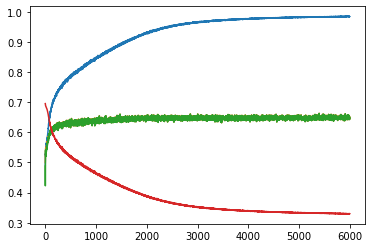

epoch: 0
train_acc: 0.9834769331442905
test_acc: 0.6444929116684842
f1: 0.6439479615437126

epoch: 1
train_acc: 0.9842949067510088
test_acc: 0.6499454743729552
f1: 0.6497899186642384

epoch: 2
train_acc: 0.98434943832479
test_acc: 0.6466739367502726
f1: 0.6466466853589917

epoch: 3
train_acc: 0.9834769331442905
test_acc: 0.6438386041439477
f1: 0.6438231743960039

epoch: 4
train_acc: 0.9838586541607591
test_acc: 0.6486368593238823
f1: 0.6483505072076011

epoch: 5
train_acc: 0.98434943832479
test_acc: 0.6490730643402399
f1: 0.6485909923446505

epoch: 6
train_acc: 0.9844585014723525
test_acc: 0.6458015267175573
f1: 0.6453801141168819

epoch: 7
train_acc: 0.9842949067510088
test_acc: 0.6482006543075245
f1: 0.6480365748969782

epoch: 8
train_acc: 0.9841858436034464
test_acc: 0.6451472191930208
f1: 0.6449405995918774

epoch: 9
train_acc: 0.9844585014723525
test_acc: 0.648854961832061
f1: 0.6486110076366902

epoch: 10
train_acc: 0.9846220961936961
test_acc: 0.6521264994547438
f1: 0.6518619146

epoch: 90
train_acc: 0.9845675646199149
test_acc: 0.6512540894220283
f1: 0.6511748022222992

epoch: 91
train_acc: 0.98434943832479
test_acc: 0.6455834242093784
f1: 0.6454834964291433

epoch: 92
train_acc: 0.9842949067510088
test_acc: 0.6495092693565976
f1: 0.6490865757236158

epoch: 93
train_acc: 0.9847856909150398
test_acc: 0.651690294438386
f1: 0.6511997325764514

epoch: 94
train_acc: 0.9847311593412585
test_acc: 0.6497273718647765
f1: 0.6493656655907603

epoch: 95
train_acc: 0.98434943832479
test_acc: 0.6508178844056707
f1: 0.6505038128080677

epoch: 96
train_acc: 0.9842949067510088
test_acc: 0.6453653217011995
f1: 0.645145839599362

epoch: 97
train_acc: 0.984076780455884
test_acc: 0.6534351145038167
f1: 0.6532959777055948

epoch: 98
train_acc: 0.9842403751772276
test_acc: 0.6477644492911668
f1: 0.6476155475252092

epoch: 99
train_acc: 0.9844585014723525
test_acc: 0.6514721919302072
f1: 0.6514637633232685

epoch: 100
train_acc: 0.9846220961936961
test_acc: 0.6527808069792803
f1: 0.6

epoch: 178
train_acc: 0.9845130330461337
test_acc: 0.6521264994547438
f1: 0.6517069622147897

epoch: 179
train_acc: 0.9850583487839459
test_acc: 0.6606324972737186
f1: 0.6600361398044128

epoch: 180
train_acc: 0.9846766277674773
test_acc: 0.6453653217011995
f1: 0.6448217088773477

epoch: 181
train_acc: 0.9848402224888211
test_acc: 0.6444929116684842
f1: 0.6439479615437126

epoch: 182
train_acc: 0.9847311593412585
test_acc: 0.6512540894220283
f1: 0.6508220713142944

epoch: 183
train_acc: 0.9848947540626023
test_acc: 0.6512540894220283
f1: 0.6511213577168069

epoch: 184
train_acc: 0.9847856909150398
test_acc: 0.6451472191930208
f1: 0.6450665435995501

epoch: 185
train_acc: 0.9847311593412585
test_acc: 0.6492911668484188
f1: 0.6491466551948691

epoch: 186
train_acc: 0.98434943832479
test_acc: 0.6390403489640131
f1: 0.6388124761408138

epoch: 187
train_acc: 0.9845675646199149
test_acc: 0.6512540894220283
f1: 0.65081050832459

epoch: 188
train_acc: 0.9847856909150398
test_acc: 0.64711014176

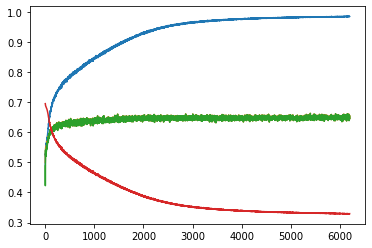

epoch: 0
train_acc: 0.9851674119315084
test_acc: 0.6577971646673937
f1: 0.6572024050958845

epoch: 1
train_acc: 0.9851674119315084
test_acc: 0.6538713195201745
f1: 0.6536172767921326

epoch: 2
train_acc: 0.9850038172101647
test_acc: 0.644711014176663
f1: 0.6445830735934066

epoch: 3
train_acc: 0.9844585014723525
test_acc: 0.6410032715376227
f1: 0.6409370452644497

epoch: 4
train_acc: 0.9844039698985713
test_acc: 0.6508178844056707
f1: 0.6507505412586457

epoch: 5
train_acc: 0.9845130330461337
test_acc: 0.6458015267175573
f1: 0.6455273653897118

epoch: 6
train_acc: 0.9848947540626023
test_acc: 0.6425299890948746
f1: 0.642295350621364

epoch: 7
train_acc: 0.9852764750790708
test_acc: 0.6475463467829881
f1: 0.6470682410711505

epoch: 8
train_acc: 0.9844585014723525
test_acc: 0.6466739367502726
f1: 0.6462761759081338

epoch: 9
train_acc: 0.9846766277674773
test_acc: 0.6482006543075245
f1: 0.6479872558992588

epoch: 10
train_acc: 0.9846766277674773
test_acc: 0.6477644492911668
f1: 0.6475059

epoch: 90
train_acc: 0.9850038172101647
test_acc: 0.6501635768811341
f1: 0.6501461225867112

epoch: 91
train_acc: 0.9849492856363835
test_acc: 0.650381679389313
f1: 0.6503313379205949

epoch: 92
train_acc: 0.9854400698004144
test_acc: 0.6440567066521266
f1: 0.6438275525233284

epoch: 93
train_acc: 0.9847856909150398
test_acc: 0.6519083969465649
f1: 0.6513363661225274

epoch: 94
train_acc: 0.9851128803577271
test_acc: 0.651690294438386
f1: 0.6514790128153233

epoch: 95
train_acc: 0.9858763223906641
test_acc: 0.6492911668484188
f1: 0.6488739060960258

epoch: 96
train_acc: 0.9845675646199149
test_acc: 0.6407851690294438
f1: 0.6406333168879379

epoch: 97
train_acc: 0.9844039698985713
test_acc: 0.6505997818974918
f1: 0.6503660070067568

epoch: 98
train_acc: 0.9847311593412585
test_acc: 0.6484187568157034
f1: 0.6482738856804287

epoch: 99
train_acc: 0.9854400698004144
test_acc: 0.6438386041439477
f1: 0.643349341515733

epoch: 100
train_acc: 0.9850583487839459
test_acc: 0.6501635768811341
f1:

epoch: 178
train_acc: 0.985331006652852
test_acc: 0.6519083969465649
f1: 0.6516482965781378

epoch: 179
train_acc: 0.9851128803577271
test_acc: 0.6545256270447111
f1: 0.6543832722815129

epoch: 180
train_acc: 0.9855491329479769
test_acc: 0.6490730643402399
f1: 0.6490709928758321

epoch: 181
train_acc: 0.9849492856363835
test_acc: 0.6455834242093784
f1: 0.6455813321461947

epoch: 182
train_acc: 0.985331006652852
test_acc: 0.6527808069792803
f1: 0.6526071433217265

epoch: 183
train_acc: 0.9846766277674773
test_acc: 0.6471101417666303
f1: 0.6467128719872594

epoch: 184
train_acc: 0.9854946013741956
test_acc: 0.6540894220283533
f1: 0.653631994063117

epoch: 185
train_acc: 0.985331006652852
test_acc: 0.6497273718647765
f1: 0.6495600968745034

epoch: 186
train_acc: 0.9852764750790708
test_acc: 0.6543075245365322
f1: 0.6543134484858781

epoch: 187
train_acc: 0.9852764750790708
test_acc: 0.651690294438386
f1: 0.6516049002178417

epoch: 188
train_acc: 0.9846766277674773
test_acc: 0.647546346782

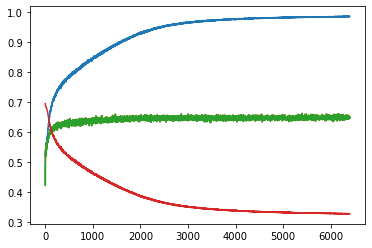

epoch: 0
train_acc: 0.9848402224888211
test_acc: 0.6486368593238823
f1: 0.6486388998630994

epoch: 1
train_acc: 0.9850038172101647
test_acc: 0.6497273718647765
f1: 0.6497495786840307

epoch: 2
train_acc: 0.9852219435052896
test_acc: 0.6514721919302072
f1: 0.6512209776602833

epoch: 3
train_acc: 0.9852219435052896
test_acc: 0.6479825517993457
f1: 0.6470815041386533

epoch: 4
train_acc: 0.9844585014723525
test_acc: 0.6471101417666303
f1: 0.6461576348298922

epoch: 5
train_acc: 0.9852764750790708
test_acc: 0.650381679389313
f1: 0.6499713606561048

epoch: 6
train_acc: 0.9854946013741956
test_acc: 0.6540894220283533
f1: 0.6540675190894499

epoch: 7
train_acc: 0.9844039698985713
test_acc: 0.6466739367502726
f1: 0.646737011069472

epoch: 8
train_acc: 0.9845675646199149
test_acc: 0.644711014176663
f1: 0.6446041024866387

epoch: 9
train_acc: 0.9855491329479769
test_acc: 0.6499454743729552
f1: 0.6493235718970326

epoch: 10
train_acc: 0.9852219435052896
test_acc: 0.6484187568157034
f1: 0.64736800

epoch: 90
train_acc: 0.9858763223906641
test_acc: 0.6612868047982552
f1: 0.6610976914295477

epoch: 91
train_acc: 0.9858763223906641
test_acc: 0.6508178844056707
f1: 0.6506392432357961

epoch: 92
train_acc: 0.9857127276693205
test_acc: 0.6538713195201745
f1: 0.6531155792131202

epoch: 93
train_acc: 0.9851674119315084
test_acc: 0.6484187568157034
f1: 0.6476132266090334

epoch: 94
train_acc: 0.9853855382266332
test_acc: 0.6551799345692475
f1: 0.6548796282932854

epoch: 95
train_acc: 0.9856581960955393
test_acc: 0.6564885496183206
f1: 0.6564546943321956

epoch: 96
train_acc: 0.9850583487839459
test_acc: 0.6499454743729552
f1: 0.6499109742242375

epoch: 97
train_acc: 0.9853855382266332
test_acc: 0.6505997818974918
f1: 0.6506392906623164

epoch: 98
train_acc: 0.985331006652852
test_acc: 0.6466739367502726
f1: 0.6465357905807165

epoch: 99
train_acc: 0.9859853855382267
test_acc: 0.6534351145038167
f1: 0.6528460015408611

epoch: 100
train_acc: 0.98434943832479
test_acc: 0.6525627044711014
f1:

epoch: 178
train_acc: 0.9850583487839459
test_acc: 0.6501635768811341
f1: 0.6501365946393967

epoch: 179
train_acc: 0.9857672592431017
test_acc: 0.6536532170119956
f1: 0.6534388642581714

epoch: 180
train_acc: 0.9857672592431017
test_acc: 0.6455834242093784
f1: 0.6452847399675812

epoch: 181
train_acc: 0.9856036645217581
test_acc: 0.6556161395856053
f1: 0.6552552522649292

epoch: 182
train_acc: 0.9856581960955393
test_acc: 0.6562704471101418
f1: 0.6559361753600158

epoch: 183
train_acc: 0.985331006652852
test_acc: 0.6582333696837513
f1: 0.658073969537238

epoch: 184
train_acc: 0.9858763223906641
test_acc: 0.6497273718647765
f1: 0.6496741668248859

epoch: 185
train_acc: 0.9856036645217581
test_acc: 0.6427480916030535
f1: 0.6427205374185361

epoch: 186
train_acc: 0.9853855382266332
test_acc: 0.6567066521264995
f1: 0.656542710137278

epoch: 187
train_acc: 0.9852219435052896
test_acc: 0.6479825517993457
f1: 0.6479056065045614

epoch: 188
train_acc: 0.9857127276693205
test_acc: 0.6436205016

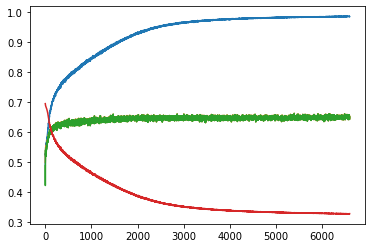

epoch: 0
train_acc: 0.9862035118333515
test_acc: 0.6473282442748092
f1: 0.6470008325036735

epoch: 1
train_acc: 0.9856036645217581
test_acc: 0.6466739367502726
f1: 0.6462535621116676

epoch: 2
train_acc: 0.9852764750790708
test_acc: 0.6492911668484188
f1: 0.6489906864830003

epoch: 3
train_acc: 0.9862035118333515
test_acc: 0.6527808069792803
f1: 0.6525305359419092

epoch: 4
train_acc: 0.9852219435052896
test_acc: 0.6399127589967285
f1: 0.6397117118803497

epoch: 5
train_acc: 0.9858763223906641
test_acc: 0.646237731733915
f1: 0.6460526653389895

epoch: 6
train_acc: 0.9855491329479769
test_acc: 0.6473282442748092
f1: 0.6470210999052767

epoch: 7
train_acc: 0.9854946013741956
test_acc: 0.6505997818974918
f1: 0.6504329235323503

epoch: 8
train_acc: 0.9855491329479769
test_acc: 0.6466739367502726
f1: 0.646419263960988

epoch: 9
train_acc: 0.9853855382266332
test_acc: 0.6473282442748092
f1: 0.6471715255327561

epoch: 10
train_acc: 0.9850038172101647
test_acc: 0.653217011995638
f1: 0.65314719

epoch: 90
train_acc: 0.9857672592431017
test_acc: 0.6495092693565976
f1: 0.6494233404195816

epoch: 91
train_acc: 0.9859308539644455
test_acc: 0.6623773173391494
f1: 0.6622724718467795

epoch: 92
train_acc: 0.9854400698004144
test_acc: 0.6512540894220283
f1: 0.6509698702824049

epoch: 93
train_acc: 0.9858217908168829
test_acc: 0.6562704471101418
f1: 0.6559855592533413

epoch: 94
train_acc: 0.9858763223906641
test_acc: 0.6455834242093784
f1: 0.64534176206089

epoch: 95
train_acc: 0.9854400698004144
test_acc: 0.6497273718647765
f1: 0.6494840237667855

epoch: 96
train_acc: 0.9856036645217581
test_acc: 0.6486368593238823
f1: 0.6484651101157142

epoch: 97
train_acc: 0.9854946013741956
test_acc: 0.6545256270447111
f1: 0.65437586157691

epoch: 98
train_acc: 0.9856581960955393
test_acc: 0.644711014176663
f1: 0.6445531324012737

epoch: 99
train_acc: 0.9858217908168829
test_acc: 0.6495092693565976
f1: 0.6492236282325358

epoch: 100
train_acc: 0.9857127276693205
test_acc: 0.6473282442748092
f1: 0

epoch: 178
train_acc: 0.9846766277674773
test_acc: 0.648854961832061
f1: 0.6488703387388683

epoch: 179
train_acc: 0.9852764750790708
test_acc: 0.6440567066521266
f1: 0.6440524705633097

epoch: 180
train_acc: 0.9854400698004144
test_acc: 0.6479825517993457
f1: 0.6478732361503244

epoch: 181
train_acc: 0.9860944486857891
test_acc: 0.6575790621592148
f1: 0.6573231990148348

epoch: 182
train_acc: 0.9850038172101647
test_acc: 0.6458015267175573
f1: 0.6453088328871512

epoch: 183
train_acc: 0.9855491329479769
test_acc: 0.6499454743729552
f1: 0.6495893083623739

epoch: 184
train_acc: 0.9858217908168829
test_acc: 0.6482006543075245
f1: 0.6480365748969782

epoch: 185
train_acc: 0.9856036645217581
test_acc: 0.6534351145038167
f1: 0.6532886099179924

epoch: 186
train_acc: 0.9854946013741956
test_acc: 0.6523446019629225
f1: 0.6521207835307508

epoch: 187
train_acc: 0.9860944486857891
test_acc: 0.6501635768811341
f1: 0.6497473540908119

epoch: 188
train_acc: 0.9858217908168829
test_acc: 0.64165757

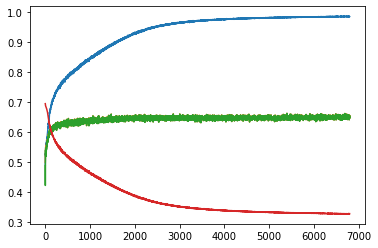

epoch: 0
train_acc: 0.9862035118333515
test_acc: 0.648854961832061
f1: 0.6483418775611386

epoch: 1
train_acc: 0.9860944486857891
test_acc: 0.6466739367502726
f1: 0.6461323298778003

epoch: 2
train_acc: 0.9859308539644455
test_acc: 0.6505997818974918
f1: 0.6499991980187626

epoch: 3
train_acc: 0.9854946013741956
test_acc: 0.6571428571428571
f1: 0.6570158963880041

epoch: 4
train_acc: 0.9858217908168829
test_acc: 0.6499454743729552
f1: 0.6497899186642384

epoch: 5
train_acc: 0.9856581960955393
test_acc: 0.6403489640130862
f1: 0.6403665278162569

epoch: 6
train_acc: 0.9855491329479769
test_acc: 0.6575790621592148
f1: 0.6574792859653806

epoch: 7
train_acc: 0.9856036645217581
test_acc: 0.6501635768811341
f1: 0.6497586166137901

epoch: 8
train_acc: 0.9859853855382267
test_acc: 0.6551799345692475
f1: 0.6542573098273698

epoch: 9
train_acc: 0.9856581960955393
test_acc: 0.648854961832061
f1: 0.6481105631841435

epoch: 10
train_acc: 0.9860399171120079
test_acc: 0.6536532170119956
f1: 0.6533661

epoch: 89
train_acc: 0.985331006652852
test_acc: 0.641875681570338
f1: 0.6414837728410107

epoch: 90
train_acc: 0.9859308539644455
test_acc: 0.6580152671755726
f1: 0.6573605120516416

epoch: 91
train_acc: 0.9864216381284764
test_acc: 0.6495092693565976
f1: 0.6491940207261493

epoch: 92
train_acc: 0.9860944486857891
test_acc: 0.6543075245365322
f1: 0.6539452658897484

epoch: 93
train_acc: 0.9858217908168829
test_acc: 0.650381679389313
f1: 0.6500571023521263

epoch: 94
train_acc: 0.9859853855382267
test_acc: 0.6453653217011995
f1: 0.6451280445649107

epoch: 95
train_acc: 0.9858217908168829
test_acc: 0.6423118865866958
f1: 0.6421866960468587

epoch: 96
train_acc: 0.9864761697022576
test_acc: 0.6505997818974918
f1: 0.6504558094665301

epoch: 97
train_acc: 0.9858763223906641
test_acc: 0.6588876772082879
f1: 0.6585457560102723

epoch: 98
train_acc: 0.9860399171120079
test_acc: 0.6510359869138496
f1: 0.6506861954069283

epoch: 99
train_acc: 0.9860399171120079
test_acc: 0.6553980370774264
f1: 

epoch: 178
train_acc: 0.9859308539644455
test_acc: 0.6497273718647765
f1: 0.6494930132664491

epoch: 179
train_acc: 0.9860399171120079
test_acc: 0.6545256270447111
f1: 0.6542198372329645

epoch: 180
train_acc: 0.9859853855382267
test_acc: 0.6501635768811341
f1: 0.6496647451417641

epoch: 181
train_acc: 0.9859853855382267
test_acc: 0.646237731733915
f1: 0.6460187895634473

epoch: 182
train_acc: 0.9860944486857891
test_acc: 0.6495092693565976
f1: 0.6493379465896664

epoch: 183
train_acc: 0.9859853855382267
test_acc: 0.6451472191930208
f1: 0.6451451245549901

epoch: 184
train_acc: 0.9861489802595703
test_acc: 0.6529989094874591
f1: 0.6528809322150344

epoch: 185
train_acc: 0.9856581960955393
test_acc: 0.6499454743729552
f1: 0.6496504662449033

epoch: 186
train_acc: 0.9864216381284764
test_acc: 0.6479825517993457
f1: 0.6475750668420556

epoch: 187
train_acc: 0.9858763223906641
test_acc: 0.646237731733915
f1: 0.6459041401212957

epoch: 188
train_acc: 0.9860944486857891
test_acc: 0.646892039

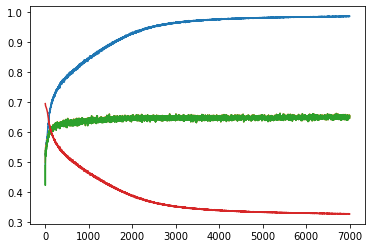

epoch: 0
train_acc: 0.9860944486857891
test_acc: 0.6564885496183206
f1: 0.6559681950550037

epoch: 1
train_acc: 0.9860944486857891
test_acc: 0.646237731733915
f1: 0.645828227024668

epoch: 2
train_acc: 0.9862035118333515
test_acc: 0.6475463467829881
f1: 0.6472343793992871

epoch: 3
train_acc: 0.9861489802595703
test_acc: 0.648854961832061
f1: 0.6487656938035163

epoch: 4
train_acc: 0.9857672592431017
test_acc: 0.6553980370774264
f1: 0.6551932118771215

epoch: 5
train_acc: 0.9859853855382267
test_acc: 0.6543075245365322
f1: 0.6539238054830918

epoch: 6
train_acc: 0.9860944486857891
test_acc: 0.6510359869138496
f1: 0.6504755051376351

epoch: 7
train_acc: 0.986312574980914
test_acc: 0.648854961832061
f1: 0.6481398130937277

epoch: 8
train_acc: 0.9858217908168829
test_acc: 0.6414394765539804
f1: 0.6411619388551024

epoch: 9
train_acc: 0.9862035118333515
test_acc: 0.6521264994547438
f1: 0.6520012292090139

epoch: 10
train_acc: 0.9861489802595703
test_acc: 0.6499454743729552
f1: 0.6498264589

epoch: 90
train_acc: 0.9860944486857891
test_acc: 0.6556161395856053
f1: 0.6553813183348585

epoch: 91
train_acc: 0.9862580434071327
test_acc: 0.6564885496183206
f1: 0.6564104524703697

epoch: 92
train_acc: 0.9862580434071327
test_acc: 0.6551799345692475
f1: 0.655101539908352

epoch: 93
train_acc: 0.9864216381284764
test_acc: 0.6551799345692475
f1: 0.655026704927203

epoch: 94
train_acc: 0.9859853855382267
test_acc: 0.6540894220283533
f1: 0.6537216162178877

epoch: 95
train_acc: 0.9863671065546952
test_acc: 0.6508178844056707
f1: 0.6502762858885789

epoch: 96
train_acc: 0.9861489802595703
test_acc: 0.6484187568157034
f1: 0.6480449214017875

epoch: 97
train_acc: 0.9862035118333515
test_acc: 0.6436205016357688
f1: 0.643516658132122

epoch: 98
train_acc: 0.9865307012760388
test_acc: 0.6471101417666303
f1: 0.6470330057771874

epoch: 99
train_acc: 0.9865307012760388
test_acc: 0.6501635768811341
f1: 0.6501365946393967

epoch: 100
train_acc: 0.98658523284982
test_acc: 0.6521264994547438
f1: 0

epoch: 178
train_acc: 0.9865307012760388
test_acc: 0.6538713195201745
f1: 0.6535796198944932

epoch: 179
train_acc: 0.9865307012760388
test_acc: 0.648854961832061
f1: 0.6486712646089848

epoch: 180
train_acc: 0.9867488275711637
test_acc: 0.653217011995638
f1: 0.6530514035058907

epoch: 181
train_acc: 0.986312574980914
test_acc: 0.650381679389313
f1: 0.6502486156473055

epoch: 182
train_acc: 0.9859308539644455
test_acc: 0.6460196292257361
f1: 0.6457408398137283

epoch: 183
train_acc: 0.9862035118333515
test_acc: 0.6612868047982552
f1: 0.6611508202497098

epoch: 184
train_acc: 0.9862035118333515
test_acc: 0.6514721919302072
f1: 0.6510461715665039

epoch: 185
train_acc: 0.9864761697022576
test_acc: 0.6551799345692475
f1: 0.6546197108818231

epoch: 186
train_acc: 0.9862580434071327
test_acc: 0.6490730643402399
f1: 0.6487369866737158

epoch: 187
train_acc: 0.9865307012760388
test_acc: 0.6436205016357688
f1: 0.643495769110102

epoch: 188
train_acc: 0.9859853855382267
test_acc: 0.651472191930

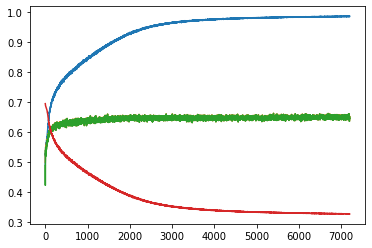

epoch: 0
train_acc: 0.9864216381284764
test_acc: 0.6527808069792803
f1: 0.652273459054244

epoch: 1
train_acc: 0.9866397644236012
test_acc: 0.6564885496183206
f1: 0.6563506386949728

epoch: 2
train_acc: 0.9862580434071327
test_acc: 0.6482006543075245
f1: 0.6481607886982139

epoch: 3
train_acc: 0.9861489802595703
test_acc: 0.6490730643402399
f1: 0.6490384782098431

epoch: 4
train_acc: 0.9865307012760388
test_acc: 0.6525627044711014
f1: 0.6522699020112965

epoch: 5
train_acc: 0.9863671065546952
test_acc: 0.6519083969465649
f1: 0.6513748138796107

epoch: 6
train_acc: 0.9866397644236012
test_acc: 0.6512540894220283
f1: 0.6505793800627127

epoch: 7
train_acc: 0.9859308539644455
test_acc: 0.648854961832061
f1: 0.6481685193081206

epoch: 8
train_acc: 0.9862580434071327
test_acc: 0.6453653217011995
f1: 0.6449772318145452

epoch: 9
train_acc: 0.9861489802595703
test_acc: 0.6512540894220283
f1: 0.6511983257040046

epoch: 10
train_acc: 0.9864216381284764
test_acc: 0.6501635768811341
f1: 0.6502173

epoch: 90
train_acc: 0.9864761697022576
test_acc: 0.655834242093784
f1: 0.6555296105767789

epoch: 91
train_acc: 0.9862035118333515
test_acc: 0.6521264994547438
f1: 0.6518892987613042

epoch: 92
train_acc: 0.9866397644236012
test_acc: 0.6569247546346783
f1: 0.6568753553019936

epoch: 93
train_acc: 0.9868033591449449
test_acc: 0.6477644492911668
f1: 0.6476376082586568

epoch: 94
train_acc: 0.9868033591449449
test_acc: 0.6429661941112322
f1: 0.642783536025608

epoch: 95
train_acc: 0.9864761697022576
test_acc: 0.6455834242093784
f1: 0.6453232985426688

epoch: 96
train_acc: 0.9865307012760388
test_acc: 0.6455834242093784
f1: 0.6450465504535753

epoch: 97
train_acc: 0.9866397644236012
test_acc: 0.6501635768811341
f1: 0.6498438738602816

epoch: 98
train_acc: 0.9863671065546952
test_acc: 0.644711014176663
f1: 0.6444867212286318

epoch: 99
train_acc: 0.9862580434071327
test_acc: 0.6444929116684842
f1: 0.644298626062273

epoch: 100
train_acc: 0.9864761697022576
test_acc: 0.6628135223555071
f1: 

epoch: 179
train_acc: 0.9870214854400698
test_acc: 0.6553980370774264
f1: 0.6551027889571769

epoch: 180
train_acc: 0.98658523284982
test_acc: 0.6444929116684842
f1: 0.6442728896352768

epoch: 181
train_acc: 0.9864216381284764
test_acc: 0.6510359869138496
f1: 0.6508285689894903

epoch: 182
train_acc: 0.9864216381284764
test_acc: 0.6423118865866958
f1: 0.6420992832142277

epoch: 183
train_acc: 0.9863671065546952
test_acc: 0.6497273718647765
f1: 0.6496185980529251

epoch: 184
train_acc: 0.986312574980914
test_acc: 0.6479825517993457
f1: 0.6476709705138919

epoch: 185
train_acc: 0.986312574980914
test_acc: 0.6536532170119956
f1: 0.653487816834814

epoch: 186
train_acc: 0.9866942959973825
test_acc: 0.6525627044711014
f1: 0.6522699020112965

epoch: 187
train_acc: 0.9868033591449449
test_acc: 0.6490730643402399
f1: 0.6486383444307064

epoch: 188
train_acc: 0.9868033591449449
test_acc: 0.651690294438386
f1: 0.6515040280288702

epoch: 189
train_acc: 0.9861489802595703
test_acc: 0.6497273718647

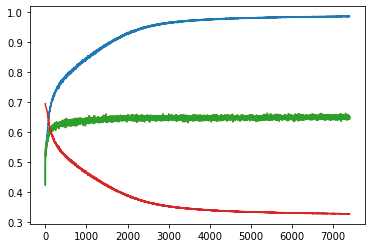

epoch: 0
train_acc: 0.9865307012760388
test_acc: 0.6479825517993457
f1: 0.6474429508782528

epoch: 1
train_acc: 0.986312574980914
test_acc: 0.6482006543075245
f1: 0.6472593553140717

epoch: 2
train_acc: 0.9863671065546952
test_acc: 0.6484187568157034
f1: 0.6479538300313649

epoch: 3
train_acc: 0.9868033591449449
test_acc: 0.6492911668484188
f1: 0.649237895550695

epoch: 4
train_acc: 0.9862580434071327
test_acc: 0.6525627044711014
f1: 0.6525383226383602

epoch: 5
train_acc: 0.9868033591449449
test_acc: 0.6510359869138496
f1: 0.6508921942237506

epoch: 6
train_acc: 0.9868033591449449
test_acc: 0.641875681570338
f1: 0.6413136724359179

epoch: 7
train_acc: 0.9863671065546952
test_acc: 0.6477644492911668
f1: 0.6471386720334628

epoch: 8
train_acc: 0.9866942959973825
test_acc: 0.6464558342420937
f1: 0.6456225376862174

epoch: 9
train_acc: 0.986312574980914
test_acc: 0.6486368593238823
f1: 0.6482468458254012

epoch: 10
train_acc: 0.9869124222925073
test_acc: 0.6479825517993457
f1: 0.647798398

epoch: 90
train_acc: 0.98658523284982
test_acc: 0.6501635768811341
f1: 0.6500931412159966

epoch: 91
train_acc: 0.9867488275711637
test_acc: 0.6499454743729552
f1: 0.6496504662449033

epoch: 92
train_acc: 0.9868033591449449
test_acc: 0.648854961832061
f1: 0.6487390563729278

epoch: 93
train_acc: 0.9864216381284764
test_acc: 0.6538713195201745
f1: 0.6535796198944932

epoch: 94
train_acc: 0.9869669538662886
test_acc: 0.6534351145038167
f1: 0.6529348518436805

epoch: 95
train_acc: 0.9868578907187261
test_acc: 0.6479825517993457
f1: 0.6476082525697797

epoch: 96
train_acc: 0.9864216381284764
test_acc: 0.6575790621592148
f1: 0.657430620376104

epoch: 97
train_acc: 0.9865307012760388
test_acc: 0.6438386041439477
f1: 0.6436563923822957

epoch: 98
train_acc: 0.98658523284982
test_acc: 0.650381679389313
f1: 0.6502338840141861

epoch: 99
train_acc: 0.98658523284982
test_acc: 0.6545256270447111
f1: 0.6543976971237904

epoch: 100
train_acc: 0.9869124222925073
test_acc: 0.6473282442748092
f1: 0.647

epoch: 178
train_acc: 0.9866942959973825
test_acc: 0.6442748091603053
f1: 0.6439946455552625

epoch: 179
train_acc: 0.9868033591449449
test_acc: 0.6521264994547438
f1: 0.6516365519470505

epoch: 180
train_acc: 0.98658523284982
test_acc: 0.6451472191930208
f1: 0.6450404387635119

epoch: 181
train_acc: 0.9867488275711637
test_acc: 0.6423118865866958
f1: 0.6421644990793444

epoch: 182
train_acc: 0.9865307012760388
test_acc: 0.646237731733915
f1: 0.6461665056436074

epoch: 183
train_acc: 0.9866942959973825
test_acc: 0.6464558342420937
f1: 0.646349447594132

epoch: 184
train_acc: 0.9869124222925073
test_acc: 0.6521264994547438
f1: 0.6519485277708276

epoch: 185
train_acc: 0.9870760170138511
test_acc: 0.6475463467829881
f1: 0.6470437831353434

epoch: 186
train_acc: 0.9866942959973825
test_acc: 0.6484187568157034
f1: 0.6479656901049995

epoch: 187
train_acc: 0.9869124222925073
test_acc: 0.6460196292257361
f1: 0.6456267105987746

epoch: 188
train_acc: 0.9864761697022576
test_acc: 0.64863685932

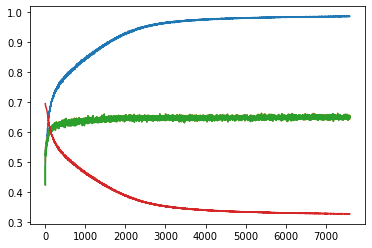

epoch: 0
train_acc: 0.98658523284982
test_acc: 0.6490730643402399
f1: 0.6482613683792118

epoch: 1
train_acc: 0.98658523284982
test_acc: 0.6464558342420937
f1: 0.6459942918781214

epoch: 2
train_acc: 0.9868578907187261
test_acc: 0.6464558342420937
f1: 0.6463285219735496

epoch: 3
train_acc: 0.9867488275711637
test_acc: 0.6505997818974918
f1: 0.6505956236779549

epoch: 4
train_acc: 0.9870214854400698
test_acc: 0.6529989094874591
f1: 0.6529595876124354

epoch: 5
train_acc: 0.9869669538662886
test_acc: 0.6540894220283533
f1: 0.6539394674627395

epoch: 6
train_acc: 0.9869669538662886
test_acc: 0.6499454743729552
f1: 0.649268233271203

epoch: 7
train_acc: 0.986312574980914
test_acc: 0.6475463467829881
f1: 0.6470313503967702

epoch: 8
train_acc: 0.9865307012760388
test_acc: 0.6536532170119956
f1: 0.6531833953100168

epoch: 9
train_acc: 0.9871850801614135
test_acc: 0.6425299890948746
f1: 0.6424610475471083

epoch: 10
train_acc: 0.9866942959973825
test_acc: 0.6442748091603053
f1: 0.64419393522

epoch: 90
train_acc: 0.9868578907187261
test_acc: 0.6486368593238823
f1: 0.6480261788460612

epoch: 91
train_acc: 0.9870214854400698
test_acc: 0.6497273718647765
f1: 0.6493440555314637

epoch: 92
train_acc: 0.9865307012760388
test_acc: 0.6449291166848419
f1: 0.6448388506286488

epoch: 93
train_acc: 0.9869124222925073
test_acc: 0.6471101417666303
f1: 0.6471325145147955

epoch: 94
train_acc: 0.9868033591449449
test_acc: 0.6514721919302072
f1: 0.6514300745562188

epoch: 95
train_acc: 0.9871305485876323
test_acc: 0.6486368593238823
f1: 0.6486216374476192

epoch: 96
train_acc: 0.9862035118333515
test_acc: 0.6519083969465649
f1: 0.6516482965781378

epoch: 97
train_acc: 0.9867488275711637
test_acc: 0.6482006543075245
f1: 0.6475892156913077

epoch: 98
train_acc: 0.9868033591449449
test_acc: 0.6545256270447111
f1: 0.6539834696336747

epoch: 99
train_acc: 0.9868033591449449
test_acc: 0.6412213740458015
f1: 0.6408117859869259

epoch: 100
train_acc: 0.9871850801614135
test_acc: 0.6444929116684842


epoch: 178
train_acc: 0.9863671065546952
test_acc: 0.6501635768811341
f1: 0.6501857560455699

epoch: 179
train_acc: 0.9868578907187261
test_acc: 0.6527808069792803
f1: 0.6527335230309113

epoch: 180
train_acc: 0.9870760170138511
test_acc: 0.6536532170119956
f1: 0.6533944204048139

epoch: 181
train_acc: 0.9871850801614135
test_acc: 0.6495092693565976
f1: 0.6490634689666142

epoch: 182
train_acc: 0.9870214854400698
test_acc: 0.6551799345692475
f1: 0.6544416801247142

epoch: 183
train_acc: 0.98658523284982
test_acc: 0.6510359869138496
f1: 0.6502666030026616

epoch: 184
train_acc: 0.9870760170138511
test_acc: 0.6407851690294438
f1: 0.6404411541650777

epoch: 185
train_acc: 0.9872941433089759
test_acc: 0.6492911668484188
f1: 0.649139132206863

epoch: 186
train_acc: 0.9869124222925073
test_acc: 0.6543075245365322
f1: 0.6541539072167089

epoch: 187
train_acc: 0.98658523284982
test_acc: 0.6523446019629225
f1: 0.6522013484954114

epoch: 188
train_acc: 0.9866942959973825
test_acc: 0.647110141766

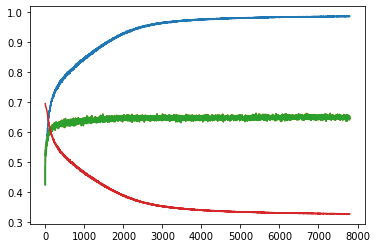

epoch: 0
train_acc: 0.9869124222925073
test_acc: 0.6508178844056707
f1: 0.6507060547436894

epoch: 1
train_acc: 0.9868033591449449
test_acc: 0.6466739367502726
f1: 0.6465904773454799

epoch: 2
train_acc: 0.9869124222925073
test_acc: 0.6458015267175573
f1: 0.6454675237712603

epoch: 3
train_acc: 0.9869669538662886
test_acc: 0.646237731733915
f1: 0.6459246060554725

epoch: 4
train_acc: 0.98658523284982
test_acc: 0.6482006543075245
f1: 0.6476290914942319

epoch: 5
train_acc: 0.9869669538662886
test_acc: 0.6523446019629225
f1: 0.65218630046429

epoch: 6
train_acc: 0.9870760170138511
test_acc: 0.6464558342420937
f1: 0.6462237726401655

epoch: 7
train_acc: 0.9868033591449449
test_acc: 0.6499454743729552
f1: 0.649947507312399

epoch: 8
train_acc: 0.9870214854400698
test_acc: 0.6479825517993457
f1: 0.6480048692378739

epoch: 9
train_acc: 0.9871850801614135
test_acc: 0.657360959651036
f1: 0.6572161146514576

epoch: 10
train_acc: 0.9870760170138511
test_acc: 0.6540894220283533
f1: 0.653520975357

epoch: 90
train_acc: 0.9872396117351947
test_acc: 0.6501635768811341
f1: 0.6500042822739782

epoch: 91
train_acc: 0.9872941433089759
test_acc: 0.6479825517993457
f1: 0.6475973260446961

epoch: 92
train_acc: 0.9871305485876323
test_acc: 0.6549618320610687
f1: 0.6546564283475694

epoch: 93
train_acc: 0.9867488275711637
test_acc: 0.6521264994547438
f1: 0.6518333293835642

epoch: 94
train_acc: 0.9869124222925073
test_acc: 0.6479825517993457
f1: 0.6474301262555247

epoch: 95
train_acc: 0.9866397644236012
test_acc: 0.648854961832061
f1: 0.6485831639639384

epoch: 96
train_acc: 0.9871850801614135
test_acc: 0.6499454743729552
f1: 0.6498596523792335

epoch: 97
train_acc: 0.9871305485876323
test_acc: 0.6545256270447111
f1: 0.6544940789105692

epoch: 98
train_acc: 0.987566801177882
test_acc: 0.6543075245365322
f1: 0.6540892898387856

epoch: 99
train_acc: 0.9869669538662886
test_acc: 0.6553980370774264
f1: 0.6551674725784494

epoch: 100
train_acc: 0.9867488275711637
test_acc: 0.6499454743729552
f1

epoch: 179
train_acc: 0.9869124222925073
test_acc: 0.6473282442748092
f1: 0.64717915811038

epoch: 180
train_acc: 0.9870214854400698
test_acc: 0.6510359869138496
f1: 0.650717081157388

epoch: 181
train_acc: 0.9871305485876323
test_acc: 0.644711014176663
f1: 0.6443386991384228

epoch: 182
train_acc: 0.9871305485876323
test_acc: 0.6475463467829881
f1: 0.647056080015786

epoch: 183
train_acc: 0.9873486748827571
test_acc: 0.658669574700109
f1: 0.6581647617605018

epoch: 184
train_acc: 0.9871305485876323
test_acc: 0.6473282442748092
f1: 0.6468678408185826

epoch: 185
train_acc: 0.9868578907187261
test_acc: 0.6453653217011995
f1: 0.6452191923798863

epoch: 186
train_acc: 0.9871850801614135
test_acc: 0.64340239912759
f1: 0.6434298942579397

epoch: 187
train_acc: 0.9869669538662886
test_acc: 0.6562704471101418
f1: 0.6562012409952686

epoch: 188
train_acc: 0.9867488275711637
test_acc: 0.6501635768811341
f1: 0.6501159365210941

epoch: 189
train_acc: 0.9872396117351947
test_acc: 0.647110141766630

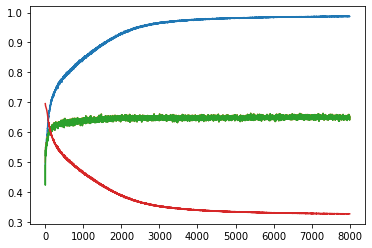

epoch: 0
train_acc: 0.9869669538662886
test_acc: 0.6508178844056707
f1: 0.6506550256726981

epoch: 1
train_acc: 0.9869669538662886
test_acc: 0.6580152671755726
f1: 0.6578519501240482

epoch: 2
train_acc: 0.9874032064565383
test_acc: 0.6492911668484188
f1: 0.6490911748477896

epoch: 3
train_acc: 0.9868033591449449
test_acc: 0.6429661941112322
f1: 0.6424757330442467

epoch: 4
train_acc: 0.9872941433089759
test_acc: 0.6464558342420937
f1: 0.6461172500920407

epoch: 5
train_acc: 0.9870760170138511
test_acc: 0.6490730643402399
f1: 0.6488771316871489

epoch: 6
train_acc: 0.9869669538662886
test_acc: 0.6536532170119956
f1: 0.6535030733485689

epoch: 7
train_acc: 0.9870760170138511
test_acc: 0.648854961832061
f1: 0.6486547210851623

epoch: 8
train_acc: 0.9872396117351947
test_acc: 0.6396946564885496
f1: 0.6396766798711014

epoch: 9
train_acc: 0.9869669538662886
test_acc: 0.6521264994547438
f1: 0.6515218840840891

epoch: 10
train_acc: 0.9871305485876323
test_acc: 0.648854961832061
f1: 0.6483786

epoch: 90
train_acc: 0.9876758643254444
test_acc: 0.6458015267175573
f1: 0.6455273653897118

epoch: 91
train_acc: 0.9874032064565383
test_acc: 0.6495092693565976
f1: 0.6493379465896664

epoch: 92
train_acc: 0.9871305485876323
test_acc: 0.6458015267175573
f1: 0.6456555771371066

epoch: 93
train_acc: 0.9871850801614135
test_acc: 0.6497273718647765
f1: 0.6493762686397043

epoch: 94
train_acc: 0.9867488275711637
test_acc: 0.6484187568157034
f1: 0.6479050351730158

epoch: 95
train_acc: 0.9869669538662886
test_acc: 0.6521264994547438
f1: 0.6518035422655283

epoch: 96
train_acc: 0.9874032064565383
test_acc: 0.6523446019629225
f1: 0.6520065123882395

epoch: 97
train_acc: 0.9866942959973825
test_acc: 0.646237731733915
f1: 0.6462246965335777

epoch: 98
train_acc: 0.9874032064565383
test_acc: 0.6575790621592148
f1: 0.6574379655820553

epoch: 99
train_acc: 0.9870214854400698
test_acc: 0.6458015267175573
f1: 0.6454357664504324

epoch: 100
train_acc: 0.9874577380303196
test_acc: 0.6414394765539804
f

epoch: 179
train_acc: 0.9871305485876323
test_acc: 0.6534351145038167
f1: 0.6531332886515057

epoch: 180
train_acc: 0.987566801177882
test_acc: 0.6468920392584515
f1: 0.6466864356110937

epoch: 181
train_acc: 0.9871305485876323
test_acc: 0.6560523446019629
f1: 0.6558684108963859

epoch: 182
train_acc: 0.9869669538662886
test_acc: 0.6412213740458015
f1: 0.6409858766150968

epoch: 183
train_acc: 0.9870760170138511
test_acc: 0.6490730643402399
f1: 0.6489466945437637

epoch: 184
train_acc: 0.9870214854400698
test_acc: 0.6510359869138496
f1: 0.6508285689894903

epoch: 185
train_acc: 0.987566801177882
test_acc: 0.6521264994547438
f1: 0.6519868372815757

epoch: 186
train_acc: 0.9874577380303196
test_acc: 0.6501635768811341
f1: 0.6500042822739782

epoch: 187
train_acc: 0.9874032064565383
test_acc: 0.6458015267175573
f1: 0.645477837374749

epoch: 188
train_acc: 0.9870760170138511
test_acc: 0.6460196292257361
f1: 0.6459391519742286

epoch: 189
train_acc: 0.9873486748827571
test_acc: 0.6425299890

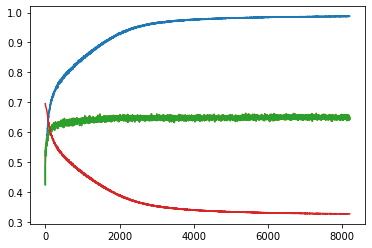

epoch: 0
train_acc: 0.9875122696041008
test_acc: 0.6512540894220283
f1: 0.6510914341353181

epoch: 1
train_acc: 0.9872941433089759
test_acc: 0.6479825517993457
f1: 0.6477005042829134

epoch: 2
train_acc: 0.9873486748827571
test_acc: 0.6582333696837513
f1: 0.6580961592603317

epoch: 3
train_acc: 0.9874032064565383
test_acc: 0.6492911668484188
f1: 0.6492145075956225

epoch: 4
train_acc: 0.9870214854400698
test_acc: 0.6427480916030535
f1: 0.642577483611729

epoch: 5
train_acc: 0.9872941433089759
test_acc: 0.650381679389313
f1: 0.6500870388726355

epoch: 6
train_acc: 0.9874032064565383
test_acc: 0.651690294438386
f1: 0.6514253778590299

epoch: 7
train_acc: 0.9871305485876323
test_acc: 0.646237731733915
f1: 0.6457818544356756

epoch: 8
train_acc: 0.9872396117351947
test_acc: 0.6519083969465649
f1: 0.6516101589719331

epoch: 9
train_acc: 0.9871305485876323
test_acc: 0.6527808069792803
f1: 0.6526071433217265

epoch: 10
train_acc: 0.987566801177882
test_acc: 0.641875681570338
f1: 0.64175033835

epoch: 90
train_acc: 0.9872396117351947
test_acc: 0.6471101417666303
f1: 0.6465035595470398

epoch: 91
train_acc: 0.9872396117351947
test_acc: 0.6521264994547438
f1: 0.6518803041388692

epoch: 92
train_acc: 0.9872396117351947
test_acc: 0.6527808069792803
f1: 0.6526377332526319

epoch: 93
train_acc: 0.9866397644236012
test_acc: 0.6477644492911668
f1: 0.6477816509540658

epoch: 94
train_acc: 0.9875122696041008
test_acc: 0.6549618320610687
f1: 0.6549658067797531

epoch: 95
train_acc: 0.9873486748827571
test_acc: 0.6468920392584515
f1: 0.6467576473692997

epoch: 96
train_acc: 0.987566801177882
test_acc: 0.6490730643402399
f1: 0.6485159069306613

epoch: 97
train_acc: 0.9871850801614135
test_acc: 0.6499454743729552
f1: 0.6495458459021375

epoch: 98
train_acc: 0.9872941433089759
test_acc: 0.6486368593238823
f1: 0.6482578195984526

epoch: 99
train_acc: 0.9876758643254444
test_acc: 0.651690294438386
f1: 0.651247268164084

epoch: 100
train_acc: 0.9876758643254444
test_acc: 0.6497273718647765
f1:

epoch: 178
train_acc: 0.9872941433089759
test_acc: 0.6477644492911668
f1: 0.6474773861826666

epoch: 179
train_acc: 0.9875122696041008
test_acc: 0.6484187568157034
f1: 0.6482182673225353

epoch: 180
train_acc: 0.9873486748827571
test_acc: 0.6492911668484188
f1: 0.6487535718787055

epoch: 181
train_acc: 0.9874032064565383
test_acc: 0.6484187568157034
f1: 0.6482586677217288

epoch: 182
train_acc: 0.9871850801614135
test_acc: 0.6484187568157034
f1: 0.6482738856804287

epoch: 183
train_acc: 0.9873486748827571
test_acc: 0.648854961832061
f1: 0.6486018610970313

epoch: 184
train_acc: 0.9873486748827571
test_acc: 0.6499454743729552
f1: 0.6492107281197488

epoch: 185
train_acc: 0.9874577380303196
test_acc: 0.6477644492911668
f1: 0.6471921777825075

epoch: 186
train_acc: 0.9871850801614135
test_acc: 0.648854961832061
f1: 0.6480350577102618

epoch: 187
train_acc: 0.9868578907187261
test_acc: 0.6540894220283533
f1: 0.6536551984192431

epoch: 188
train_acc: 0.9875122696041008
test_acc: 0.646455834

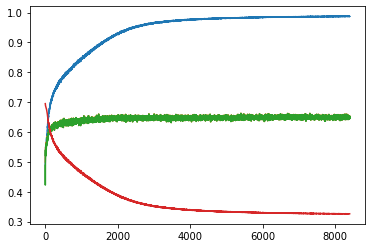

epoch: 0
train_acc: 0.9872396117351947
test_acc: 0.6492911668484188
f1: 0.6487910911396237

epoch: 1
train_acc: 0.9870760170138511
test_acc: 0.6510359869138496
f1: 0.650488353165328

epoch: 2
train_acc: 0.9876758643254444
test_acc: 0.6527808069792803
f1: 0.6524833164682441

epoch: 3
train_acc: 0.987566801177882
test_acc: 0.6473282442748092
f1: 0.6470310304785101

epoch: 4
train_acc: 0.9871305485876323
test_acc: 0.6523446019629225
f1: 0.6520940165147006

epoch: 5
train_acc: 0.9869669538662886
test_acc: 0.6505997818974918
f1: 0.650552200939397

epoch: 6
train_acc: 0.9873486748827571
test_acc: 0.6484187568157034
f1: 0.6481560489247858

epoch: 7
train_acc: 0.9874577380303196
test_acc: 0.6486368593238823
f1: 0.6483881943371274

epoch: 8
train_acc: 0.9874577380303196
test_acc: 0.6549618320610687
f1: 0.6546564283475694

epoch: 9
train_acc: 0.9872941433089759
test_acc: 0.648854961832061
f1: 0.6486110076366902

epoch: 10
train_acc: 0.9875122696041008
test_acc: 0.6466739367502726
f1: 0.646242051

epoch: 89
train_acc: 0.9875122696041008
test_acc: 0.6471101417666303
f1: 0.6470073150904365

epoch: 90
train_acc: 0.9876213327516632
test_acc: 0.6529989094874591
f1: 0.6528370679857981

epoch: 91
train_acc: 0.987839459046788
test_acc: 0.658669574700109
f1: 0.6584455300319918

epoch: 92
train_acc: 0.9878939906205693
test_acc: 0.6464558342420937
f1: 0.6460522219360529

epoch: 93
train_acc: 0.9869124222925073
test_acc: 0.6564885496183206
f1: 0.656236427818279

epoch: 94
train_acc: 0.9871305485876323
test_acc: 0.6551799345692475
f1: 0.6549535993486129

epoch: 95
train_acc: 0.9877849274730068
test_acc: 0.6453653217011995
f1: 0.6449083201679461

epoch: 96
train_acc: 0.9873486748827571
test_acc: 0.6501635768811341
f1: 0.649988604201036

epoch: 97
train_acc: 0.9876758643254444
test_acc: 0.6505997818974918
f1: 0.6504912790042253

epoch: 98
train_acc: 0.9875122696041008
test_acc: 0.6458015267175573
f1: 0.6456915337720736

epoch: 99
train_acc: 0.9879485221943505
test_acc: 0.653217011995638
f1: 0.

epoch: 177
train_acc: 0.9874032064565383
test_acc: 0.6549618320610687
f1: 0.654704013274821

epoch: 178
train_acc: 0.9874577380303196
test_acc: 0.6497273718647765
f1: 0.6494467223533822

epoch: 179
train_acc: 0.9871850801614135
test_acc: 0.6508178844056707
f1: 0.6505236115003677

epoch: 180
train_acc: 0.9876758643254444
test_acc: 0.6444929116684842
f1: 0.6443612666109712

epoch: 181
train_acc: 0.9874032064565383
test_acc: 0.6458015267175573
f1: 0.6455823145814046

epoch: 182
train_acc: 0.9875122696041008
test_acc: 0.650381679389313
f1: 0.6502186172100781

epoch: 183
train_acc: 0.9872941433089759
test_acc: 0.6553980370774264
f1: 0.6549654561805828

epoch: 184
train_acc: 0.987566801177882
test_acc: 0.6490730643402399
f1: 0.6486498446417535

epoch: 185
train_acc: 0.9869669538662886
test_acc: 0.6497273718647765
f1: 0.6495678786359158

epoch: 186
train_acc: 0.987566801177882
test_acc: 0.6556161395856053
f1: 0.6554990521480448

epoch: 187
train_acc: 0.9875122696041008
test_acc: 0.65038167938

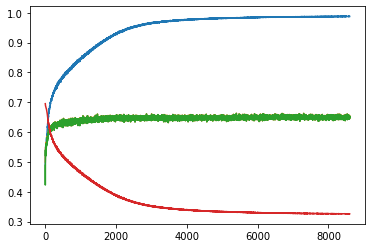

epoch: 0
train_acc: 0.9877303958992256
test_acc: 0.6521264994547438
f1: 0.6518619146431763

epoch: 1
train_acc: 0.9878939906205693
test_acc: 0.6545256270447111
f1: 0.6544501119598669

epoch: 2
train_acc: 0.9874577380303196
test_acc: 0.6464558342420937
f1: 0.6464405178787032

epoch: 3
train_acc: 0.9871850801614135
test_acc: 0.6495092693565976
f1: 0.6493299587007649

epoch: 4
train_acc: 0.9874577380303196
test_acc: 0.6547437295528898
f1: 0.6544130826006789

epoch: 5
train_acc: 0.987566801177882
test_acc: 0.6495092693565976
f1: 0.6490277965803936

epoch: 6
train_acc: 0.9875122696041008
test_acc: 0.6569247546346783
f1: 0.6566451569444796

epoch: 7
train_acc: 0.9874032064565383
test_acc: 0.6436205016357688
f1: 0.6433910666808325

epoch: 8
train_acc: 0.9876758643254444
test_acc: 0.6549618320610687
f1: 0.6548269263572181

epoch: 9
train_acc: 0.9876758643254444
test_acc: 0.6475463467829881
f1: 0.647519162679093

epoch: 10
train_acc: 0.9871850801614135
test_acc: 0.6473282442748092
f1: 0.6473454

epoch: 89
train_acc: 0.9877303958992256
test_acc: 0.650381679389313
f1: 0.6498892744646533

epoch: 90
train_acc: 0.9876758643254444
test_acc: 0.6527808069792803
f1: 0.652512047845087

epoch: 91
train_acc: 0.9878939906205693
test_acc: 0.6523446019629225
f1: 0.6519532249367688

epoch: 92
train_acc: 0.9874032064565383
test_acc: 0.6508178844056707
f1: 0.6502762858885789

epoch: 93
train_acc: 0.987839459046788
test_acc: 0.6486368593238823
f1: 0.6483972791877498

epoch: 94
train_acc: 0.9878939906205693
test_acc: 0.6449291166848419
f1: 0.6448751828087883

epoch: 95
train_acc: 0.9877849274730068
test_acc: 0.6477644492911668
f1: 0.647774341522572

epoch: 96
train_acc: 0.9878939906205693
test_acc: 0.6497273718647765
f1: 0.6497189010620584

epoch: 97
train_acc: 0.987839459046788
test_acc: 0.6510359869138496
f1: 0.6509208013644002

epoch: 98
train_acc: 0.9874032064565383
test_acc: 0.6540894220283533
f1: 0.6536778700673489

epoch: 99
train_acc: 0.9872941433089759
test_acc: 0.6473282442748092
f1: 0.

epoch: 177
train_acc: 0.9875122696041008
test_acc: 0.6536532170119956
f1: 0.6531223085468808

epoch: 178
train_acc: 0.987839459046788
test_acc: 0.6501635768811341
f1: 0.6497473540908119

epoch: 179
train_acc: 0.9877849274730068
test_acc: 0.6475463467829881
f1: 0.6472829870114477

epoch: 180
train_acc: 0.9876758643254444
test_acc: 0.6484187568157034
f1: 0.6481744995716426

epoch: 181
train_acc: 0.9879485221943505
test_acc: 0.6484187568157034
f1: 0.6482097832569114

epoch: 182
train_acc: 0.9878939906205693
test_acc: 0.653217011995638
f1: 0.6529485904985478

epoch: 183
train_acc: 0.987566801177882
test_acc: 0.6466739367502726
f1: 0.6461824564514685

epoch: 184
train_acc: 0.9875122696041008
test_acc: 0.6543075245365322
f1: 0.6540892898387856

epoch: 185
train_acc: 0.9878939906205693
test_acc: 0.641875681570338
f1: 0.641750338359111

epoch: 186
train_acc: 0.987839459046788
test_acc: 0.650381679389313
f1: 0.6500259571993056

epoch: 187
train_acc: 0.9881121169156942
test_acc: 0.65234460196292

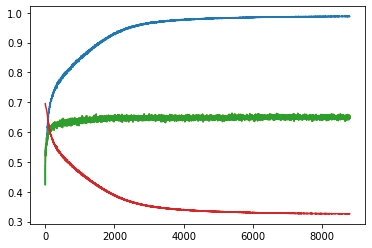

epoch: 0
train_acc: 0.9876758643254444
test_acc: 0.6407851690294438
f1: 0.6404924179831899

epoch: 1
train_acc: 0.9876758643254444
test_acc: 0.648854961832061
f1: 0.6484371820986328

epoch: 2
train_acc: 0.9879485221943505
test_acc: 0.6499454743729552
f1: 0.6495233068054781

epoch: 3
train_acc: 0.9877849274730068
test_acc: 0.6549618320610687
f1: 0.654573401411523

epoch: 4
train_acc: 0.9876758643254444
test_acc: 0.650381679389313
f1: 0.6502263175194855

epoch: 5
train_acc: 0.9880030537681318
test_acc: 0.6553980370774264
f1: 0.6552486498052509

epoch: 6
train_acc: 0.987566801177882
test_acc: 0.6501635768811341
f1: 0.649873627564949

epoch: 7
train_acc: 0.987566801177882
test_acc: 0.6451472191930208
f1: 0.6450194356884424

epoch: 8
train_acc: 0.987566801177882
test_acc: 0.641875681570338
f1: 0.6417204322659634

epoch: 9
train_acc: 0.987566801177882
test_acc: 0.6458015267175573
f1: 0.645555451181357

epoch: 10
train_acc: 0.9877303958992256
test_acc: 0.6508178844056707
f1: 0.650677696857556

epoch: 90
train_acc: 0.9874577380303196
test_acc: 0.6545256270447111
f1: 0.653957897204313

epoch: 91
train_acc: 0.9876758643254444
test_acc: 0.6505997818974918
f1: 0.6501258181905836

epoch: 92
train_acc: 0.9878939906205693
test_acc: 0.6536532170119956
f1: 0.6533164000454984

epoch: 93
train_acc: 0.9881121169156942
test_acc: 0.6545256270447111
f1: 0.654336824345178

epoch: 94
train_acc: 0.9876213327516632
test_acc: 0.6495092693565976
f1: 0.6492332283306602

epoch: 95
train_acc: 0.987566801177882
test_acc: 0.6492911668484188
f1: 0.6490197066173993

epoch: 96
train_acc: 0.987839459046788
test_acc: 0.6492911668484188
f1: 0.6488963523828883

epoch: 97
train_acc: 0.9877849274730068
test_acc: 0.6466739367502726
f1: 0.6462761759081338

epoch: 98
train_acc: 0.9880030537681318
test_acc: 0.6455834242093784
f1: 0.6452120233885433

epoch: 99
train_acc: 0.9880030537681318
test_acc: 0.6543075245365322
f1: 0.6540064584723955

epoch: 100
train_acc: 0.9881121169156942
test_acc: 0.6497273718647765
f1: 

epoch: 179
train_acc: 0.9876213327516632
test_acc: 0.6538713195201745
f1: 0.6538103358753162

epoch: 180
train_acc: 0.9876758643254444
test_acc: 0.653217011995638
f1: 0.652879770826412

epoch: 181
train_acc: 0.9876758643254444
test_acc: 0.6510359869138496
f1: 0.6507370014756221

epoch: 182
train_acc: 0.9877849274730068
test_acc: 0.6560523446019629
f1: 0.6556705623008428

epoch: 183
train_acc: 0.9874577380303196
test_acc: 0.6497273718647765
f1: 0.6493970709215787

epoch: 184
train_acc: 0.9876213327516632
test_acc: 0.648854961832061
f1: 0.6486110076366902

epoch: 185
train_acc: 0.987566801177882
test_acc: 0.6510359869138496
f1: 0.6509343041685406

epoch: 186
train_acc: 0.9877303958992256
test_acc: 0.6508178844056707
f1: 0.6506849866820562

epoch: 187
train_acc: 0.9876758643254444
test_acc: 0.646237731733915
f1: 0.6462457472673642

epoch: 188
train_acc: 0.9881121169156942
test_acc: 0.6551799345692475
f1: 0.6550626988258764

epoch: 189
train_acc: 0.9876213327516632
test_acc: 0.648636859323

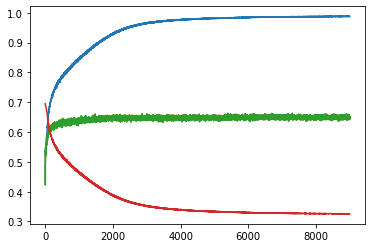

epoch: 0
train_acc: 0.9876758643254444
test_acc: 0.653217011995638
f1: 0.652890001721862

epoch: 1
train_acc: 0.987839459046788
test_acc: 0.6519083969465649
f1: 0.651912406839751

epoch: 2
train_acc: 0.9878939906205693
test_acc: 0.6556161395856053
f1: 0.6556538358733118

epoch: 3
train_acc: 0.988057585341913
test_acc: 0.6475463467829881
f1: 0.6475090254237724

epoch: 4
train_acc: 0.987839459046788
test_acc: 0.6508178844056707
f1: 0.6505038128080677

epoch: 5
train_acc: 0.9879485221943505
test_acc: 0.657360959651036
f1: 0.6565533662585116

epoch: 6
train_acc: 0.9873486748827571
test_acc: 0.6547437295528898
f1: 0.6535801326156762

epoch: 7
train_acc: 0.987839459046788
test_acc: 0.650381679389313
f1: 0.6491850133475923

epoch: 8
train_acc: 0.988057585341913
test_acc: 0.6486368593238823
f1: 0.6479284983960304

epoch: 9
train_acc: 0.9876758643254444
test_acc: 0.6510359869138496
f1: 0.6508847086635453

epoch: 10
train_acc: 0.9877849274730068
test_acc: 0.6492911668484188
f1: 0.649346571783465

epoch: 89
train_acc: 0.987566801177882
test_acc: 0.6449291166848419
f1: 0.6444228211289227

epoch: 90
train_acc: 0.9874577380303196
test_acc: 0.6512540894220283
f1: 0.6509097446893874

epoch: 91
train_acc: 0.9877303958992256
test_acc: 0.6497273718647765
f1: 0.6495018684757753

epoch: 92
train_acc: 0.987839459046788
test_acc: 0.6464558342420937
f1: 0.6464310238523426

epoch: 93
train_acc: 0.9882211800632567
test_acc: 0.6473282442748092
f1: 0.6473584910425275

epoch: 94
train_acc: 0.9879485221943505
test_acc: 0.6525627044711014
f1: 0.6525180714313564

epoch: 95
train_acc: 0.9877303958992256
test_acc: 0.6486368593238823
f1: 0.6483881943371274

epoch: 96
train_acc: 0.987566801177882
test_acc: 0.653217011995638
f1: 0.6526728009580447

epoch: 97
train_acc: 0.9876213327516632
test_acc: 0.6449291166848419
f1: 0.644115591141133

epoch: 98
train_acc: 0.987839459046788
test_acc: 0.655834242093784
f1: 0.6553791214575024

epoch: 99
train_acc: 0.9877849274730068
test_acc: 0.646237731733915
f1: 0.645

epoch: 178
train_acc: 0.9877303958992256
test_acc: 0.6479825517993457
f1: 0.6480197772836636

epoch: 179
train_acc: 0.987839459046788
test_acc: 0.6536532170119956
f1: 0.6537146177648845

epoch: 180
train_acc: 0.9878939906205693
test_acc: 0.6464558342420937
f1: 0.646469498910528

epoch: 181
train_acc: 0.9877849274730068
test_acc: 0.6442748091603053
f1: 0.6440042525285395

epoch: 182
train_acc: 0.9880030537681318
test_acc: 0.6510359869138496
f1: 0.650488353165328

epoch: 183
train_acc: 0.9876758643254444
test_acc: 0.655834242093784
f1: 0.6554358460202998

epoch: 184
train_acc: 0.9879485221943505
test_acc: 0.648854961832061
f1: 0.6485441527431015

epoch: 185
train_acc: 0.9876758643254444
test_acc: 0.6482006543075245
f1: 0.6481899357849363

epoch: 186
train_acc: 0.9875122696041008
test_acc: 0.6482006543075245
f1: 0.6481807570648569

epoch: 187
train_acc: 0.9880030537681318
test_acc: 0.6455834242093784
f1: 0.6455323918409025

epoch: 188
train_acc: 0.987839459046788
test_acc: 0.6462377317339

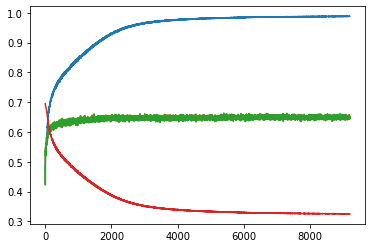

epoch: 0
train_acc: 0.9879485221943505
test_acc: 0.6514721919302072
f1: 0.6512734436609252

epoch: 1
train_acc: 0.9882211800632567
test_acc: 0.653217011995638
f1: 0.6531288528867024

epoch: 2
train_acc: 0.9880030537681318
test_acc: 0.6495092693565976
f1: 0.6494416738305083

epoch: 3
train_acc: 0.988057585341913
test_acc: 0.6464558342420937
f1: 0.6463426075824613

epoch: 4
train_acc: 0.9876213327516632
test_acc: 0.646237731733915
f1: 0.6459639080431727

epoch: 5
train_acc: 0.9881121169156942
test_acc: 0.6538713195201745
f1: 0.6534761728639826

epoch: 6
train_acc: 0.987566801177882
test_acc: 0.6477644492911668
f1: 0.6473510589267681

epoch: 7
train_acc: 0.987839459046788
test_acc: 0.6560523446019629
f1: 0.6558437089604038

epoch: 8
train_acc: 0.9881666484894754
test_acc: 0.6471101417666303
f1: 0.6469494568075417

epoch: 9
train_acc: 0.987839459046788
test_acc: 0.644711014176663
f1: 0.6445373459829289

epoch: 10
train_acc: 0.987839459046788
test_acc: 0.6508178844056707
f1: 0.6505974467078

epoch: 90
train_acc: 0.9876758643254444
test_acc: 0.6460196292257361
f1: 0.6453489880038338

epoch: 91
train_acc: 0.9877303958992256
test_acc: 0.6482006543075245
f1: 0.6478211440175692

epoch: 92
train_acc: 0.9881121169156942
test_acc: 0.6510359869138496
f1: 0.650836989898298

epoch: 93
train_acc: 0.9877849274730068
test_acc: 0.6534351145038167
f1: 0.6534554369417885

epoch: 94
train_acc: 0.9874032064565383
test_acc: 0.6490730643402399
f1: 0.6491226620750449

epoch: 95
train_acc: 0.9875122696041008
test_acc: 0.6497273718647765
f1: 0.6497232032626689

epoch: 96
train_acc: 0.9876758643254444
test_acc: 0.6527808069792803
f1: 0.6524634957516011

epoch: 97
train_acc: 0.987839459046788
test_acc: 0.6538713195201745
f1: 0.6532829480461589

epoch: 98
train_acc: 0.988057585341913
test_acc: 0.6560523446019629
f1: 0.6553013663636362

epoch: 99
train_acc: 0.9878939906205693
test_acc: 0.6479825517993457
f1: 0.6474806101364136

epoch: 100
train_acc: 0.987839459046788
test_acc: 0.650381679389313
f1: 0

epoch: 178
train_acc: 0.9877849274730068
test_acc: 0.6495092693565976
f1: 0.6492520250818886

epoch: 179
train_acc: 0.987839459046788
test_acc: 0.6460196292257361
f1: 0.6456486855136037

epoch: 180
train_acc: 0.9882757116370379
test_acc: 0.6545256270447111
f1: 0.6542099103458142

epoch: 181
train_acc: 0.9878939906205693
test_acc: 0.6482006543075245
f1: 0.6481268068585854

epoch: 182
train_acc: 0.9877849274730068
test_acc: 0.6427480916030535
f1: 0.6427154679643386

epoch: 183
train_acc: 0.9879485221943505
test_acc: 0.6468920392584515
f1: 0.646857238173857

epoch: 184
train_acc: 0.9881666484894754
test_acc: 0.6505997818974918
f1: 0.6503101941141198

epoch: 185
train_acc: 0.9883847747846003
test_acc: 0.6484187568157034
f1: 0.648076849416463

epoch: 186
train_acc: 0.9882211800632567
test_acc: 0.6497273718647765
f1: 0.6494562492708603

epoch: 187
train_acc: 0.988057585341913
test_acc: 0.650381679389313
f1: 0.6500771942783911

epoch: 188
train_acc: 0.9881121169156942
test_acc: 0.647764449291

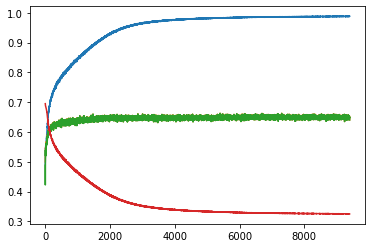

epoch: 0
train_acc: 0.9880030537681318
test_acc: 0.6525627044711014
f1: 0.6522795518198067

epoch: 1
train_acc: 0.9878939906205693
test_acc: 0.6471101417666303
f1: 0.646643484485576

epoch: 2
train_acc: 0.987839459046788
test_acc: 0.6505997818974918
f1: 0.6501495257743234

epoch: 3
train_acc: 0.9881121169156942
test_acc: 0.6451472191930208
f1: 0.6443874848595255

epoch: 4
train_acc: 0.9883302432108191
test_acc: 0.6479825517993457
f1: 0.6474806101364136

epoch: 5
train_acc: 0.988057585341913
test_acc: 0.6440567066521266
f1: 0.6438001473977362

epoch: 6
train_acc: 0.9883302432108191
test_acc: 0.6482006543075245
f1: 0.6480947927016256

epoch: 7
train_acc: 0.9882211800632567
test_acc: 0.6468920392584515
f1: 0.6467351266775089

epoch: 8
train_acc: 0.9880030537681318
test_acc: 0.6519083969465649
f1: 0.6518555231958393

epoch: 9
train_acc: 0.9879485221943505
test_acc: 0.6514721919302072
f1: 0.6511332539500669

epoch: 10
train_acc: 0.9881666484894754
test_acc: 0.6501635768811341
f1: 0.64956224

epoch: 90
train_acc: 0.9879485221943505
test_acc: 0.6468920392584515
f1: 0.6468054686616692

epoch: 91
train_acc: 0.9879485221943505
test_acc: 0.6482006543075245
f1: 0.6480125217348576

epoch: 92
train_acc: 0.9880030537681318
test_acc: 0.653217011995638
f1: 0.6528044220725628

epoch: 93
train_acc: 0.9883847747846003
test_acc: 0.657360959651036
f1: 0.656791465910163

epoch: 94
train_acc: 0.9875122696041008
test_acc: 0.6519083969465649
f1: 0.6511704713303683

epoch: 95
train_acc: 0.9881666484894754
test_acc: 0.653217011995638
f1: 0.6530108904333061

epoch: 96
train_acc: 0.987839459046788
test_acc: 0.6460196292257361
f1: 0.646025695200366

epoch: 97
train_acc: 0.9880030537681318
test_acc: 0.6527808069792803
f1: 0.652802820214805

epoch: 98
train_acc: 0.9880030537681318
test_acc: 0.6497273718647765
f1: 0.6496627549785577

epoch: 99
train_acc: 0.988057585341913
test_acc: 0.6486368593238823
f1: 0.6484062293172772

epoch: 100
train_acc: 0.9881666484894754
test_acc: 0.6477644492911668
f1: 0.64

epoch: 178
train_acc: 0.9883847747846003
test_acc: 0.6473282442748092
f1: 0.6471228946158979

epoch: 179
train_acc: 0.9882757116370379
test_acc: 0.651690294438386
f1: 0.6515985609179161

epoch: 180
train_acc: 0.9880030537681318
test_acc: 0.6523446019629225
f1: 0.6521938910060571

epoch: 181
train_acc: 0.987839459046788
test_acc: 0.6514721919302072
f1: 0.6510687464768308

epoch: 182
train_acc: 0.9882757116370379
test_acc: 0.6455834242093784
f1: 0.6451559959868549

epoch: 183
train_acc: 0.9876758643254444
test_acc: 0.6451472191930208
f1: 0.6444024016516081

epoch: 184
train_acc: 0.988057585341913
test_acc: 0.6562704471101418
f1: 0.6560316447424993

epoch: 185
train_acc: 0.9881666484894754
test_acc: 0.6431842966194111
f1: 0.643106302504004

epoch: 186
train_acc: 0.987839459046788
test_acc: 0.6538713195201745
f1: 0.6539038708960784

epoch: 187
train_acc: 0.9883847747846003
test_acc: 0.6486368593238823
f1: 0.6486639508559882

epoch: 188
train_acc: 0.9881121169156942
test_acc: 0.649945474372

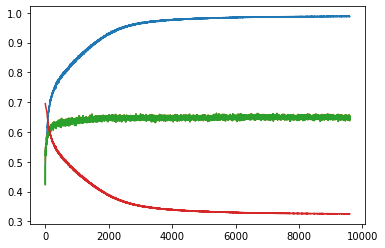

epoch: 0
train_acc: 0.9877303958992256
test_acc: 0.644711014176663
f1: 0.6439652810635954

epoch: 1
train_acc: 0.9881666484894754
test_acc: 0.6540894220283533
f1: 0.6537832461183597

epoch: 2
train_acc: 0.9876213327516632
test_acc: 0.6564885496183206
f1: 0.656523568074204

epoch: 3
train_acc: 0.9881666484894754
test_acc: 0.644711014176663
f1: 0.6447592342067456

epoch: 4
train_acc: 0.9883302432108191
test_acc: 0.6473282442748092
f1: 0.6471715255327561

epoch: 5
train_acc: 0.9881666484894754
test_acc: 0.6486368593238823
f1: 0.6481419969822559

epoch: 6
train_acc: 0.9883847747846003
test_acc: 0.6510359869138496
f1: 0.6499407091220905

epoch: 7
train_acc: 0.987839459046788
test_acc: 0.6482006543075245
f1: 0.6472757816917551

epoch: 8
train_acc: 0.9881121169156942
test_acc: 0.6523446019629225
f1: 0.6520065123882395

epoch: 9
train_acc: 0.9881666484894754
test_acc: 0.6453653217011995
f1: 0.6452482643865718

epoch: 10
train_acc: 0.9879485221943505
test_acc: 0.648854961832061
f1: 0.6488772239

epoch: 90
train_acc: 0.9881121169156942
test_acc: 0.6471101417666303
f1: 0.6469571616360102

epoch: 91
train_acc: 0.9880030537681318
test_acc: 0.6423118865866958
f1: 0.6420252955538897

epoch: 92
train_acc: 0.988057585341913
test_acc: 0.651690294438386
f1: 0.6515200377745471

epoch: 93
train_acc: 0.9882757116370379
test_acc: 0.6508178844056707
f1: 0.6506991656041924

epoch: 94
train_acc: 0.9882211800632567
test_acc: 0.6501635768811341
f1: 0.6499114193786574

epoch: 95
train_acc: 0.9881121169156942
test_acc: 0.6444929116684842
f1: 0.6442272703147647

epoch: 96
train_acc: 0.9878939906205693
test_acc: 0.6449291166848419
f1: 0.644447460683065

epoch: 97
train_acc: 0.9884393063583815
test_acc: 0.6427480916030535
f1: 0.6419756600606256

epoch: 98
train_acc: 0.9883302432108191
test_acc: 0.639258451472192
f1: 0.6388523425629958

epoch: 99
train_acc: 0.987839459046788
test_acc: 0.6512540894220283
f1: 0.6512296157556421

epoch: 100
train_acc: 0.9884393063583815
test_acc: 0.6560523446019629
f1: 0

epoch: 179
train_acc: 0.9883847747846003
test_acc: 0.6512540894220283
f1: 0.6508220713142944

epoch: 180
train_acc: 0.9883847747846003
test_acc: 0.6525627044711014
f1: 0.652477524137146

epoch: 181
train_acc: 0.9883847747846003
test_acc: 0.6477644492911668
f1: 0.6475922736417619

epoch: 182
train_acc: 0.9883847747846003
test_acc: 0.6484187568157034
f1: 0.648295703675327

epoch: 183
train_acc: 0.9882211800632567
test_acc: 0.6482006543075245
f1: 0.6481144045406253

epoch: 184
train_acc: 0.9883847747846003
test_acc: 0.6540894220283533
f1: 0.6539683536160474

epoch: 185
train_acc: 0.9884938379321627
test_acc: 0.6519083969465649
f1: 0.6518323097777448

epoch: 186
train_acc: 0.9881666484894754
test_acc: 0.6497273718647765
f1: 0.6494840237667855

epoch: 187
train_acc: 0.9881121169156942
test_acc: 0.653217011995638
f1: 0.652879770826412

epoch: 188
train_acc: 0.9883847747846003
test_acc: 0.6536532170119956
f1: 0.6531952122145208

epoch: 189
train_acc: 0.9881121169156942
test_acc: 0.64689203925

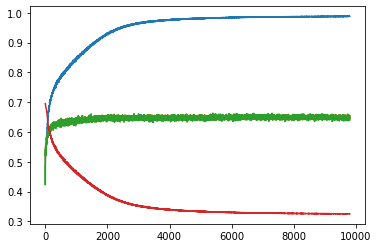

epoch: 0
train_acc: 0.9882211800632567
test_acc: 0.6495092693565976
f1: 0.6494104484686974

epoch: 1
train_acc: 0.9884393063583815
test_acc: 0.6455834242093784
f1: 0.6454336004510619

epoch: 2
train_acc: 0.9883302432108191
test_acc: 0.641875681570338
f1: 0.6416080845747508

epoch: 3
train_acc: 0.9882211800632567
test_acc: 0.6495092693565976
f1: 0.6493535198089913

epoch: 4
train_acc: 0.9881666484894754
test_acc: 0.6495092693565976
f1: 0.6491311707602193

epoch: 5
train_acc: 0.9885483695059439
test_acc: 0.6527808069792803
f1: 0.6525213584914759

epoch: 6
train_acc: 0.9883302432108191
test_acc: 0.6484187568157034
f1: 0.6482812928494536

epoch: 7
train_acc: 0.9884938379321627
test_acc: 0.6414394765539804
f1: 0.6413906481550365

epoch: 8
train_acc: 0.9882211800632567
test_acc: 0.6501635768811341
f1: 0.6500871083229967

epoch: 9
train_acc: 0.9885483695059439
test_acc: 0.6519083969465649
f1: 0.6517574968918864

epoch: 10
train_acc: 0.9883847747846003
test_acc: 0.640567066521265
f1: 0.6403872

epoch: 90
train_acc: 0.9883847747846003
test_acc: 0.6508178844056707
f1: 0.6505428740245097

epoch: 91
train_acc: 0.9884393063583815
test_acc: 0.6499454743729552
f1: 0.6496977355127804

epoch: 92
train_acc: 0.9882211800632567
test_acc: 0.6466739367502726
f1: 0.64660875657862

epoch: 93
train_acc: 0.9885483695059439
test_acc: 0.653217011995638
f1: 0.6531350981353785

epoch: 94
train_acc: 0.9882757116370379
test_acc: 0.6580152671755726
f1: 0.6579023853371122

epoch: 95
train_acc: 0.9882211800632567
test_acc: 0.6455834242093784
f1: 0.6453684382122106

epoch: 96
train_acc: 0.9883302432108191
test_acc: 0.6525627044711014
f1: 0.6519454517333165

epoch: 97
train_acc: 0.9881121169156942
test_acc: 0.653217011995638
f1: 0.6525107470925634

epoch: 98
train_acc: 0.9882757116370379
test_acc: 0.6381679389312978
f1: 0.6381741394561966

epoch: 99
train_acc: 0.9877849274730068
test_acc: 0.6484187568157034
f1: 0.6484711560771356

epoch: 100
train_acc: 0.9883302432108191
test_acc: 0.6477644492911668
f1: 

epoch: 178
train_acc: 0.9882757116370379
test_acc: 0.6523446019629225
f1: 0.652236640906826

epoch: 179
train_acc: 0.9884938379321627
test_acc: 0.6490730643402399
f1: 0.6486724399106164

epoch: 180
train_acc: 0.9885483695059439
test_acc: 0.6514721919302072
f1: 0.6508994442755632

epoch: 181
train_acc: 0.9881666484894754
test_acc: 0.6444929116684842
f1: 0.6438818306932479

epoch: 182
train_acc: 0.9886029010797251
test_acc: 0.6429661941112322
f1: 0.6424757330442467

epoch: 183
train_acc: 0.9885483695059439
test_acc: 0.6505997818974918
f1: 0.6502804775088349

epoch: 184
train_acc: 0.9884938379321627
test_acc: 0.6534351145038167
f1: 0.6532163290560442

epoch: 185
train_acc: 0.9882211800632567
test_acc: 0.6538713195201745
f1: 0.6538045652576333

epoch: 186
train_acc: 0.9882211800632567
test_acc: 0.6545256270447111
f1: 0.6543032127432304

epoch: 187
train_acc: 0.9883302432108191
test_acc: 0.6436205016357688
f1: 0.643161251632487

epoch: 188
train_acc: 0.9882757116370379
test_acc: 0.650381679

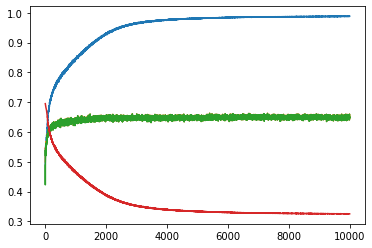

In [9]:
for i in range(50):
    for epoch in range(epochs):
        y_pred = net.forward(X_train)

        train_pred = y_pred.cpu().detach().numpy()
        train_pred = [np.argmax(sample) for sample in train_pred]
        train_accuracy = accuracy_score(y_train.cpu(), train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = net.predict(X_test)
        test_accuracy = accuracy_score(y_test.cpu(), test_pred)
        test_accuracies.append(test_accuracy)
        
        f1 = f1_score(y_test.cpu(), test_pred, average='weighted')
        f1s.append(f1)

        loss = criterion(y_pred, y_train)   
        losses.append(loss)
        
        print("epoch:", epoch)
        print("train_acc:", train_accuracy)
        print("test_acc:", test_accuracy)
        print("f1:", f1)
        print()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(train_accuracies)
    plt.plot(test_accuracies)
    plt.plot(f1s)
    plt.plot(losses)
    plt.show()
    
    torch.save(net.state_dict(), 'torch_PN_1_dict.dict')

In [10]:
from sklearn.metrics import confusion_matrix
test_pred = net.predict(X_test)
confusion_matrix(y_test.cpu(), test_pred)

array([[1582,  772],
       [ 835, 1396]])

In [10]:
torch.save(net, 'torch_PN_1.mdl')